In [0]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784',version=1)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
X,Y = mnist.data, mnist.target
Y= Y.astype(np.uint8)
X_train,Y_train,X_test,Y_test = X[:60000],Y[:60000],X[60000:],Y[60000:]

In [0]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlIAAAJCCAYAAAALCSnoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzsnXmczdX/x58fWyRZS8iWKEtlbRIV%0AiaSiCIlSKfyUolRDivgqKUKUtBEtimTJ15IsfUMxyL5mZM9EGmQ/vz8+8z73zsydmTt3/XzunOfj%0AMY87c+/nfu55zfmczz3nfd6LpZTCYDAYDAaDwZB9ckW7AQaDwWAwGAxuxUykDAaDwWAwGALETKQM%0ABoPBYDAYAsRMpAwGg8FgMBgCxEykDAaDwWAwGALETKQMBoPBYDAYAsRMpAwGg8FgMBgCJKiJlGVZ%0AzS3L2mpZ1g7LsuJD1SgnYTS6n1jXB0ZjrBDrGmNdHxiNORKlVEA/QG5gJ3AVkA/4DagW6Pmc+GM0%0Auv8n1vUZjdFvm9Fo9BmNsaUxuz9Wyj8m21iWVR8YqJS6M+XvvikTszcyek+JEiVUhQoVAvq8aHD8%0A+HEOHDhA3rx5SUpKsozG2NcHRqMTMRrTE+v6wGh0IjlBo5CYmEhSUpKV1XF5gviMMsAer7/3AnFp%0AD7IsqyvQFaBcuXKsWrUqiI+MLFOnTmXu3LmsXbtWnsqRGmNdHxiNTsdotIl1fWA0Op2coFGoW7eu%0AX8eF3dlcKTVeKVVXKVX3sssuC/fHRYVY1xjr+sBojBViXWOs6wOjMVbICRqFYCZS+4CyXn9fmfJc%0AzFCmTBn27PE2uhmNbiPW9YHRGCvEusZY1wdGY04lmInUSqCyZVkVLcvKBzwIzAxNs5xBvXr12L59%0AO6dPn8ZodCexrg+Mxlgh1jXGuj4wGnMqAU+klFLngKeBecBm4Gul1MZQNcwJ5MmThzFjxrB9+3Yw%0AGl1JrOsDozFWiHWNsa4PjMacSjDO5iil5gBzQtQWR9KiRQtq1KjBqlWrKkW7LUJCQgIAY8aMAWDi%0AxIl07twZgJ49ewJQu3Ztv8/nRI2hJNb1gdEYK0RT47PPPgvA6NGjqVGjBgCzZ88GoHz58iH5DNOH%0AsUEsaLz99tv17z/++GNQ5wpqIhVtzp8/D8CxY8fSvSaTjJMnT7J161YAxo4dC0CfPn348ssvAcif%0APz8A8fHxDBgwIOxtDgaJkrjjjjsA+OeffwCwLIvPPvsMgBkzZgBw5MiRKLQwcixcuJCOHTsCsGTJ%0AEgCuueaaaDYpaP7zn/8A8OqrrwJ2jrfFixcDcNttt0WrWYZMSE5OBuyQcIDvv/+eP//8E4Dnn38e%0AgIsuuig6jfOTxMREACZNmgTY95NNmzYBsGXLFiB0E6losW3bNgDOnDkDwE8//USPHj0AW29W3Hff%0AfXz11VcA5MuXL0ytDA1nz54FYNmyZfTt21f/brDp3bs3AMuXLwfgkUceCfqcpkSMwWAwGAwGQ4A4%0A3iL1xx9/AJ6VxLJly/jf//4HwN9//w3YeS0yo2xZO7hQtr2mT59OoUKFALjhhhsA56/4f/31V9q0%0AaQN4LHCykrr00kv1KikpKQmwZ9t16tQBIreCWrp0KX/99RcA999/f1g/a+XKlX7n+HADEyZMYOjQ%0AoQDkzp0bsC2u/qyWDZFl165dDBs2DPCsatevX5/uuIMHDwL2VpmTkdB0uQeKVdvtbNiwAbBdH775%0A5hsALly4AMC+ffv02PJnjM2YMYPu3bsDMHLkSMC+7zoR+X5o1KgRV1xxBeC5FuXvnEp8fDzjxo0D%0AIG/evAA0adIk6PMai5TBYDAYDAZDgDjaIrVmzRrtEObLD8ofcufOrX1PChYsCEDHjh0pXbo0AEWL%0AFgWc519z8uRJAFavXg1Ap06d2L9/v89jK1euzIsvvghA+/btAWjQoIHW3a9fv3A3F4DFixdLJEfY%0ALFKyoty1a5e2VgZa5shJ7N69m9OnT0e7GQHzyy+/ALafzdKlSwGPRUAYPny4Hnc//fQTAA8//DBx%0AcemSIjsK8RMSS8TkyZP5999/Ac+1V65cOQAKFSqk/Yu+/vprAHr06MG1114b0TZnB7kvut0PKi1y%0A3/v+++9Dcr6JEycC8PjjjwPQsGHDkJw3nIglylikbFasWKF3t6T/2rVrF/R5HT2RKl++PCVKlACy%0AnkjJzVgmRosWLQLsba2HH344jK0MD926dQPgiy++yPLYhIQE7ewq5vnFixf73G4IJxMnTuTmm28O%0A62ccOHAAgPHjx+t+dfKXVFb88MMPQOrtH9Eze/ZsSpYsGZV2+cuUKVMAT8TX4cOH9eSiUaNGgGe7%0AuU+fPvp9ckxSUpJ24nUScr956aWXtEYJ7vCmSpUqAMybNw+wXRCk/w4fPgx49DsVcZH47bffotyS%0A0NK0aVMg9UTq8ssvB6BLly56UZYrV+qNmWXLlukAFoMzkcXakCFDdOBYsWLFMjxejlm/fj1XX301%0AAG+//XbI2mO29gwGg8FgMBgCxNEWqWLFivHWW28BMGvWLABq1arFM888k+q4mjVr6pW9mKllW8Hp%0Ajp6+SEhI0PlbvLetZIV/zz33AJ4VfunSpalVqxaQ2iIX6S0vWeGFkyeeeEL/Xrly5bB/XriQgIlH%0AH30USG3teOGFFwDnbrWcO3cOsB3+n3zySQBOnDgB2BbRV155BfCYzmXLsl27dtpyIzg1YGD69OkA%0AfPjhhz5fl1XtggULAE9Ai2xtuwlxI9i9e3e611auXAl4rKROvSZ98X//93+AnbpAEAfjzLa4/vnn%0AH51Ha98+T+UTOU+9evVC3tZwI1vRsULXrl0BO62FbKVnttU6ZMgQwE4L9NFHHwGeQLNQYCxSBoPB%0AYDAYDAHiaIsUeFYB4nReqFAh1q1bB6Bnln369NGWKEFWFOPHj49UU4PGO+Gmd7JNsDPJyj6vJGmU%0AWfYTTzyhQ5hllm1ZlvYNEIf17GQ7zw7SH4cOHQrL+b0Rfw7w+EC4EXFc9Q4gEItjKBLEhZPJkycD%0Atp+J0KxZM8D2mUobFi4+Rt7WKLHgSEZ+pyGO4t5UqFABgBtvvJE333wT8OgQxDHdTUgAwGOPPQaQ%0AKjGx/F6kSBEAnn766Qi3LnDy5LG/3tL2UVbMmzePo0ePpntezuP0BKu+kGoY9evXj3JLQkOBAgUA%0A+3vu1KlTGR4n36kSmJTV8YHi+ImU4H1zLly4cKrXPvroIx588EEgveOgG5Csu5Kb5tixY3piVKpU%0AKcD+wrnkkksAz9aePGaEmOzFqc4fx/VAmDPHrhIUTvOxTNIkCzPYVcjdhjgef/zxx4AnZ1SRIkXo%0A379/1NrlD9K+119/HbBvSk899RTgycruK7eOTPi9kS13uc6dhizSxo8fryeJsp0nDsu+iMRiIlzI%0AlqzTKzyECwl6GD9+vL53ejNo0KBINykgZAJZpEgRvfDcuXNnNJsUMuQaFdedqlWrZrhFd+LECb3g%0AEdeDm266iQceeCDk7XLfrMNgMBgMBoPBIbjGIuXNwIEDAY+5cvHixdrZXFaPbuH06dPaaVy24i69%0A9FJdO0+ccYOx9uzZsyfIVmaO1DIEqF69elg+Q/5Hkg/lmmuu0dnp3UJiYiKtW7f2+VrPnj1TFdF0%0AGoMGDdKWKNnauPPOO/WKT0ztgDadz58/H/A4MSul9IqyVatWkWl4gMh2l9xr/CUWaprFQl42f5At%0AaqkoIFYbyTPkTc2aNbWjutORbdhbbrlFB2nFAnv27NHBH2J1Gzt2bIZW7eeee05v0cvuRbjGp7FI%0AGQwGg8FgMASIKy1S4lgus9PatWvrMOzGjRsDHkvOU0895eh6ZatXr06XeXfGjBmOr/2XEaEIDRZH%0A+7lz5wL2ylGsG0L//v31ysstzJ07N12SVKnzJAktnYb4WLz33nt6HN15550AfPfdd+mO37FjBx07%0AdgRg1apVqV5r27atzsDvZkaPHq19LsR6I/8b72zuDRo0ANzn4GtZlqPvmf4i/pSTJk3SOxbeSHZ9%0AX1rF108sri1atEhldTVEDrlntm7dWie5lRRIvr4nxSd4woQJ+rmXX345rG105URKqFSpEmD/wyTi%0ARLbE5PHEiRM6Ckoct53Ec889ly4TdCgmUd7m+Uia6o8cOZLha5I5+cKFCyxcuBCAvXv3ArY5/fPP%0AP9evg2e7KC4uTm8nnT17FnBu/iFfyIQjPj5eP3fLLbcAnui9tAEUTkG2OeQGBh5H8T///JNPP/0U%0A8BS63bhxI8nJyYDnC0oCQDp16pQuutbpnDx5ko0bNwIeZ2PvhU/aiRR4tgXlfyMBBYbIIF+8LVu2%0ABDwRW9nh1ltvBTz5ityOFJN3C+fOndNbr1KSRymlx5kUC3/99dd5/vnnAc93jxSoVkrpqGCpFBIu%0AzNaewWAwGAwGQ4C42iIl3H///To0WWanYsrt27evdnYV854TwuYlc/natWv1LFtWUKHA2zxfs2bN%0AkJ3XF945PWTmL47J3ohFSimlHTcvvvhiwA5jlZVHnTp1AI+FrmTJklx55ZWAx+neDfX1ZGvBl4P5%0AVVddBeD4Wnr58uUD7JD/P//8E/DkU/K1JVKmTBm9LSI5sqRe5r333hvu5gaNWDzXrFkDQJs2bbQO%0AuVZLly6ta0rK9rNs9QGcP38egG+//Rawt23l/2iIPBlZ5DOz1IuTtqR2adGiRegbFkFmzpwZ7SZk%0Ai6+++krnqfO+z0g1C8m4v3LlSq1NstDLeL388sv55JNPItJeY5EyGAwGg8FgCJCYsEgBXHfddYAn%0AI7GsKB599FHGjRsHeOpgSX2saCKWlTNnzugEf+3btw/4fFLPzDtcWxyZJbw3XLz33nuAXYcrs/DS%0AcuXKAXboe7Vq1QA7QVpWjB8/XltDxJLjBsRR1ZePjLe/lJMRh/7vvvtOJ4AVf4urr75apzGQmoHF%0AihXTyXFlZSh/O50zZ85oC9P999+vn5cxJYEsDRs21P4YkrLCO4hArlXp43LlyukKDW7Iiu3LUrN0%0A6VLAHZnN5btAKkBMmjSJ5s2bA5A/f/4M3ydJct1Yn9UXjRs3dl36A6mC8Nhjj2krrtyDvvjiC11L%0A9rnnngNgyZIl2jqV1l8xKSlJZ6OXa0H8qkONsUgZDAaDwWAwBEjMWKQEmb0+/PDDgF2HTvweZFW1%0AePFi7X/jBGSVFGhU4enTp3WJDikzU7ZsWe0vJqVlws1LL70UlvNKhB8QlvT+4WDt2rWpassJ4gd3%0AzTXXRLpJQREXF5cqci8jli5dypIlSwDPytDpVkS5PwwYMECPH+Guu+6iZ8+egOfecvjwYe0zI3Um%0AxdL04osvauuURDI+9NBDui6kpH+QlTVArVq1Qi8qCHylP5g2bRoAmzZt0tZkp1O+fHkAv0svieUx%0AVixSsgMAnuhb8ReW/43T+OCDDwD7+0v6TXxnvRkzZgxgR1VKBF9aLly4oK3I4bJECTEzkZIb2tSp%0AUwGPM5rcJAF9A5DQVqcQqJO5FGQcNmyYNonKVos4usYaskXidJo1a5au8GlcXJxOdxCr/Pvvv/pL%0AWB6durUnTuGSbf2tt97Si4433ngDgA4dOugJlNxTevbsqQuBV6lSBYD3338fsLdTJA+abHN//vnn%0A2iHWu9C2fNHt2rUrHPICpnv37voLLS3jx49n5MiREW5RZPC18HEzkv0bPNte4gLiVOT7q3Xr1pkW%0Am5aapZKaBDy1EmvUqKGfkyClcJPl1p5lWWUty1pkWdYmy7I2Wpb1bMrzxSzLWmBZ1vaUx6JZncup%0A7Nmzh8aNG1OtWjWqV6/OqFGjADsvRdOmTdmwYQNu1piVvsqVK7Nt2zbcqg9ivw/BaIwFjUopLly4%0AwIULF9i3b5+edJmx6C6MxtjQGCr8sUidA55XSq22LKsQkGBZ1gLgUWChUmqoZVnxQDwQnr2dDJAa%0Ab++++662wEgtNm9kZi5bZ5Ig0Pv14cOHU7t2bZKTk6lTpw5NmzZlwoQJNGnShKNHj5KQkLCQEGqU%0AFYJSSidslAs1K0aMGAHA4MGDATh27BidOnUCPIlIvclKX3x8PFdeeSXJyckR78NQEY0+zIykpKR0%0ATuZPPfVUUNusTtPoC8l6HiiR1Dh+/HjAtkSBXTFBLDFSs3PFihU6saaEwv/7778MGDAAQCcC9l49%0AS/oHcXBu3rw5X375JWA7NJ8+fZrChQszePBgWrduzaZNmxw1FqtWrRrU+6NxncrOw7x583SQjb+Z%0AyCVEvlevXn5/nhvGYqtWrXSamC1btgBoa6IECGVGNDRmVeHh2LFjgCeo7NixYzr1Ubt27ULRhIDI%0A0iKllDqglFqd8nsysBkoA7QCZJ9iIuCOPRcflCpVitq1awNQqFAhqlatyr59+5gxY4bOjIqLNfqj%0Ar3jx4uBSfRD7fQhGYyxozJ8/v85if8kll1CpUiUzFl2I0RgbGkNFtnykLMuqANQCfgFKKqUOpLx0%0AEIhIZsGDBw/yxRdfAB6HM0l86It69erpRJz++CIlJiayZs0a4uLiOHTokLcDeEg1evuRiBVN6gc9%0A/vjjcjNlxYoVgB3CKwkt9+zZA3gcBps3b06PHj38+tyM9KVY7ZydHRJPCovM6pdFqg99IRYKpZT2%0AwREkiWMoiKbGzAiln0m4NUrJF+HcuXPa2Vwcj+V68+a1116jb9++gP/lXzp06JDqEWx927Ztc9xY%0A7NmzJ++++y5g1070ZtSoUdr53h8H3nD3odTLkwTA8+fP198HmfnYHDlyRFsYJSjHO6mqJF/1x6rl%0A1LEIHguxpCKR3Yzs4hSNYkkTn8SSJUvy448/RurjM8TviZRlWZcA04BeSql/vKM6lFLKsiyfaWIt%0Ay+oKdIXUUQT+cujQIcDjVPb0009rM6Uv4uLiAE90TKtWrdJt5WXE8ePHadOmDSNHjtTmeSGcGs+d%0AOwfA2LFjAdthXlat27ZtS3e8fCFLDpu0XwgZkZm+lP4Mi75QInX4MiJafSiO/5KjzLIsHcklk9xQ%0AZTGPlkZ/2LlzZ0jOEwmNV1xxBeDJ+3T69Gm9WBHuvvtuHZwigQ4VKlQIun6e08di9erVgeD6MxJ9%0AKJM67zxeMhkuVKhQhu9bsGABCQkJ8nmpXmvUqJEesxL1lRFOHotpPg8goAz7TtG4e/duPvzwQ8Dj%0AntO1a9eIOZRnhl8zDMuy8mJPoj5XSkk42CHLskqlvF4K+NPXe5VS45VSdZVSdS+77LJQtDksnD17%0AljZt2tCxY0dd0qNkyZIcOGAb3dyuMSt9KT4GrtUHsd+HYDSC+zWasej+PgSjEWJDYyjI0iJl2VPZ%0Aj4HNSilvu+BMoDMwNOVxRqgaJVmDu3Xrplf6ma2MGjRooM2zYsr019EQ7G2YLl26ULVqVZ0xFeyt%0AQK9w9ZBqlK2pG2+8kV9//TXVawcPHtSWOKFEiRI6jNxfp3QhK33x8fGSrTpk+sKF5AyRTNpCNPrQ%0Am7///hsgVb+VLl0agOHDh4fkM6Kt0R9uueWWTGuYZUUkNUpeOQn2WL16ta4yILlrihYtGtI6eW4Z%0Ai127dgUCq9EW7evUH0dqb6TPxfVj1KhRmWZAh+hrzC7ipC3Xuq/6n2lxmsamTZvqPFiSJ/K1116L%0AxEdniT8WqQbAw8DtlmWtTflpgT2BampZ1nbgjpS/XcnPP//MpEmT+PHHH6lZsyY1a9Zkzpw5xMfH%0As2DBAjZs2AAu1piVvsqVK0sYtiv1Qez3IRiNsaDRjEX39yEYjbGiMWQopSL2U6dOHZURK1asUK1b%0At1atW7dWZcuWVWXLllWWZfn8KViwoCpYsKDq27ev6tu3rzp+/HiG5w0FKe0OWqMv9u/frwYMGKAG%0ADBigcuXKpXLlyqUsy9K/9+7dW/Xu3Vtt27YtlJLS4a/G7OoLBe3atVPYPiOqa9euqmvXrtk+Rzj7%0AUCmlFi1apBYtWqTy5Mmj8uTJoyzLUldddZW66qqrsn2uQAm3Rn+pXLmyqly5sr6Gly9frpYvXx6S%0AcztFYzhxwlhMTExUiYmJqkaNGqpGjRqp7k07duxQO3bsCPjcoezD1atXq9WrV6vHHntMPfbYY7qd%0AGf1UqVJFValSRdWsWVP17NlT9ezZU61bt06tW7cuYD3h1hgMV1xxhbriiitU/vz5Vf78+dXmzZvV%0A5s2bQ3LuSGscMmSI7sdp06apadOmBX3OrPBXo2Mym0+fPp3p06ene16ykd97772AHSXTp08fwFOy%0Awc2UKlVKRwh5Fxw2eLjrrrt03hCnIvlaJBBAoolyIv369QOgS5cuqf4eM2aMa8qL5HQkItjbiduJ%0ASHkdieKKi4vTpUXEReS+++7TecEkc7YEGsQ6t912GwCbN28Gsufy4jT69eun7yVOwxQtNhgMBoPB%0AYAgQx1ikhg4dytChZqvVkJ5HH300nXO505AVrhTszcmII6vUvpKUEAMHDtRZwgsWLBidxhliEkk1%0A0q1bN7p16xbl1jgHGYOG8GIsUgaDwWAwGAwB4hiLlMFgiA0kaZ/4tUllgffee0/7ARpfKYPBECuY%0AiZTBYAgLMqGSciPyaDAYDLGE2dozGAwGg8FgCBBLqcCzEGf7wyzrMHACSIrYhwZGCVK3sbxSyq8c%0A95ZlJQNbw9Kq0BKQxhzSh0ajczBjMQNySB8ajc4h1sdiWn3g71iM5EQKwLKsVUqpuhH90GwSTBvd%0AoA9iX2OwbTQanUGsX6cQ+xrNdRr+90cCc51mjNnaMxgMBoPBYAgQM5EyGAwGg8FgCJBoTKTGR+Ez%0As0swbXSDPoh9jcG20Wh0BrF+nULsazTXafjfHwnMdZoBEfeRMhgMBoPBYIgVzNaewWAwGAwGQ4AE%0ANZGyLKu5ZVlbLcvaYVlWfKga5SSMRvcT6/rAaIwVYl1jrOsDozFHopQK6AfIDewErgLyAb8B1TI5%0Avjl2HokdQHygnxvKH6AssAjYBGwEnk15fiCwD1gLnAYeNxpdrfF0ymstY1RfTuhDozE2NJqxaDS6%0AReNaoIU/5wvYR8qyrPrAQKXUnSl/9wVQSr3h49jcwLbixYtfVaFChYA+LxocP36cAwcOkDdvXpKS%0Akiyj0cpdvHjxc7GsjxzQhxiNjsSMRQ85pQ8xGh1NYmIiSUlJVlbHBVNrrwywx+vvvUBc2oMsy+oK%0A9AZKFCxYkFWrVgXxkZFl6tSpzJ07l7Vr18pTOVJjir6uQMFY1Aex34dgNDodMxZtYr0PwWh0C3Xr%0A+pefM+zO5kqp8cArwDeXXeZXNnnXEesalVLjlZ3x9RU367Msq2hGr8V6H4LRGAuYsRgbGI2xRTAW%0AqX3Y+4zClSnPxQxlypRhzx5vo5vR6DbS6BsObMdB+rZt2wbAnXfeyYULFwDYvXt3ts4R630IRmMs%0A4PSxGApivQ8hZ2jMLsFYpFYClS3LqmhZVj7gQWBmBsemnXS5gnr16rF9+3ZOnz6N0Qi4cLB468M2%0AP5s+NBodiRmLqcgpfWg0xgABT6SUUueAp4F5wGbga6XUxgwOXwlUDvSzokWePHkYM2YM27dvB6MR%0AbI2uIo2+cjikD3v27EnPnj1p2LAhDRs25I8//qBWrVrUqlUr2+cy12k6copGV+HUsRhKnH6d/v77%0A7/z++++0b9+efPnykS9fPrZs2cKWLVv8PofTNUaDoHyklFJzlFJVlFKVlFJDMjlOJl2uo0WLFtSo%0AUQOjUWt0HaIPqGL60Gh0MmYs2uSgPjQaY4BgfKSyhVJqjr8e8FmxadMmAGbPng3ABx98wI033giQ%0AbkXfq1cv8uXLF5LPzYpQajSEHqXUAT+OCVsfHjp0iPvvvx+AFStWAGBZdmTtddddx8cffxyWz01L%0ATrhOc4JGNxPtsegUIqVx2bJlADRv3hyAEiVK8NRTTwFQsmTJsH52TujHiE2kQsUHH3xAnz59ADuf%0AhfD7778D8NVXX6U6vm7dutx+++2Ra2AORPphypQpXHTRRQCsXr0agOTkZCZPngxA48aNAdtZ0RdX%0AXHEFAK1atQL8Dz11OuJQ3qdPH3755ZdUrw0dOhSwtRYvXjzibQsWyUPXoUMHAObMmaMXOldeeWXU%0A2mXwn0mTJgEwb948AH777Te2bt2a6pibbroJgFmzZlG4cOHINjCKnDhxAoBGjRqxb5/tliaTEjfk%0ARRJjQ9u2bQHo3r07AEOGDOHiiy+OWrtiDVNrz2AwGAwGgyFAXGeRatu2La+++iqQ2iKVEW3atGHK%0AlCkANGvWLKxty6kMGjQIgLfeeivT4/773//6db7XX38dgOrVqwPw4IMPaotHxYoVA21m1Pjrr78A%0A+P7779O9JlYbsda5jX///ReA//3vf4BtgZw7dy4ATzzxRNTaZcicpKQkwO6jmTPtgKsiRYoAcPPN%0AN1O+fHkAlixZAsBPP/0E2JapzZs3R7q5YWX//v0AHD58WD9XtKid5mrRokUArFq1imuvvRbANZbj%0A7du3065dOwBuu+02AIYPHw5ArlzGhhJKzH/TYDAYDAaDIUBcZ5EqVqwYr732GgDPPfccYK+Ky5Ur%0AB8Aff/yR6vi///5br5BzkkVq9+7d2lrw5ZdfAvD+++/r1++++24APv3006A/a9q0aRm+VqJECa67%0A7roMX5dV3pYtW/j7778BWLNmDQDr16/Xj9dffz3gLouU+EY99NBDgMefCGD69OmAxx/MrYifRZUq%0AVQDYt28ff/75ZzSbFFFkhX/mzBkANm/erH0ChWuvvVb7jTmFO++8E7Brib300ksAvPDCC4B9jxUk%0ALF6CebZt26Yt0LIz4AbkXvLuu+8CqZPeyjj1fi4+Ph4glfWtdOnSgKevncqpU6cAePLJJ/V98+uv%0AvwZizxJ15MgRveMkOxniywbwn//8B4B+/fqFtR2um0iBx2Fu3LhxgO0ceemll2Z4/NNPx3z0JT/8%0A8AMA3377LWBPnmRiIpFh3kjUWCiYP38+AFu3buWaa65J9drFF19MqVKl/DpPcnIygJ54ed/YZs2a%0ABcA999wTdHsjhTjxyuT+7rvv1tdsRg73bkUigBYtWpStnDRuQra51q9fz9KlSwHPhFiy0kP68bZj%0Axw6qVq0KEPVtsQULFgCexUr79u154410tWY1stDp1asXAIMHD9aLLzdNpGSL7qOPPkr3mgTIPPzw%0AwwAsXLhQB4F489hjjwHO39rjPahNAAAgAElEQVR75ZVXAPjll18k11Om349uZPny5YBtTJEAHhl3%0A3uNP/hfyfwiF4cAXsTU9NRgMBoPBYIggrrRICf379wfsUE6vStTpSClJEHN06dIFgA0bNvDrr7+m%0Ae11WIR07dgTsEHvZZsqfP3/I2lGpUqVUj4EiVqe0teby58/vOsfl+vXr62tSwqRHjBgRc5YoQbZ+%0AwLON8OabbwL4bZF0AgcO2OmNJLhB0qoAHDt2DLCDXGSbVlJ0JCQkZHjO8+fPc/LkybC0N7ucPXsW%0AgMqV7WTTDz74oF/ve+CBBwDbIiVbR//88w/gfGvHwIEDGTZsWKrnHn30UaSQrqTTkb/Xrl2rtz7F%0AAf3yyy/X/wOnIt9zsrXcqFGjmEtBIkESXbt2BeyckpdffjkA9913H+Bxl/jss8/0vUh2YM6cOROW%0AvJLGImUwGAwGg8EQIK62SMkKoWHDhtqRXJwKvRHLVWZO0W5Awuj79u0LwCeffALYzqGyMhYnyRo1%0AalCgQAEA7YjvRMRx85lnnmHixIk+j1m2bFlANeiiwYwZMwDbP0H26iUEWfoj1pGVsYTVd+vWLZrN%0A8ZsffviBJ598EkgftJIW8XUqUaIE4Fkp79+/X/vS7NmzRx9frVq1kLc3ECQ5sfhI+ZuUUfyIAA4e%0APAjAF198AXh8Vp3KiRMndOCNWIeHDBmSzlK6Y8cOwHZaloCJggULAjBgwICQWvHDgVjdJC3QkCEZ%0AVm5xLS1btgQ81U3uvPNO5syZ4/PYq6++WvsO7927F7DH7Q033BDydrl6IiUmzHXr1vmcQAm33HJL%0ApJoUVgYPHgx4HCafeeYZwB4wl1xySdTaFQg//vgj4OlDbydAMb2OHj0aQDvqOhlx7BcnZG8kJ01m%0AZvZRo0al+/KWiDC34vToprQMGzbM5wRKJhHyRRUXF5cuqEIckEeNGpVqAgX2l7cEHkSbQCcDV111%0AFWDndtu40a5PK9FuTueBBx7QOezkCzg+Pp733nsP8GzZShT47NmzdeSiLMJ79OgR0TYHggT9NGjQ%0AAIDatWtHszlhIe1i1N+o50KFCgGehU+oMVt7BoPBYDAYDAHiOovUli1bdOFXMcWeO5d5IXQxB7oJ%0AcU4Vh93PPvuMUaNGAZ4s2OIQ6XSTc1p+/fVX3XZffSdbYmXLlgUgd+7ckWtcgEgbpcagd86oW2+9%0ANd3xI0aMADxaR48enc7JfsSIEdokHatO6k5AVvK+UoKUK1dOW5MaNmyY5bmkv7xp1apV2FbCkSJv%0A3rypHt1EzZo1qV+/PuCxSC1cuFCngujduzeQOshl4MCBAPTs2TOCLQ2cn376SV+/69aty/C4xYsX%0AA7ZlpkaNGpFoWkiR+6o8Fi1aVAc/yHxAXEQSEhJ0/VbZhg7XfdRYpAwGg8FgMBgCxHUWqc2bN7Nr%0A1y4ga0uU8M477wCerLZuQDKySmK49u3ba4d6t1mg0jJlypRM+06clSX7er169bj33nsBT4hrZtnS%0Ao4EkaxQfKcuydL0y7wR+khJBatOJczqg/dxk1bR161YdUPHVV18B6HMaQof4op04cUI/J34mAwYM%0AyNQSdfToUcBTR9LbR07OIdexm5ExKat/cH7aA+Giiy7SPjLC/v37ad26NeCxboh1+IknntD3Gbfw%0A+eefa19S8WcDmDBhAuDx/5LrNX/+/Lo2qpsSVotFUfpqxIgRevyuWrUq1bFTpkyJWMoK102k7r//%0Afu30KaUNvAe3L6QopZtIm224Q4cOrp9ACW3atNFRT3LxexcMTcvKlStZuXIl4DG59+rVS/e/5BGJ%0AFsnJyXpyL5QuXVpnSpacPdu2bdPX7nfffQd4ctc0bdqU559/HvDk52ncuLF2YjeED8lJc/jwYV24%0AV7YCZGsgIyRTvTglA3rLRHLYZHUON5CYmAiQKmt98+bN0x0n0Yu//fabzj7dtm1bgHQO+pFEovUy%0AQya8ffr00W4FbuGTTz7R16wER5w5c0aXUxs/fjzgcQeZM2cOjz76KGBHt4Hv/nQaEgQg98iVK1em%0AmwhLpGUkI2XN1p7BYDAYDAZDgLjOIgWesH9Z6Xuv2mXLSMyVMnN1G5IpWiwxTz/9tA79bNq0adTa%0AFQpuvvlmnftDws2TkpI4dOgQ4KkX+PHHHwOpHbelptmIESO0Y/fChQuB6BXk/N///qdrkQldu3bV%0AtchEV58+ffj+++8Bz7aIrNaHDx+u60FJXp5LL72UJk2aAGZLL5y0adMm1aM/SBZ+KeAr5M2bV+fN%0AcrMlSrbyxHn+559/TneMXKe1a9fWeamOHDkC2ONarnFxApZtpkhz/vx5fvrpJyD1vUSQ+p3Sp25i%0Aw4YNgJ2xPk+e1F/nq1ev1lamtFtc7du31+4FsvvhBouUbO2JY/3evXt1nj5BtmyNRcpgMBgMBoPB%0ABbjSIiXcdddd6Z6TFYesggYNGqQdfCW81Wmre6leLdm78+XLp51XJSnloEGD9KpCZuNuSFSZFZJ1%0A3Tv7uvTrbbfdBsCYMWP0/8gbCeV9++23AXjxxRfD2dQM8RVuLNYoQKfr8NYgTuaicfny5emcmnv1%0A6uXqpJzXX399tJsQNiQRoHelebDHq/hcORHJ8C2ZuxMSEvR1KUlyvY+T5Ju+kNckoSXA448/Dtj+%0ARhJkUbFixVA1PyAefPBBXdUibX9l9JxbEGs3pPdBq169ug5a8sX//d//AbgyDcJNN90E+K5k0q9f%0Av0g3x1ikDAaDwWAwGALF1RYpX0hZCm/fBSk54qTEjlJl/u6779YlJSRNQ6dOnXR0gvh6DRo0iOTk%0AZMATwhrrdOrUCbBXlHfccQfgSTPgjVgfo8Xff/+tLaHeYdNiCZWIJ6WUTsQpligps/HQQw/pc8gx%0Aaf2u3EalSpWi3YSw0K9fP5++NuDpVych1qWBAwfq+ofe0XdpKVy4sE7FIQk4z549q1+XeoTePlJO%0AQqK0pRbp1KlTtdWpTp06gG0tlbJUYp1zO2lLUKVN+ZDV8W5kw4YNGY7FSBJzEynvMGShS5cugLMu%0AHLn5HDt2TIfEy8TBm5EjR+rfxcncjabYYMiTJ4/+f/maSFWpUiXSTUpHZtsDMoG3LEtvA8pWpqTu%0AqFixonb+LFy4cDibaggQWaStWbNG97c8StUBCYBxEjK5nz9/vk6hIg7WFStW1NuUEjZfoUIFfa+8%0A9tprATunGdg5imSi79T6nhJ84r29LgV8ZWH63Xff6YmUUwpKB0Iwkwi5l7olH5gvChQooMdgo0aN%0AAI/hJJJkubVnWVZZy7IWWZa1ybKsjZZlPZvyfDHLshZYlrU95bFo+JsbHvbs2UPjxo2pVq0a1atX%0A1zfFI0eO0LRpUzZs2ICbNWalr3Llymzbtg236gPbKhTLfQixf51C7GvMCWMx1vsQjMZY0Rgq/LFI%0AnQOeV0qttiyrEJBgWdYC4FFgoVJqqGVZ8UA88FIoGvXXX38B8Nhjj/Hggw8C9tZHZshWmSQe80bC%0AITMiT548DB8+nNq1a5OcnEydOnVo2rQpEyZMoEmTJhw9epSEhISFhFCjpHAYPHiwrufkXddJrCyy%0A9VOhQgUdpprdFURW+uLj47nyyitJTk4OmT5vpG8+/PBDwF7lpg1ZzYzz58/z22+/pXteth3i4uJI%0ASkqidevWEe1DoWXLltqqKE7ky5cv122WLVnw1IGSlaQk5BwwYECWdaCicZ0Gg4TQZwcnapS6l5Mn%0ATwY8tfnAc18Sa3JWKTiiMRalvRUqVNCpRSSwxRfnzp3TyW4l/UHJkiUB+Oabb7K0REWzDxcvXqzv%0ArcKsWbO0a8DBgweB1K4f/iTrTItTrtNAHeXPnj3L+++/D6ATB6fFKRp9IQmdP/74Y52QuUePHkBg%0A/RksWVqklFIHlFKrU35PBjYDZYBWwMSUwyYC7sqp70WpUqX01lGhQoWoWrUq+/btY8aMGXTu3FkO%0Ac61Gf/SlRNi4Uh/YRThjuQ8h9q9TiH2NOWEsxnofgtEYKxpDRbZ8pCzLqgDUAn4BSiqlDqS8dBAo%0AmcF7ugJdIXWIe2aIZWbWrFnaIiOr9TJlyuiU9gkJCUDq0htpE3A+99xzlC5d2q/PBdsxeM2aNcTF%0AxXHo0CFKlSolL4VUY9++fQHbqpI2sSR4HMqlbMHw4cO17mDISF9KMreQ6RMOHjyoE72Jf5C/ZU8k%0AtHfEiBGpQrMFSf9wyy23pHo+Un0o5MuXT5clkHptDRo0yHS1mDYhZ4sWLbL1mZHWGAiSdNXb0pod%0AnKAxOTlZO1d/8803+nnxXRSfm0CSwUZ6LBYpUiTTGpXir9e2bVtmz54NeOp6Sq3H7DqWR7oP58+f%0Ar+8v4jNzzz33aGd50XXs2DFtFS5RokS2PiMt0bxOxb+rVKlS2mIqaQ18If+H7t276yCYzz77LMvP%0AccJYBE+qDflO2bt3r/7uj1RdPV/4PZGyLOsSYBrQSyn1j/eXhFJKWZbl0+tNKTUeGA9Qt25dvzzj%0A5Ma7a9cunTNJBkWFChX0F6g453pvnQjiJDlo0CC/a9QdP36cNm3aMHLkyHTbZ6HWKPTp0yc7hwdF%0AZvpS+jPk+nr16pUuz9KuXbt0zhPJ1g6e6CIZGOLU6is7faFChXSOLW+i0Yd16tTRda6kzZLjypvO%0AnTvr3EqytRJIlFc0NGaFbP1Ur14909xD/uIUjXv37k01gQK7Nlna7aPsEsmxKGNt7dq1OseVuE/c%0AcMMNusitjLutW7fqPD3vvfcekPlWYEZEow9z5cqVLhDg7Nmzural9FvRokX1BFm2hAIh2tepTGj6%0A9eunCxMLHTt2ZOfOnYBnEfv6668D9gR5wYIFQNYTyWhr9EZyBcqWc4cOHXSN0mji1zLKsqy82JOo%0Az5VS36Y8fciyrFIpr5cCXB1DevbsWdq0aUPHjh21T1XJkiW1f4/bNWalL2Wl4lp9EPt9CEYjuF+j%0AGYvu70MwGiE2NIaCLC1Slj2t/xjYrJQa4fXSTKAzMDTlcUaoGlW/fn39+MgjjwCeVUNiYqI2Sfqi%0AaFE7gECc0fxBKUWXLl2oWrVqqll9y5YttXMwIdYYSbLSFx8fLyvUkOtr0qQJU6ZMSfVcrVq19Aq3%0ASJEi+nkxyUvdLl9IbpTp06ensuZEuw8lnFwew0G0NWaGhBx7WxhlxZudrT2naJQ8S2JhBE8AyNy5%0AcwM+bzTGomh55ZVXdBUAqVnpraVly5aArTmYumvR7MPDhw/r3yWQo2nTpixdujTVcRMmTODee+8N%0A+HOccp0KssUM6PY89dRT+jmxJIlFrn///lmmCXCaxh9++IFJkyYBcPHFFwMe14ho449FqgHwMHC7%0AZVlrU35aYE+gmlqWtR24I+VvV/Lzzz8zadIkfvzxR2rWrEnNmjWZM2cO8fHxLFiwQApDulZjVvoq%0AV64s22eu1Aex34dgNMaCRjMW3d+HYDTGisaQoZSK2E+dOnVUdjl16pQ6deqUGjZsmP7p0KGD6tCh%0Ag8L2I1CAKly4sCpcuLBKSEhQCQkJ2f6czEhpd9g0OgF/NWZX3++//+6zv7LzkzdvXvXCCy+oF154%0AQa1YsUKtWLEibPoC0egUnKDxiSee0P3WuHFj1bhx45CeP1Ia5ZrNlSuX/hk7dqwaO3ZssBKyJFxj%0A0SmEsw/feecdZVlWqh9AFStWTBUrVky9+uqr6tVXX1UnT54MpaR0OGEshptIady1a5fatWuXKlq0%0AqCpQoIAqUKCAmjZtmpo2bVqwErLEX42Oz2wu2XZfeOGFdK+Jg6/BuVSsWFFnEJatgx9//FFvk0jJ%0ACvAECAi33347YDvLBuLsaog8L7/8sqxUs5UrzClI270DWLp16wbY29QGZ9O5c2edgX7w4MEA1K1b%0AV997evfuHbW2GbKHBB/JdvSxY8d0ZF5WuSEjjSlabDAYDAaDwRAgjrdIGdyPWBUlS708QmTTPxjC%0AT4UKFVi+fHm0mxEw4swqObDKly/Ps88+C3jSCBicS9GiRXWIvDwa3InsZEgKjptvvtmvnFfRwFik%0ADAaDwWAwGALEWKQMBoMhhWbNmgEev4x33nnHWKIMhgjz66+/6uShr7zyCgBPPvmk3t1wGmYiZTAY%0ADCmIQ/n58+ej3BKDIedy44036uzlbsBs7RkMBoPBYDAEiKVUSEtuZf5hlnUYOAEkRexDA6MEqdtY%0AXil1mT9vtCwrGdgallaFloA05pA+NBqdgxmLGZBD+tBodA6xPhbT6gN/x2IkJ1IAlmWtUkrVjeiH%0AZpNg2ugGfRD7GoNto9HoDGL9OoXY12iu0/C/PxKY6zRjzNaewWAwGAwGQ4CYiZTBYDAYDAZDgERj%0AIjU+Cp+ZXYJpoxv0QexrDLaNRqMziPXrFGJfo7lOw//+SGCu0wyIuI+UwWAwGAwGQ6wQlEXKsqzm%0AlmVttSxrh2VZ8aFqlJMwGt1PrOsDozFWiHWNsa4PjMYciVIqoB8gN7ATuArIB/wGVMvk+ObY4Y87%0AgPhAPzeUP0BZYBGwCdgIPJvy/EBgH7AWOA08bjS6WuPplNdaxqi+nNCHRmNsaDRj0Wh0i8a1QAu/%0AzhdEQ+oD87z+7gv0zeDYbE26IvjPLAXUTvm9ELANqJbyz+xjNMaExndjXF9O6EOjMTY0mrFoNLpC%0AY3bPF7CPlGVZDwDNlVJPpPz9MBCnlHrax7H1gYHFixdvVqFChYA+LxocPXqUY8eOAZCUlGQZjVb9%0A4sWLL4tlfeSAPsRodCRmLHrIKX2I0ehoEhMTSUpKsrI6Luy19izL6gq8BFxasGBBVq1aFe6PDBlT%0Ap05l7ty5rF27NtPjYl1jir6uQFE367Msq2hGx8V6H4LR6HTMWLSJ9T4Eo9Et1K3rX37OYJzN92Hv%0AMwpXpjyXCqXUeOx/5ozLLvMrm7xjKFOmDHv27PF+KkdqVEqNV3bG15dcrm84ObQPwWh0OmYs2sR6%0AH4LRGGsEM5FaCVS2LKuiZVn5gAeBmRkcm3bS5Qrq1avH9u3bOX36NEYj4GOwOB1vfUAcpg+NRodi%0AxmIqckofGo0xQMATKaXUOeBpYB6wGfhaKbUxg8NXApUD/axokSdPHsaMGcP27dvBaARbo6tIo68c%0Apg8jprFDhw506NCBihUrUrFiRX755ZeAz+VUjaHEjMVU5JQ+NBpjgKDySCml5iilqiilKimlhmRy%0AnEy6XEeLFi2oUaMGRqPW6DpEH1DF9KHR6GTMWLTJQX1oNMYAESsRo5SaE6nP8mbbtm3cfvvt3H77%0A7Rw4cIADBw6E7bOipXHx4sXkypWLXLlyYVkWlmWxZMmSaDTF0Silsuz8aPVhJImUxsTExFQ/nTp1%0A4uzZs5w9ezbsnx0OjdOmTWPatGlMnjyZ3r1707t3bz3e5B4zefJkVq9ezerVq0P98TGFGYs2RmNs%0AEPaovaxITk4G4Pjx4xQuXBiAiy++OGTnnzNnjp5UfPTRRwD07duXPHmiLj1oJkyYAMDo0aPJnTs3%0AAOfPnwegd+/edO7cGYCnnnoKICY0xzJvvPEGAP369QPgpZdeYujQodFsUkCII2pCQkKq53fs2MG5%0Ac7YhJW/evBFvV3b4999/AdiyZQuvvPIKAAsXLgQQHx8ALMuOjF68eLF+rFixIgBNmjQB4M033+TS%0ASy8F0OPUEDn+/fdf5s2bB8Brr70GkGnE2SeffELRoqmDCq+++mqxpEWc7777DrDv8wCLFi3K9Pj7%0A778fgLvuuotmzZoB8NdffwFQpUoVAC655JKwtDWnEo2ixQaDwWAwGAwxQdRNFG+++SZgr8bffvtt%0AwLamhIo6dero3wcOHAjYTrBXX311yD4j0ogl6rPPPgNg/fr16Y5Zv349ffr0AeC+++4DoHz58pFp%0AYJDs3r0bgHfeeQeA9957T28HdejQAYAvvvgiOo0LE8nJyXrFKVaOkSNHUrmy7afZpUuXqLUtu/z9%0A998A6bbw7rvvPi666KJoNMkv1q1bx9KlSwGYP38+ALNnz872eXbt2gV4LOAfffSRvveIteC6664L%0AtrlR4Y8//uCmm24CPP+jaFlqvNm6dSvg+T7x5uTJk3z99depnpMx5gtfY61GjRpMnToV8Fh1IsF3%0A333HI488Ati7NpB52+U98ihtPXnyJADFixcHSDUOR4wYAcDNN98cwpbnLIxFymAwGAwGgyFAom6R%0A8kb2r6+66ioAWrVqFfQ5Dx06FPQ5ooms7teuXctjjz0GwOHDh4HUvhrXXnst4PGRSglNdRWffPIJ%0A4LFIitXwgw8+0H43srJ/9dVXtWY3Iz5D77//frprtWTJktSvXz8azQqYc+fOaV+vtDz00EPkyuXc%0AtdvSpUt55plnMnxdLLqZaThw4ACnTp1K97xctyVKlACcY5Hatm0b+fPnB6BcuXJZHt+9e3dtzShU%0AqFBY25YdmjZtCsDevXvDcv4NGzZQr149AO17KhbkcHL48GFtiQqEbdu2pfrb1/+nffv2AHz77bda%0AoyF7OGoiJY7njz76KAALFizwO0V7WuTiGz58eLrXvv76a+3Q61TEPDt+/HjA/l/IJMmXw+oLL7wA%0AwIULFwB48sknI9HMoDlz5gxg99OgQYMAz0TqxRdfBKBIkSI6Ckq+kJx0Ew+G5cuXAxAfH5/utfff%0Af59q1apFuklB0bt3b7788stoNyNgZBtcxt8VV1yhx5KMscwcdUePHk2vXr3C3MrgmT59OmBPCmQB%0Am5lLhVynCxcu1Neqk1wFZDLg635fuHBhXn31VcBzP5WtwOwg308SWLBhw4awb2v26NEjrOcH2LfP%0Azu3asGFDHSDx+eefA6RzuncD8j35+++/p3utXLlyYXEvcO7y0GAwGAwGg8HhRN0iJaHC3vzzzz+A%0AvX0T6MxYtrZ+/fXXIFsYeSZPnqwdDL1RSgGeGbev1wRfxziRTz/9FICXX36ZUaNGAdCzZ890x4lj%0Aa8mSJQG73pObSUxMBPC5lXTHHXcA0Lhx40g2KSg+/PBDwONg7UY6duyox93+/fsByJ8/P9mpWp/R%0A1ohYsZxSc2zy5MmAbYHzJ7hnxowZgB1A0KZNm7C2LRCeeOIJAP7v//4v3Wt58uTR25atW7cG4K23%0A3uK5554DoG3btoDtSA+eVAEZIRacpKSkELQ8c1577TUmTZqU6rn69etrNw9h1apV2tom7Ny5U7sO%0A+MPZs2eZO3cu4NkCDLVFaubMmbRs2TLo88gcYf78+dolRFxdRLMEjngzePBg+vfvH/Tnp8VYpAwG%0Ag8FgMBgCJOoWKfGH2r9/v/Z/EebNm8e0adMAz4rDX8RyUalSJXbu3JnqtXbt2gXW2DAjq8Rnn31W%0A+0GJI+jll1+u/b6OHDmS6n358+fXPkMyU3d64j/RIMkO27Zt63M1CXY6BLF4xAr33nsvABs3ekpU%0ASUJa8cUpUKBA5BuWTcSi+PTTdhWIM2fOUKtWLQDWrFkTtXYFgvfqWxJoZoWkeBCfy2+++cbncRKW%0AL9aPaLNs2TIAHn74Yb+OFwtdWsu3U1i50i492KlTp0yPE7+uMWPG6OckNYK8NyOLlCSKFqtro0aN%0AAm+wn/Tr188vf95bbrklnWXx/fff12kPhCFD7GouEsSUEZLqIdRBERIUkB3+/PNPwLY+ifO8JNn2%0AtjrVrl0b8Pg5njp1Kt2O1JAhQ8JikYr6REq+8J955hm9jecdcTZ27FjAk39F8mBkhURApZ1EORFx%0AbJVtBe9J0I033gjYTp6SPyqtI/nrr7+uTdZyjJM5d+4cDRo0AOwJItiDPqPM6506ddKOg5Iby+1s%0A2LABSJ0TRiaSgdxswoVM3teuXatvYnJzmjJlSrob8ujRo2nRogWAq3O1ZYVkl5ZcZ5nlm6pUqZK+%0Af0UbmRBJZGFWOYkE+WItWLCgXtw5iawmUCdOnAA8X8rinA6exWfaCDdvChUqxLhx4wAc05dZ4Wth%0A2rVrV8D+f0hQxH//+1/A40wPHlcKCUQIFYEsDm+77TbArjLgC+kP6R/5TilTpky6iZREXIYas7Vn%0AMBgMBoPBECBRt0gJhQsX1plVvS1S69atAzz1u3xZpM6cOcMHH3yQ6rmMTOxOY8KECenCpfPnz68t%0AUe+++26691x//fWAZ1vUe+XxwAMPAHaYr5i7ncbUqVN1+LGs7IsVK5buOMlevmLFCr116XaLlDi4%0ApuWOO+7QIdpOQsZdly5d0q3YCxcunC41QMWKFcOWy8cpfPrpp3Tr1g0gU2feAQMGAPZWwxVXXBGR%0AtmVF6dKlATulCNiWCXHSzSwsXGoP1qxZk0qVKgH49T4ncOLECe0aMmXKlGy9V7bbP/74Y231dzNy%0AHy1YsCC33347AN9//32645yUwkOspgUKFOCGG24A7OAksLcey5YtC3jyu7311luAZ/yBJ6jN+7lQ%0AYixSBoPBYDAYDAHiGIsUeGr9TJw4Md1rkhCuZs2a2lFSHo8fP87gwYOzPH/VqlUBZyUZGzRokN6/%0AF/r160ffvn3THduwYUPAruoNHod6byTM2ol+DMLEiRO55pprAN/1nQ4ePAh4EgSeP39eOzP70uwW%0AevToof3hBFlhff75547sMxkz69atS5ct/9JLL/UrG7aQ9jp3C2IVlxQAgwcPztASlT9/fu6++27A%0A4/PoK8VLtBGn97fffltXSpCM9FJZwhe7du3S6TnECdpJPn2++Pvvv7NtiRLEBy4WrFHe/PPPP3Tv%0A3j3d81JH0UmpV6QW4NVXX52p3+XMmTMBtGX/1KlTOnXJwoULAShVqlRY2uioiZSYXyVzrHdh2qee%0AeirVozdKKb+cJjdt2gTYzt3RLgK7du1awJ4ESs4nyUqeEdlx3lVKOTaX1Ny5c/XEN2/evPp5cfqU%0Am5bc4Lt37+4z87dbEIfH7777Tk8SBXH+dEp+oYy46KKL/M7iLNsHsp0lmmfMmKG3o52OROPt2LFD%0ATzq8J5ISGJE2QGLw4ME8//zzEWpl4MhCbceOHTpqTR7btWunJ/Vps0MfO3ZM5wFy+gRKKFCggM7v%0AlV13B/k/3XDDDToa1Qasxy0AACAASURBVM2Is72vcZg7d26dn0octp1A8+bNM31dtvKkMoYEUpQr%0AV047zYd7MWO29gwGg8FgMBgCxFEWKUFWdNmp2eVvGC/YzsvRskhJ2LtYXY4ePRrSnE8Srn769GnH%0A5ZIS8yqkL0g9b9487cC7e/duACpXrgzYWw7+5vVxIpJ598CBA/o52TILRWFupyEBIWJWF4uUk7YL%0AskLyPvkKALj11lt1+HxGuc+cjrg3fPPNN3rbS1IceAcVpE1vMXPmTO1a4BaKFSumU+skJCSke11C%0A4qXupzeSRufLL790pUVKdiUkLY7kwPrll1/0MRIs8OKLL7qmRqswa9YsnRdK+k+2pseMGaO/Q8KN%0AsUgZDAaDwWAwBIgjLVLZpXLlytoiJckAJbw31AnFgkVqq0lYeaiRVaUTUx/Ivnv+/Pl1dnmxoB0+%0AfDhdGLX4w0kIstsYOXIkYIdOQ2qr6Q8//AB4wtFzAuFy9AwVJ06cYMeOHYAnY7s3YlGbPHmy47X4%0AS+7cuXnooYcA9KM3UudNHOdvvPHGDBPnOhnxL/XlZyqZsJ999lmAdDXrwB7L4hsmQT9uIKMkzt6I%0Ag7nTviszQxLgduzYUVuiJGu91AuMlDUKjEXKYDAYDAaDIWBct7QoXry4TsAlyRk7dOiQ7jip8+WG%0AWfawYcOCPoekz3/xxRf1c+Kj4pSweqnb9MEHH2grTc2aNQG7DyXFQZ06dQC0z5Qb2bNnj/ZHED+F%0APHny6MjUnGSJEpwUCeSLTz/9VFuMvZGaapK6QqIScwJpo/ZiEbGEi0VuypQpHDt2LNUxmSVedRoS%0AxTZ27FiSkpJ8HlO4cGF+++03wPkJVb0RS5SUhTl37py2MkYqQs8XjpxISebczp0764Eszrk9evQI%0AupDi/PnzOXr0KOCMnFL+1g/MiC1btminZRk4JUuW1Nt8Tsu99Mgjj+itAimC2qtXL+3YKYWqnTIB%0AzA6yNXTvvffq7O1C7969tRNzLLB9+3Y9joQCBQro61mCRiTr+eHDh3VKCymm2r9/f51eQLZOIs3m%0AzZsBzxeQN3fccYcuJu7PBGr37t06X5Y4wSYmJqY7rlChQjpvk69catFGspZLbh6557o56CMrJCda%0Avnz50r3WvXt3XW3CiSxbtoxRo0YBsH79egD++OOPdMfJNt5LL72UrRxwTmDWrFl07NgRSD2xnTVr%0AFhDdfG1Zbu1ZllXWsqxFlmVtsixro2VZz6Y8X8yyrAWWZW1PeYz+jCRA9uzZQ+PGjalWrRrVq1fX%0AF+SRI0do2rQpGzZswM0as9JXuXJltm3bhlv1Qez3IRiNsaDxzJkzbN++nVWrVtGxY0edu8mMRXdh%0ANMaGxlDhj0XqHPC8Umq1ZVmFgATLshYAjwILlVJDLcuKB+KBl0LRKFn1SNh4qNm7d2+qUNc8efIw%0AfPhwateuTXJyMnXq1KFp06ZMmDCBJk2acPToURISEhYSAo1igfFOlinJ0cRKkxXioC3He2fLFmve%0A7NmzdfbwAwcOZKovPj6eK6+8kuTk5JD1ob8sWbIEsGsKygpekudlh0j2YWbIFmtaaxTYVqpgiKbG%0AM2fOsHPnTgA+/PBDwK62LjXYhHz58lGwYEGAdNaqtm3b6sSjMv6OHTumE3e2bNkyoholKa4EPvgK%0AALn66qt1OgDvrcmBAwcCpEt6O3nyZJ2+wxcy/idOnMj9999PnTp16Nq1qyPGojfSd+IiIQlxCxQo%0AkOV7nTIW/UUSrcrWnlhNvbnkkktSWaqcpnHv3r0+68tKpQtJ0yEJRiUYKzOcolHGZf/+/UlOTgY8%0Auyxjx47V33PRJEuLlFLqgFJqdcrvycBmoAzQCpBaLhOB+8LVyHBTqlQpateuDdgm96pVq7Jv3z5m%0AzJihc4zgYo3+6EvZjnGlPoj9PgSjMRY0WpalozfNWDQanUxO0BgqsuUjZVlWBaAW8AtQUiklGQYP%0AAj4dcSzL6gp0BSK6Jysz7lKlSqVKhCjIzFxCXSWkNzExkTVr1hAXF8ehQ4e8w5xDolGsLlK/S8qi%0AgCe82rIs7fMks+1hw4bp1az4L0iKg4IFC+q6V5LoM6NZekb6UvRHvA8lUKBMmTKpHOWDIdx9mBlp%0ArTDgcVauXr16wOdNS6Q0it/as88+m2m9MrEqWZalS8lIHcGs8LoppyLcGsVJ9fbbbwc8/m3ejBs3%0ATuv29g8S/xMZk9ll7969jhuL3nz//fep/m7Tpk1A5wlnH/744486ZYE377//PuC5JsGTQkVK/5w8%0AeZLhw4cDnnD5zCyJmRHN+43gK3EseMquSf3HQP1Oo6FR/H0bNGgA2JYpSXEg9Xhvu+22bJ83HPg9%0AkbIs6xJgGtBLKfWPd04cpZSyLMvnHUUpNR4YD1C3bt3A7joBII5n06ZN0x7+8qUAno549913Afvm%0Adfz4cdq0acPIkSPTOVWGSmOTJk0A+PbbbwF74iOTKdnmyp07Nz/99FO698o2gmQsv/XWWwH7i8if%0AbcHM9KX0Z8T6cNWqVQD89ddfAIwePVqboYMhEn2YGa+88kq653r06AGELrAhkhql3qWvSdTdd9+t%0AI2flZuddOzEYIqFRrjfx/Th27JhPnTI59jVJ9hepA1asWDEA2rdvT7NmzRwxFn2RNgO4RNJmh3D3%0A4T///MPGjRvTPS/3RW/k+pQvZ19b774Qt4tbbrnF5+vRvt/IxND7u80byWUnj/JdKNvv3jz++OPa%0AGV2+3y+66KKoaZS+la29vHnz6vuR0wI0/MojZVlWXuxJ1OdKqW9Tnj5kWVaplNdLAX+Gp4mR4ezZ%0As7Rp04aOHTtqq07JkiW1NcvtGrPSlzIgXasPYr8PwWgE92s8f/48Dz74oBmLRqPjyQkaQ0GWFinL%0Anpp+DGxWSo3wemkm0BkYmvI4IywtDJK4uDhmzLCbJs6+3s6Eq1atQinFJ598QtWqVXnuuef0ay1b%0AttSWK0KsUUyS69at09uLgwcPzvQ9YqqWFdcHH3wAZJ35WylFly5dMtQXHx8vlqGI9OGpU6d0pt0y%0AZcoA8PDDDwd1zqw0phC261RqKEroO3gckgPdFklLNDTKCvbTTz/Vua+kzpxUig8l0dAoeXQ6duzI%0An3/a3wmLFi3K1jlk6+LLL7+kWrVq6V6X1AmWZdG5c2eqV6/uiLHoi99++01vjwWSxTvaY9EXP//8%0As9/HFilSRFv9xd3g2muvTXWMUzTKFuypU6f8On769OkZviZpPsD+3lRKcemll1KtWrWoaBT3HLGe%0ANWvWzHGWKMGfrb0GwMPAesuy1qY81w97AvW1ZVldgN1Au/A0MfysX7+eSZMmcd111+kEka+//jrx%0A8fG0a9dOviTvwKUaf/7550z1ffzxx7K9ODSqDQ2CrDS6vQ/BaIwFjWYsur8PIWdoTE5O5pdffuHg%0AwYMxqzFUZDmRUkr9D7AyeLlJaJsTHiScfsQI26D21ltvcc899wBQt25d6tatS8+ePX2+d+HChdSt%0AW5dVq1bdEY62lSlTRmdfl6rVb731lt7Dl5XQCy+8oF/P7iqxYcOGGTrFLly4EEA0Hsm+guzz6aef%0A6qy68uhrzz47ZKUxnH0InmrqEp4LHkuHtz9hMERDo2THl+CIcBPNfrznnnt0YIAk+UtMTOTll19O%0AdVy3bt3S+eHI2IyLi8v0M5w2Fn1x9OhRfc3WrVs32++PVB+WL19eW0XFd0YCcbKDBDvkymV7ugwf%0APjzL9ADRvt8IUidw3LhxjBs3DrADGQD27duXrXNVrFhRJ8q9cOECl1xyCSVKlPA59iOhUYJVNm3a%0ABPiXsiFaODKzebjIrDinE5ABnVEUU6wwevRoPUgkY73b6dKlC+BxKj558iTNmjWLZpMMASAO6N5l%0ApyTCN6cwZ84cSpQoAXiuZydSq1YtXWpK7iNZRf7KdrtYWMAT0SbbeW6kc+fO+ntDAnlkkQqeLUDv%0AnIPCf/7zH8B2QThyxJ6/Sz5CWVBEEzdkYDdFiw0Gg8FgMBgCJEdZpAzO4OjRozrvieTvihUCzUVj%0AMDiJKlWqAO4p0CxpOOQxJyPbsd7bsmIxzy6Bvi+nYSxSBoPBYDAYDAESW+YAgys4ePBgtJtgMBgy%0AYNiwYdFugsHgKoxFymAwGAwGgyFAzETKYDAYDAaDIUCsQItuBvRhlnUYOAEkRexDA6MEqdtYXil1%0AmT9vtCwrGfCvkFN0CUhjDulDo9E5mLGYATmkD41G5xDrYzGtPvB3LEZyIgVgWdYqpVT2s7xFkGDa%0A6AZ9EPsag22j0egMYv06hdjXaK7T8L8/EpjrNGPM1p7BYDAYDAZDgJiJlMFgMBgMBkOARGMiNT4K%0An5ldgmmjG/RB7GsMto1GozOI9esUYl+juU7D//5IYK7TDIi4j5TBYDAYDAZDrBCURcqyrOaWZW21%0ALGuHZVnxoWqUkzAa3U+s6wOjMVaIdY2xrg+MxhyJUiqgHyA3sBO4CsgH/AZUy+T45tjhjzuA+EA/%0AN5Q/QFlgEbAJ2Ag8m/L8QGAfsBY4DTxuNLpa4+mU11rGqL6c0IdGY2xoNGPRaHSLxrVAC7/OF0RD%0A6gPzvP7uC/TN4NhsTboi+M8sBdRO+b0QsA2olvLP7GM0xoTGd2NcX07oQ6MxNjSasWg0ukJjds8X%0AsI+UZVkPAM2VUk+k/P0wEKeUetrHsfWBgcWLF29WoUKFgD4vGhw9epRjx44BkJSUZBmNVv3ixYsv%0Ai2V95IA+xGh0JGYsesgpfYjR6GgSExNJSkqysjou7EWLLcvqCrwEXFqwYEFWrVoV7o8MGVOnTmXu%0A3LmsXbs20+NiXWOKvq5AUTfrsyyraEbHxXofgtHodMxYtIn1PgSj0S3Uretffs5gnM33Ye8zClem%0APJcKpdR47H/mjMsu8yubvGMoU6YMe/bs8X4qR2pUSo1XdsbXlyKhr3///vTv3x/LsrAsi/Lly3P8%0A+HGOHz+e7XOl0TecHNqHYDQ6HSeOxVBixqIHozG2CGYitRKobFlWRcuy8gEPAjMzODbtpMsV1KtX%0Aj+3bt3P69GmMRsDHYHE63vqAOEwfGo0OxYzFVOSUPjQaY4CAt/aUUucsy3oamIftUPaJUmpjBoev%0ABCoH+lnRIk+ePIwZM4bWrVsDbMZoXBmudpw/f57BgwcDMHz4cACaN28OQFxcHL///jsA119/fbbO%0Am0ZfOWCo6UOj0Yk4ZSwCzJs3D4ChQ4cC0LRpU8De6mjWrFlA5zRjMR1GY4wQVB4ppdQcpVQVpVQl%0ApdSQTI47B6RzRHMDLVq0oEaNGhiNWqPrEH1AFdOHRqOTMWPRJgf1odEYA4Td2VxQSs3x13HLreQE%0AjeHiyy+/5LXXXgOgb9++ALz++ush/Qyl1AE/jon5PjQaDVkxe/ZsAJYsWQLA4sWLAWjUqBENGjQA%0AoGDBggGf30lj8b///S8Ad999N2D7AI0fb1cLkc8Pl49PTrhOw6nxwoULDBo0CEB/f7zxxhsAxMdH%0ALk9oxCZShuDYtGkTI0eOBGD//v0AfP/99wC0atWKm2++OdXxXbt2pUiRIpFtZAD8+uuvAPTu3Zva%0AtWsDMGDAgGg2yRAkK1fau0433ngjAJaVPnpYbn79+/ePXMMMfjFnzhwmTpzo87UlS5bo0PdgJlJO%0AJHfu3AAcPHiQli1bAnDvvfcC8O2330atXYb07Nq1C7C/KyZPngx47jM///xzxNsTjaLFBoPBYDAY%0ADDGBsUi5hI8++oiPPvoo1XMyA585cyYzZ6YOmnjzzTf11li3bt0i08gAGDduHABHjhzh+eefB+Ci%0Aiy6KZpMMQSImdrk+ZaXv65jDhw/Tpk0bAG699dYItTCy7Nmzh3feeQeA5cuXA7BixQpuuummVM9F%0Am507dwLQsWPHDFONdOrUicsvvzySzQoL/8/eeYZHVbQN+D50jPRmkGYBA6gggQ8VFJAiRREFRKWr%0A8KKiCCJFUFGxIEUUfAUUpQiCyEsVQZQmIipIlRZQBCIloYPS5/uxeWY3ySbZbLacs5n7unJtcvaU%0AeTJnzpl56okTJ3j66acBWLVqVZr7RbrZzanIu2Lu3Ll6W548eQCX/1aoMRopg8FgMBgMBj+xlUbq%0A7NmzAJw7dw5wOTxmlD01LZ577jkArrvuusA0LszMmjUr1bbbbrsNgDJlyqT6btmyZcyYMQOwp0ZK%0AnFinTp0KQLt27ULqHBgutmzZAsCaNWsA6NGjR6p97r33XgB69epFs2bNQte4LLB3717A1fZDhw75%0AfNyYMWOoWNEVHR0JGqkvv/yStWvXAsm1T94oW9Ze6XXef/99AO0D5UmjRo0AePnll8mVy1avDb/Y%0AvHkzP//8M+D2OfWmORV/zapVq/LAAw+EroEeyPswISFBbxM/ICnxFhcXl+45cufODbg0igClS5f2%0AKq/d2bVrFwCbNm1K9Z04mT/11FMhbRPYYCI1ffp0AFavXq1fLps3b87yeRctWgTADz/8EBGqaE8q%0AVaoEuKNNPOU7fPgw4FJJyyR00qRJgCsqxS4ZZmVCcemSK4rb22QwUpBJ8FdffcWCBQsA98PRmyP2%0At99+C7geFmKe7dq1ayia6jcXL14E0Pm+Ih3J7Cwmu6+++irZ9pSIGa93794APPzww8Fuos+8+OKL%0AAMycOTPNfZYuXRqq5oSE48eP888///i8/3/+8x9y5HAZcMQBPVR06dIFSL9/fOWll14CXAFKEydO%0ABKBYsWJZPm8oOHz4sF5YirO5J+E0wxrTnsFgMBgMBoOfhF0j1b59e8C1MhdVY/ny5fX3ou4vXrw4%0AAFWqVPF6nq1btwJu9bSoOqdNm6ZXgZHCVVddBSTXRB0/fhyAjz/+GID4eHcFiccffxyANm3a8OWX%0AX4aqmekiGsPo6GjA3cZIQsJyxTEyISGBTp06AW7z3YULFwDo378/R44cSXb84cOHOXDgQKiamyV8%0ASVnx8ccf68Kl48ePD3aTgor0aUqTe9u2bWnTpk2ybXbSPnlDNNeepiN5Fj/77LNhaVOg6dWrF+Ay%0AJadEzGOXL19O8/jDhw/z119/BadxGZBUUkenh/EnGOfKlSsA2pw5b948nnzySQDuu+++QDQz6Jw8%0AedKrJkrymomlJhwYjZTBYDAYDAaDn4RdIyWzyLx58+rkfJldwe3fvz/NEFZP7VakIFoKkfnmm2/W%0AtmNJhuiJrC5btWoVohamz/Hjx/ntt98AtyYqJiYmnE0KCpLUUFb6w4YN00EQsqoUjdT27dv573//%0AC6BDz3PmzEmBAgVC2ubM8M033+hs0N6Q8SzJNwFOnToFuFf/og1wEn369NEO5G3btgXcvk933HFH%0A2NrlD1u3buX331OXSRO/nFGjRoW4RcEhvVQcci/Ke6du3br88MMPgDsR5+XLl/XvjzzyCOC2kgSb%0AadOmAW6HcfnMDOKL2rBhQ8D17pCAH6dopLwlRa1Tp472TyxVqlSom6QJ+0Rq586dfh8rar6HH36Y%0A9evXJ/tOJg1SbDOSSExMBFzlGtKjQoUKgMtsBPDYY48Fs1k+M3z4cO0Ub7fIpUBy+vTpZH/nypVL%0APwSlBIewZs2aVLl7OnTowPPPPx/cRmaR9CJ/PCdQQsoXWnrmFLshZvH33ntPO49LgW2n3scff/yx%0A1yjLatWqhaE1gUXcG1atWqWjg4XChQvriVBsbCwAH374IQD58+dPZuYUZHIlUY2hmkiJK0dWkIh4%0AT4WD3U3OKdm+fbv+/YYbbgBcpvW0JlAnTpzQ7z5xIenatWtQlCvGtGcwGAwGg8HgJ2HXSGWWf/75%0Ah++++w5w1ZMDUjnpgns1bGfTSDC49dZbAVi8eLEOa/VHFRxMPFW0UtMqEkm5Unr99de1BuPqq68G%0A3HlRPBFtqqyQ7UpaDualS5f2uv3ChQtam+pEJNUBuE14kitKzO1OM+2llePKyUiOIcmZ9Pvvv6fS%0AnHbs2DFNs2VcXFzAC6Yb/EesF8uWLdPbJDfiNddck2p/qd/6zDPPpLJUTZo0iQ0bNgBQpEiRgLXR%0AaKQMBoPBYDAY/MRxGqkhQ4YwYsSIDPfr2bMn4F75gzthV5cuXbT/kN0RH7L0ksflzJmTCRMmAPDg%0Agw8CLh8Au3Hs2DHAZa+/6667AO8rivTYt28fAOXKlQts44KAOI/LiuqXX37xmjU6JU2bNgUC4xsR%0ATGrWrKlXd57IvZiSMWPGOHKlL74kor25/fbbdQLZvn376m3gSizrBH8pea78/fffXh3+Resvfn6y%0AT9++fXVNM7sifkA7duzw6/jSpUtrjYe3NB2iiZX0Jk7Asyad0/BM6RMVFQVA7dq1U+0nKYDeeOMN%0AgFTaKHC9PySdRCBx3ERq9+7dPu3nLYpPchdt375dZ1S3Y5r8S5cusXz5cgC6desGuG8SgIIFCwLu%0AXESDBg3SJj07Iw+2AwcOaCfq9P7/Bw8eBFyRQydOnADc2X3z5s3LM888A7gm13bk2muvBdz34rlz%0A5/QLSeTwLBHTuXNnwP5ZzIVx48al6r/7779fO++mJK0Jlh0Rk51nhJ6YZdu2basnS2LSE7Of7GN3%0Atm3bBrheTt6y60sRdPmU+/add97R/Ssm+kCaSLLK2bNntVOyZ2SoRAVL1QBxPk4Lybvk7RzDhw8P%0AfMODjOf7A1zR7FKaSVi4cGG6kwwpLh5qPPN3Sck3WYh7IrnCvv76a73tzjvvBNwuL+PGjQtKG41p%0Az2AwGAwGg8FPHKeRGjp0aLqZysXxXMJdu3btqme0Ego5a9YsXahSND92KMQp6Rw+/vhj3nnnnTT3%0AC2dxxkBx0003pfnd7NmzAXf26Pj4eJ3XRlI4jB8/Xu9nV42UIKaQPHny6NVySkfX+vXra5O13YID%0AUtK8eXPAtUqXFbvkg/OW60Xw3F9o2rSpNsPbCc+Cw6Jl6tOnTzibZAvOnDmj8w+JhvGJJ54IWSqA%0AjHjllVe0KcgzxYaY6jLSRIHL3JnyHDExMTqfky/nCCfyjDl37px2p3j33XeT7bN///5UaQBOnz6t%0ANY8SpHXbbbfx0EMPBbvJXpHAFKlPCnDjjTemub+4fQjXXHONtjytWLECMBopg8FgMBgMBtsRfjVM%0AJkmr1t7q1asBdy2lKVOmAMmdkuvWrQu4Qid//PFHwB1+ntZ5Q4E4xcnMP60K8kJK27YT8VZDTrQZ%0AonWSgIDly5frvpMaiuPHj9d1Gp3Cvn37GD16NOC+70RbNXz4cNtXYRdNhPi6edbH9OZnI0jm4aNH%0Aj6byqbKrVlW0T57+UN4Q2ZyGpKgoXLiw9j/0RBJyik/KnDlzUu0zcOBAwOWYLiv/EiVKBKW9vuIt%0A+AHc2o2LFy8Cmdf6Tpo0yTZ+qGfPntVjUZ4j3333nU5AKuPz3Llz6Z5HxqzcC/fee6/WNl9//fWA%0AO/FlOJC+8kxvJFnlPZH3p1TLkACm2bNn6/f/xIkTg9pWo5EyGAwGg8Fg8BPHaaS8sXbtWr06Eluw%0At/B4qZ7dvn17PYtt1KgRgPaZCjUbN27UCRhlRQFuny2pg+Tk8FVvpEw/cezYMa1hEo3U+++/D7ii%0AFCWaRJLsAWlGh9mVFStWaN8LWQ2Kf5esAO3M5s2bgYw1poKUpZByOFJnD9whzffff38gmxhw0tJG%0AiY+b/C/Eb9MJqQ/AHT5esWJFr/U57777bsAtlzxfu3Xrpu8D4fvvv9caK0mSHC5atGihS7l4kl55%0Al7179wJuXxzPpLFyf65bty7szxtpV9WqVb0mofaGvAdT+g/Nnj3bNrVXM4P4OElKksTERPr16we4%0Aa5Q+/fTTgCs5rvidSpLOG264gXz58gW8XRExkRo+fLjOs+RL8dv/+7//0yYVb3WmQsljjz2WbAIF%0AroeB5KfZuHEjEBkTKcn0XbhwYR2iKikcChQooCdJEmYraR4uXbpEkyZNAHdR5jfffJN69eqFrvFZ%0AQDItP/nkk3oCJSatAQMGhK1dgcRbhvoXX3wRcBdd9cQODrtSOy+zNcdGjRqlTbQycUovAMaOiCtE%0AWrVOxUXim2++Adw5k9IqMv3ZZ58B4Z9IeUuxUatWLd0+b07x4pztLZhAnNTlORVO5J1VqFAhPZGS%0A50fx4sXp2LEjkDyljCxmJM+ZpJTxlj7AbuTPnx9wu7LExcXpIJClS5cCrveGBIwJMlEaPHiwDhSR%0AvG+LFi0KSo7FDE17lmWVtSxruWVZ2yzL+t2yrF5J24talrXUsqy4pE/7JBPJJEopGjRoQJUqVaha%0AtarWhBw7dozGjRuzdetWnCzj/v3705WvYsWK7Nq1C6fKBxnL6PQ+BCNjJMhoxqLz+xCMjJEiY6Dw%0ARSN1CXhBKfWbZVkFgPWWZS0FugDfK6XesSxrADAA6B+8pqbN0aNHtZPho48+CsBLL70EuFXU4Ep7%0AADBv3jwuXLiQ7BwjR46kRo0anD59mtjYWBo3bsykSZNo2LAhx48fZ/369d8TQBllhRcXF0etWrUA%0AdzbhfPnyaWdIb5l1M0uuXLnSlW/AgAGUKVOG06dPB7UPxXGxVKlSjB07FnCbW7t27arNPZJNWVbD%0APXr00KppyYwtpgZfZQxGH2aErP6krZcuXdLmAZE/M9hRRsFTE/HKK68AbjW85wpZTCVpmUlCKWO7%0Adu0AdzLN3r17e9VOiabCs9Ze27ZtAXcCTl9NenYZi2JKvvnmm1mzZk2a+0kCZDEFegsqiIqK0omD%0AIbz3aWxsrA5IEX755RedTkbuvwULFuj7U7RsnrJJcse0NFHhkFE09KNHj9ZpDdq0aQOQprlKAljE%0AGiDPJF8I9/NGNEfyDo+Li0vl4pEjR2pdkNTZ9USSNwcrUCtDjZRS6qBS6rek308D24FrgQeAyUm7%0ATQacZ3BNwrIs/UIvUKAAlStXJj4+nnnz5uls0zhYxujo6AzlSxpwjpQPfJMRB/chGBkjQUYzFp3f%0Ah2BkjBQZA0WmfKQsy6oA3Ab8DJRSSsn09hBQKo3Dgk716tV1GQ4pASDpDTxt4uKLdOnSJb3t008/%0ATXauvXv3smHD9rgJnwAAIABJREFUBmrXrs3hw4c9fTkCIqP4JLz88suAK1mczKolCZonngkOZVVR%0AsmRJv6+flnxJzu0h6cNhw4Zpx3LxFZL6VeAOexX/tauvvlo7DT777LMZnj/YfegrEkosPlLXXXdd%0AQDSMEB4ZZeXuWTZDfpdw7JEjR6Za6cs+jz32WKbqkwVbRtEiSQmYvn376nQGss3TsV78TL788suA%0AOJWHcyxKyPusWbO0T6LInFmaNGnC448/7vW7UN+n0dHRqVJsXL58WWu75ROSJ+z0/Lt48eKZSkIZ%0AahnluRJKwvlMlXfl6tWr9fszISHBp2NFOxXspL8+T6Qsy7oamA08r5Q65akGVUopy7K8eiFaltUd%0A6A7BKzQ7bNgwnTNDnA3FyU4+UyKmCHHQA5fXf+vWrRk9erRWowqBklGiRjwjQ1q0aJFsn127djFp%0A0iTAPakAd0Fif/OZpCdfUn+GpA8feOABfYPLC1hqeoF78iuOnj179uTmm2/26dyh6MP0kIfyF198%0AoaObpPjwCy+8oFd4WSFcMsqY93wBye/SVym/9/z7tdde8/laoZBRJudislu7dq2eOInprk2bNvr3%0AO+64w+f2Z4RdxmJ0dLSOuPvoo48A1/9DzOvpIeY+OS4l4bhP08ojlR5S2F5qY06aNMlrUVxvhPt5%0A4ysp25YZwi2jHLtkyRId5CGRwJ61d8UsL6bARx55hEKFCgHBr6nrUx4py7Jy45pETVNKiYrksGVZ%0A0UnfRwNe4zGVUhOUUjWVUjXDnawtPS5evEjr1q1p3769Xo2UKlVK25SdLmNG8iVN2BwrH0R+H4KR%0AEZwvoxmLzu9DMDJCZMgYCDLUSFmu5dFEYLtSyrNA2HygM/BO0ue8oLTQB/LmzcsHH3wAuJ2Rxbzg%0AqfkRateurWevlmWhlKJr165Urlw5WQhsy5YtmTxZ3MACI6PU/PHUlElOmp9//hmArVu3Jqt4Da5a%0AbOnV30sPpRRPPPFEmvINGDCAo0ePQgj7UNoRqPplGcmYRNDvUzHjvfTSS3qlO3ToUMCd38Rfwi2j%0AOH+Khi0jrYXU3+vRowfg26o0lDLKMyCz6Q+ygh3HorgMSE6zF154gQ8//BBwu0rkzZsXcPW55LYT%0AB/OUGfnDeZ/OnDlTBxF4yyfliTiei0O5p1Y1I8I9FjOLWDPEBcYX7CZjuXLl9LtSXDyaNGnCnj17%0AALdDeThSO/iikaoDdATusSxrY9JPc1wTqMaWZcUBjZL+diQ//vgjU6dOZdmyZVSvXp3q1auzaNEi%0ABgwYwNKlS9m6dSs4WMaM5KtYsaIkS3SkfBD5fQhGxkiQ0YxF5/chGBkjRcaAoZQK2U9sbKxyIknt%0ADoiMW7ZsUVu2bFHXXHONuuaaa5RlWen+REVFqaioKLVgwYJgiuizjKYPvbN9+3a1fft2Vbx4cVW8%0AeHFlWZbq16+f6tevnzp48KA6ePBgoERJk2DLKIwbN06NGzdOWZalcuXKleZPMAiVjOHEjMWsybh3%0A7161d+9eVbt2bVW7du1k9+lnn32mPvvsM7V48WKVkJCgEhISAiVWMux2n7733nvqvffeU7h871Ri%0AYmKWz2kHGVu0aKHq1aun6tWrpy5fvqwuX74c0PP7KmNEZDZ3EuI0LSrzJk2acPjw4VT7NW3aFEBn%0AOL/nnntC1EJDZjl58qQupplklqF+/fo6UkSKaEYKYgJJSEjQDuQSBeYts7TBEErKly8P+B+FGIl0%0A6tQJgJo1awIEJbt3OBCn83BjihYbDAaDwWAw+InRSIWJW265BchcplmDvZBs640aNdK1r0QLNWLE%0ACF0bK1IZPHgwgwcPDnczDAZDBhQtWhSAunXrhrklkYnRSBkMBoPBYDD4idFIGQyZRDLjS0252NhY%0AunbtCrh83gwGg8GQfTATKYMhkySV8NDZ5w0Gg8GQfTGmPYPBYDAYDAY/sZTyWiYnOBezrATgLJA6%0A3bi9KE7yNpZXSvmU496yrNPAzqC0KrD4JWM26UMjo30wYzENskkfGhntQ6SPxZTyga9jMZQTKQDL%0AstYppWqG9KKZJCttdIJ8EPkyZrWNRkZ7EOn3KUS+jOY+Df7xocDcp2ljTHsGg8FgMBgMfmImUgaD%0AwWAwGAx+Eo6JlBNqSGSljU6QDyJfxqy20choDyL9PoXIl9Hcp8E/PhSY+zQNQu4jZTAYDAaDwRAp%0AGNOewWAwGAwGg59kaSJlWVZTy7J2Wpa127KsAYFqlJ0wMjqfSJcPjIyRQqTLGOnygZExW6KU8usH%0AyAnsAa4H8gCbgCrp7N8UVx6J3cAAf68byB+gLLAc2Ab8DvRK2j4EiAc2AueBx42MjpbxfNJ3LSNU%0AvuzQh0bGyJDRjEUjo1Nk3Ag09+V8fvtIWZZ1BzBEKXVv0t8DAZRSb3vZNyewq1ixYtdXqFDBr+uF%0AgzNnznDw4EFy585NYmKiZWS0chYrVuxSJMtHNuhDjIy2xIxFN9mlDzEy2pq9e/eSmJhoZbRfVmrt%0AXQvs9/j7AFA75U6WZXUHegPFo6KiWLduXRYuGVq++uorFi9ezMaNG2VTtpQxSb7uQFQkygeR34dg%0AZLQ7Ziy6iPQ+BCOjU6hZ07f8nEF3NldKTQBeBmaVKOFTNnnHEekyKqUmKFfG15edLJ9lWUXS+i7S%0A+xCMjJGAGYuRgZExssjKRCoel51RKJO0LWK49tpr2b/fU+lmZHQaKeQbSYTJB5Hfh2BkjATMWIwM%0AsoOMmSUrE6lfgYqWZV1nWVYe4BFgfhr7ppx0OYJatWoRFxfH+fPnMTICDhwsnvLhUj+bPjQy2hIz%0AFpORXfrQyBgB+D2RUkpdAnoCS4DtwJdKqd/T2P1XoKK/1woXuXLlYuzYscTFxYGREVwyOooU8pXD%0A9KGR0aaYsZiM7NKHRsZIIIThhs1jY2OVE0lqtyNkHD58uBo+fLiKiopSI0eOVCNHjvTpOF9lDLd8%0A/hIbG6uAaOWAPvQXJ92n/mJkNGPRCZj7NHvJGLLM5kqpRcE8f8uWLWnZsiWWZWFZFh999BEfffRR%0AMC+ZimDLuHXrVrZu3cqmTZuS/fzxxx+p9v3nn3+YOnUqU6dODWaTHIVS6qAP+wS1D+2AkdHgjStX%0ArnDlyhX+85//EBsbS2xsLM2bN6d58+b06dOHPn36sGbNGo4fP87x48ezdC0zFl0ESsbffvuNatWq%0AUa1aNf0ObN26NSdPnuTkyZOBuITfBKMfV65cycqVKxk1ahRFihShSJEi5MiRI9WP/C/i4+OJjw+e%0ANdyUiDEYDAaDwWDwk6zkkbINFy5c4OzZswBYlit31vvvvw9A+/btKViwYNjallWOHj0KQK9evZg9%0AezaAOGtqWYsVK8bPP/+c6tjrrrsuRK00+MJff/1Fp06dAFi1ahXg7kOlFJUrVwZcqy0AO4QMd+zY%0AEYDy5cvz4IMPZurYcuXKAfaQw5AxOXK41tW9e/fmpZdeAmDRIpcy4dy5cwBMmzaNK1euALB27VoA%0AbrjhhlA3NegMGTIk2d+vvfZauvsvX74cgPr16wepRd6RXE6NGzfm2LFjAOTLlw+AuXPn8sQTTwDQ%0AvHnzkLYrGHz66ae6H0TLdurUKf0MlU9v1K7tSnOVM2dOOnfuDECHDh0AqFSpUpbbZjRSBoPBYDAY%0ADH4SERqpc+fOcfr06WTbdu3aBcC///7rSI3U6tWrAXj11VcBWLFiRZr7Hj16lDNnzgAwZcoUAIoX%0AL87EiROD28gAopTi4EGX28SsWbMAVwZdgN27d2uNm2g5nMT27dsBGDRokO5Xb6uonTt3Amit1Tff%0AfBPKZnplx44dgEsT8fbbrgoQKqmslGVZyX6X7+R36avixYsDrntTtG5ORLTeDz30EN9++y2QehVc%0AqlQprQUQunXrRvny5UPTyExy/PhxrU0R7ffvv//O3LlzAcibNy/guncBKlSoQIMGDQC47777APf9%0A7XREC5WR9skb8j+R8RAqfvjhBwCOHTtGkSKuHKcbNmwAYNiwYTz22GMAbNq0CcBW9+Hff/8NuJ4P%0AefLkSXO/77//HoA+ffqkes/7irxbAN58800AihYtCgRGIxURE6kcOXKQM2fOZNteeeUVAH1zOYlF%0Aixbx8MMPA66JoPD0008D7sEq5qHvvvuOYcOGAe4XX7FixWwt+4EDBwD0A3vmzJl6kpGSqKgorrrq%0AqpC1LVB8/vnnALzwwguA60Vco0YNwPVyBddLGWDdunVa/W6nycavv7qi7MePH68nevLwzgiZ3K9f%0Avx5wqdLld6fw77//6nHWtm1bwNWPYgaLjo4G4PLlywAcOXJETziFPXv28MUXX4Sqyely8eJFwL1A%0A++ijjzhx4kSa+4tJ74EHHgBc93ShQoUA92J1z549jjbvySI1sxOo+vXrU69evSC0yD/kmSKTpWuu%0AuUabwKZPnw7AwIEDw9M4L3z99dcA3H///VxzzTVp7nfTTTcB0L9/fz3ZlffByZMnKVy4MOCa5IPb%0AHWH+/PleFRA33ngjAC1atMiyDIIx7RkMBoPBYDD4SURopPbt25fK2Xrfvn0A6aoM7UqLFi20yaB6%0A9eoALFmyRDvtyixb1O7PPvus3nbp0iUAmjVrFsIW+8bmzZsBePvtt5kzZw7gdpyvUKECzz77LOCW%0AQdJXNGnSRJuHnIRooqTfxo0bpx22ExISAPjf//4HuExnrVu3BtCOvnbiP//5T6aPEe3T//3f/wFQ%0AtWrVgLYpmIjGtF+/fsycOTPZd0WLFuW9994D3A6rp06dAlzmIQl0EeykGe7atSuA1pBVrlyZN954%0AA3Br3E6fPq3N6qJdu3DhAuAyIYmW6qmnngKc72wuZjnBm6apfv36IXckj3REg5YRZcqUAaBLly6U%0ALFkScGuVNmzYwN133w3AmDFjAPdz1xsVKlRg4cKFAFSsGLg8oUYjZTAYDAaDweAnEaGRijQkiRhA%0AzZo1Abj66qv197IyEs3Nvffeq78TB9BPP/00FE3NkOXLl/P4448DcOjQIcDld9G9e3fAvaKPjY3V%0Adm8J6RWN1C233BLSNgeCoUOHcuTIEcDtB+WZPkAcdBMTEwGXv1uPHj0AHKl984bcu3Ivt2rVKpzN%0A8Qnx6xKfoI0bN1KsWDHA3Y89e/bk5ptvTnacJMWVFCXg1gq/9dZbwW20j2zatElrosQH05vvVqlS%0ApRgwYACAvidFQ/fcc8+RO3duwOWz4hREYy+fnukNwpW6IJTs3r073E3IMtHR0TqQQ1LEXLlyhYYN%0AGwJ4TTwq/sTyvqlSpUpANVFCREykRM0eKbz44ouMGDECQEfebdu2jbFjxwLum6NLly76mNKlSwPw%0A+uuvh7ClGZOYmKjNk1FRUQC0adOGli1bAu7cNemRP3/+4DUwSMybNy/dvCaijhbTiWVZxMTEhKRt%0AwWbo0KGAewI1ePBgwD0RsStnzpzREweZzJcoUUJHkd51112pjhGT18svvwy4JxyAnoyIM2y4yZs3%0Arx5vIt+pU6fSjWoW14j//ve/gCvQYNy4cYDb0d7uNGjQIJXTsedEyskTKM9nowSGfPnll4A76hlg%0A6dKlgHuyIQEDTuLo0aPaFeLFF18E0s8jVb16dT3xEteElEFpgcKY9gwGg8FgMBj8JCI0UhLS64lo%0AP5zI0KFDdRoDcYz76aefaNq0KeDWSIlZqHTp0sybNw9wO6fbhbZt22onVl9J6WwtWgInMWXKFKpU%0AqQK41dA9evTQ5r3x48cDriACcOVcat++fRhaGlgGDx6sTVmxsbGAyxzkBOLi4lKZuj755BOvmqit%0AW7cCbofZX375JfgNzCIxMTH07t0bgOHDhwMuR3HRIIojumeATq9evQD3fTp9+vRMj+dwkdKcB+60%0AD5GC5Jz78ccfmTRpEuA2VdapU0ebcFNqqVLmOnMCzz77bKrAD0/uv/9+wJ3ioVy5ciHTmhqNlMFg%0AMBgMBoOfRIRGyhuSvNKJ5M6dW2col9X9iBEjdMi8aKRKlSoFwIIFC2ynicoKnllonUrlypW1T5Ak%0AHd2xYwcff/wxQKqM4CVKlHC0k7loNd566y0tk2Rmd4pcogUGt/9PSqdycPktit+XZFqWZIB79+7V%0ASVftOCbFJ080GT169NAaX/E/mTx5svaJkm2icXNSqgPPtAbiB5Wyhp7TEe3h+PHjdfoYITo6Wmun%0ARCMlSYI7deqkgwacQnqJY8GdZqZs2bJAaH34HD2ROn78OOBWZQI6wsaJmbA9EWfA22+/HUheekB+%0Al2ywdnxgB4JatWoBUKBAgTC3xD8kgkteRnPmzNEva4kOk2zhvuZUsRsS6CGVBMqVK8fUqVMB50yg%0ABJnwgvuh7Pls+eCDDwCIj4/XFQfExCdBHnv37uXOO+8Ekkfa2gVxtpUJ4urVq/Xkvm/fvkDyF5CU%0A53DSBMobYt6TyVW9evX05MrJzuZCnjx59ATeE3ElkAhSWdwsX76cJk2ahK6BAWDixImpTHurVq3S%0Abi0SqS7my7lz54Ys87wx7RkMBoPBYDD4iaM1UpIVe//+/XpbnTp1AHsVZ/QHyQot6lrLsnRWV9FI%0ASfb2rVu3ejVBOA0JHZccS5IiIVghq6FCTHye4f8Shp5eigQnIBo1zxBk6T/5lNqBxYsXt1UdwZQ8%0A++yzejUrWfiffPLJVPvVqlWL+fPnA+6gFpG1ZMmSjguOEG2oaCuk6gC40q4A3HPPPaFvWBYRx3LP%0AGnqeDuiyXfaLNLMfuNMjiHP5smXLAFizZo3jNFLR0dE8//zzybY9//zzWhssaTkkX2GDBg10GiHJ%0AIxUsLbHRSBkMBoPBYDD4iaM1UpHKhg0bdGZlcbwuXbo0CxYsANyVvEeOHAnA2LFj9WzcyYiPimga%0AUzpPRgLiLyVaRfHFkRWT03jssccAt0/iDz/8oGtdiR+YaKuUUvp30fzYKUnn9ddfr1NviJ+Xp7Zb%0AUgG88cYbWhOV0hm7evXqtta6peTKlSs6WaFooiZOnKjllzGYK5frVeEkbZtomIYMGZJK2+SppZLf%0AI8lnKiVSx/PNN98EXAmDBw0aBOA4p/OUiH+m+IFJ4MvChQu131+7du0Ao5EyGAwGg8FgsB1GI2VD%0AmjZtmizZJrhWEBKdJxopYe3atTqC0U6V5jPLmjVrALf/kNP93FKyfft2OnfuDLi1NLLydypS6kY+%0AwZ1G4K+//kr296pVq7TWUcLw7aSRKl26NG+88QaA/kwLSXvQpk2bZNtDFSUUKKZPn84nn3wCoDUU%0Ajz/+uE66Wbt2bcCdhiUmJsaRGpuUGqn69etrTVTKiD7PCOlIo3HjxgC8++67+h3jlFI/GSFR3hKF%0AGhsbS3x8PABjxowB4J133gnKtc1EykZIcd+EhAT9opX6et5CW4VTp05x7ty54DcwyIgZ89ZbbwVc%0AofSRxF9//cXZs2cBd9Zvpzl8+oLUDJRPKap90003JXNkdjJSu0zGqeSRckr+OnmJeprPxcQH7pQj%0An332GeCeZAwePFhPhp2W3sKT+vXrp8p87sQJYlaQgIpImUgJEpzkacarVq1aUK9pTHsGg8FgMBgM%0AfpKhRsqyrLLAFKAUoIAJSqn3LcsqCswEKgB7gYeVUseD11TfSK+SeVrs37+fTp06cfjwYSzLonv3%0A7vTq1Ytjx47Rrl07tm7dimVZSwmSjGLekVpJSildn0yczj0RJ15RQVevXj3dVUVG8u3du1e+K2KH%0APvSHcPdhekhofOfOnbUGI2U9QV+ws4y+MHfu3Azld4qMEnItvPzyywDceOON6R5nl7H47bffAq5s%0A0ddffz3grpTgiZj2JBlpt27dmDZtGuB2vk+JE/pwxYoVugamPzhBxoyIi4sD3BrjlDhVRqmXuWvX%0ALr1N0pU8+uijQbmmLxqpS8ALSqkqwO3AM5ZlVQEGAN8rpSoC3yf97Uhy5crFyJEj2bZtG2vXruXD%0ADz9k27ZtvPPOOzRs2FByNDlWxozki4uLkwmoI+WDyO9DMDJGgoxmLDq/D8HIGCkyBooMNVJKqYPA%0AwaTfT1uWtR24FngAqJ+022RgBdA/KK1MgyNHjqTa5k8YeXR0tNboFChQgMqVKxMfH8+8efNYsWKF%0AhGoHTUZJhCer9dy5c9OoUaNU+0k5Ckl1IM7YH374Ybrnz0g+cJXWiY+Pb0WI+1A4deoUa9euBeCu%0Au+7K9PHh7sP0kFIxR44c0UlVpXRDZrCzjOkxYcIEwFUPTFIDpCW/E2Q8dOiQ9i/JmzcvAEWLFvXp%0AWLuMRc/V+lNPPQW467Z54/7779f7nDx5Mt1zh7MPhwwZojVNkmjT0/cppWO5J5kJFHDCfZpVwiGj%0AZy1AsbhIouZrr71W7yd9vH79ev3eFK2pBLkA3HbbbQBBTw+UKWdzy7IqALcBPwOlkiZZAIdwmf68%0AHdMd6A6Bdx4WU1gg2bt3Lxs2bKB27docPnzY02QWNBnF9CNERUXph5qo4Ldt28bAgQOT7Sc3SWac%0ABdOSLylPTMj7UJg/f752mM9q/qhw9KE3pMj0xIkT5Rp+mfS8YRcZ00Pklygay7JSRbmlh11lFAds%0AcNe5lCz8mcEuY1GindLj77//BuDixYuZOneo+lCi8rxlMc+IrBY0tsN9unTpUp3jSxZrXbt2DVh+%0AumDLKJU8ZFLvWfFh4cKFgGuxIm4wq1atAlwL8JTVITz/FvOz1K4NFj47m1uWdTUwG3heKXXK8zvl%0Amjp6jRlVSk1QStVUStWU5IN25cyZM7Ru3ZrRo0en8rWKBBnTky/p5nO0fBD5fQhGxkiQ0YxF5/ch%0AGBkjRcas4pNGyrKs3LgmUdOUUv9L2nzYsqxopdRBy7KigdR2Ngdx8eJFWrduTfv27XVum1KlSumQ%0A/GDKKOYOMRecOHFCZ2n1hqw8JEutL6QnX3R0tKw0w9aHYv4CKFu2rF/nCGcfekPCyUXV/Pzzz6fp%0AoOsrdpMxPUR+WW22b98+lZO2N+wq4969ewGYPHmyzuTued/6ih3GomQqz5Mnj3Y294aYAIcNGwa4%0AAlx80YCHug89NVG+ktUae3a6T7/77judf+/EiROAS7sjeZQ6duwIuFPM+EqoZKxUqRIAjzzyCACf%0Afvqp/s7XlCIyyZN6uy+//LIOlgg2GWqkLNfyaCKwXSk1yuOr+UDnpN87A/MC37zQoJTiiSeeoHLl%0AyvTp00dvb9myJZMnT5Y/HSujL/IdPXoUHCofRH4fgpExEmQ0Y9H5fQhGxkiRMWAopdL9AeriUt1t%0ABjYm/TQHiuHy2I8DvgOKZnSu2NhYFUh69+6tevfurSzLUrVq1VK1atVS//77r/r3338zdZ4ffvhB%0AAeqWW25R1apVU9WqVVNff/21SkxMVPfcc4/KmzevCqaM69atU+vWrVP9+vVT/fr1U5ZlqRw5cqgc%0AOXKo2rVrq9q1a6tbbrlF/fnnn+rPP//M9Pkzku/GG29UBQoUUOHoQ6FVq1aqUKFCqlChQurAgQPq%0AwIEDmTo+3H2YktmzZyvLspRlWapq1aqqatWqKiEhIUvntJuMadGhQwfVoUMHLX+bNm1UmzZtfDrW%0AzjJWr15dVa9eXeXIkUMVLFhQFSxYMNPnsMtY3Ldvn9q3b58qUaKEvj9HjBihf/r376/69+8vZhuV%0AP39+lT9/fjV48OAsyxiMPnz11VfVq6++qtsL6G3169fXvwcKu92ne/bsURcuXFAXLlxQW7ZsUVu2%0AbFG33367/l/kzp1b5c6dW4/J4sWLq4SEhHSfSeGQMT4+XsXHx6vChQvrtsq7MEeOHCpPnjwqT548%0AqkKFCqpChQqqXLly6pNPPlGffPKJWrZsmVq2bFlW/5XJSGp3xvMkX3YK1E+gH2wzZsxQM2bMUJZl%0Aqb59+6q+ffsG9PyCr/9MFeQXVDDxVcZgyRcTE6MHRzAIVR+eOXNGnTlzRlWuXFk/xAYPHuzTCyir%0AhOM+HTVqlBo1apR66KGH1EMPPaQGDRqkH4Cy0MnogZ0ZQi3jH3/8oRcz8hDPkSOHmjp1qpo6dWqW%0Az++NUI7FJUuWqCJFiqgiRYokm4TIz4MPPqgefPBBtXPnTrVz584sX08p8zxN+RMsGS9fvqzeffdd%0A9e6776oCBQrIBF0BauTIkVk+fzBlXLFihb73ZBLVu3dvPWkKFb7KaDKbGwwGg8FgMPiJo2vttWvX%0ALtmnwXmMHDkScBW29az15VSkQO/OnTt1Xppu3bqFs0lBRYoVizNyyZIlWbx4MRAZdQTXrVvHr7/+%0Ammxbr1696NChQ5haFFiaNGnCsWPHwt0MQxDIkSMHL774IoD+dAr16tVzVAFwo5EyGAwGg8Fg8BNH%0Aa6QMzicpQgkgU8ka7UpsbCwAly9fDnNLQoPIe+jQoTC3JPhI4so33ngjzC0xGAx2wkykDGHlrbfe%0ASvZpMNiJtm3b0rZt23A3w2Aw2Bhj2jMYDAaDwWDwE0spr9ndg3Mxy0oAzgKJIbuofxQneRvLK6V8%0AynFvWdZpYGdQWhVY/JIxm/ShkdE+mLGYBtmkD42M9iHSx2JK+cDXsRjKiRSAZVnrlFI1Q3rRTJKV%0ANjpBPoh8GbPaRiOjPYj0+xQiX0Zznwb/+FBg7tO0MaY9g8FgMBgMBj8xEymDwWAwGAwGPwnHRGpC%0AGK6ZWbLSRifIB5EvY1bbaGS0B5F+n0Lky2ju0+AfHwrMfZoGIfeRMhgMBoPBYIgUjGnPYDAYDAaD%0AwU+yNJGyLKupZVk7LcvabVnWgEA1yk4YGZ1PpMsHRsZIIdJljHT5wMiYLVFK+fUD5AT2ANcDeYBN%0AQJV09m+KK4/EbmCAv9cN5A9QFlgObAN+B3olbR8CxAMbgfPA40ZGR8t4Pum7lhEqX3boQyNjZMho%0AxqKR0SkybgSa+3S+LDTkDmCJx98DgYFp7JupSVcI/5nRQI2k3wsAu4AqSf/MvkbGiJBxTITLlx36%0A0MgYGTKasWhkdISMmT2f387mlmW1AZoqpZ5M+rsjUFsp1TPFft2B3kDpqKiogjExMX5dLxwcP36c%0AkydPApADD0npAAAgAElEQVSYmGhlVxmT5OsOREVFRcVEmnwQ+X0IRka7Y8aii0jvQzAyOoW9e/eS%0AmJhoZbRf0IsWK6UmWJZ1DGgaExPzxLp164J9yYDx1VdfsXjxYjZu3JjufpEuo1JqAjDBsqw2MTEx%0As5wqn2VZRdLaL9L7EIyMdseMRReR3odgZHQKNWv6lug8K87m8bjsjEKZpG0Rw7XXXsv+/fs9NxkZ%0AHUYK+UYSYfJB5PchGBkjATMWI4PsIGNmycpE6legomVZ11mWlQd4BJifxr4pJ12OoFatWsTFxXH+%0A/HmMjIADB4unfEBtTB8aGW2KGYvJyC59aGSMAPyeSCmlLgE9gSXAduBLpdTvaez+K1DR32uFi1y5%0AcjF27Fji4uLAyAguGR1FCvnKYfrQyGhTzFhMRnbpQyNjJBBCL/nmsbGxyokktdvIqBROlg+IVqYP%0AjYw2x4zF7NOHRkZ746uMQXc295iwLfLVcSs9zpw5w9atWwGYNWsWAIUKFWLDhg0AHDx4EIAePXoA%0A0KlTJ3LkCE0C90DJaAgOSqmDPuwT8X1oZDSEGzMWXRgZg8f58+dp164dAPPmzQOgfPny7N27N+DX%0ACtlEyl/27NkDwMsvvwzAN998w4kTJwDIly8fALlz5+bMmTMA5M2bF4CuXbsCULZsWRo2bBjSNgeD%0AzZs38+OPPwLw9NNPZ7h/4cKFWbNmDQCVK1cOatsMBoNzWbt2LYBejI4YMYI//vgDgBUrVgBQr169%0AsLTNEFjeeOMNAF555RVuvvlmAF566SUAHn300bC1Kxhs3bqV+fNdrluWZSX7DDSm1p7BYDAYDAaD%0An9heI/XMM88AaPNcx44dKVasGAB33HEHADExMTpBWP78+QG4//77ARg7dqwjNVJJjnzMmTMHgI8+%0A+kirJH2ZVZ88eZKHH34YgIkTJwLwf//3f0FoqcGQvdi/fz8ff/xxsm2TJ08GYN++fXrbBx98AED3%0A7t0ZM2YMAK+99hoAVatWZdWqVQDkyZMn6G1OybFjxwDo2bMn33//PQAJCQn6e3nGPPTQQwCUKVMm%0A1TmGDh0KQJ06dShatGhQ22tIjmiRxHRVrVq1dPdPipRk2LBhepu4yIwfPx6IHI3UpUuXgOSyCmLF%0ACjRGI2UwGAwGg8HgJ7bXSE2YMAGAcuXKZeo4mXkuXryYU6dOAVCwYMHANi5InDp1io4dOwLwyy+/%0A+H2e3393RaTKyjccGimlFGPHjk33e3CtgBMTEwG3HX/06NH6u5YtWwIuZ8FIYtu2bQC89dZbfPHF%0AFwAsW7YMsK9fivjSLFy4UGtdpO8A3nzzTcC9ak6P06dP8/bbbwMuP0CAQYMGaW2zHTh37hwAM2fO%0ABFx9JRrjlHhqi3v16pXs05ONGzdy8eJFIDwaKbnHZsyYke5+ork6fvx4qu8eeOABAB588EGmTZsG%0ABG/FHwy2b98OwPvvvw+4tf9HjhzRfqWidRPNXDiRPpg/fz4fffQR4LY2HDhwgNy5c2d4jrNnzwav%0AgTZBtL5fffWV3laxoisDw9y5c4NyTdtPpDI7gfr5558Bt9ryoYceokCBAgFvVyAR5/nnn38egAUL%0AFnh9cKVF3rx5KVLEVXHh0KFDgW9gJhDzwDfffAO4Xqq7d+9Oc3/PiZQgv8v/w7Is3n33XQA9wezQ%0AoQNVqlQJcOuDy+HDh/WD7Prrrwfck9uzZ8/y3nvvAelPoGbNmkXbtm2D3FLvyP9eJhSiQofk/SeB%0AIXXq1AG8yyP3fLNmzfSYFerVq2ebiVR8fDyNGzcGYMeOHXq7LMokqKVChQqA6+Usiz9v1K1bF3C9%0AoKOiooLR5HT56aefAOjWrVvAzjlnzhw9Genfv3/AzhtMhg4dqk0/MiY9HZJ37twJQOfOnfW2Bx98%0AMAwtdSNt6tKlS6rv5DlqQDuYe9K6dWsAbrrppqBc05j2DAaDwWAwGPzE9hopX5FVhczWxSH9ww8/%0ADFrIY6CYPXs2AFOmTPHr+Ouuu44XXngBCOxK0x/k+gsWLAjoef/++2/A7UD4xRdf0KZNGwCGDBkC%0AEJYVvi+I5ubRRx/V6Tz++usvwH3fNmnShCeeeCLDc/3zzz9BaqV3pNDoiBEjdN42Wf3GxMSwaNEi%0AAIoXLw64giRWr14NuLUv3ujTpw9AMm3UvffeC3g3hYWa+HhXBZbGjRtrTZSsZp977jmaN28OuE3N%0A4sz73HPPeT3fVVddBcDAgQMBuPvuu4PU8rQ5deqUbrcE52TEfffdB7jNSpJSJSXvvPMO4A4Ouvrq%0Aq7PU1kCSkJCgNWZvvfUW4LqHxXzXtGlTAK1xKleunNYUHzlyBIDffvst7BopQ/osXLgQcD9bwZVj%0AElxBFcHEaKQMBoPBYDAY/CQiNFKJiYk61F9W/BLSKytlu3Lw4EEdOp0egwYN0n41ixcvBtyZ3QcO%0AHMiFCxeC18hMIA6c3hDfmcz2ydChQ5OFZoNr1TFq1CgAGjVqBLg1GnZB+qRDhw4ALF++XPv+SKJD%0A4eWXX7alL59oAGfPnq0dXEUTmDdv3lSah9tuu43bbrstzfN9/vnnANqxHtzaY3H2DYfzdUrEYX7H%0Ajh2UKlUKgK+//hpw+7d5IgEdKdMiCOKM3axZs4C31VeOHj3qkyYqT548WmMoGhxxOl++fLnWOouf%0AG7g1XFeuXAlom7OCPDOaN2/O+vXrAbRf5ZQpU4iJiQHc2kJ5dn388cc6eEKczEWTaLAvEtQkwWX5%0A8uXTzuWlS5cO6rUdOZESh2oxhX3xxRds3LgRcGc2l4fypk2beOyxxwBsmeukefPmbNq0Kdm2nDlz%0A6rZKFvN+/frpHFkSLSPRbTfccIPO7C6TLDEXhhr5vw8fPhxIbq783//+B7jMfpmJvuvZs6eOkpKH%0An935999/9ctYJrw1atTQ/x/PiQS4nZUzItT3sKeJViZQMvHxFXmhtWvXTmfRFlNYVFQUn376KWDf%0AiC8ZdyVKlEj13YEDB4D0o99atmypJ/vhRBYyGTFgwABtLhfkvmvdurV+KcnkcdKkSdoRWl5cnTp1%0ACkSTs8TgwYMBWL9+Pe3btwdg6tSpae7/ww8/AK5JtLiDyOJMJlt2ZcmSJTp3YnZDJv1LliwB3EED%0Ad911V8gin41pz2AwGAwGg8FPHKeRWrlypXYo91Z8UFa6EkoObnV7Ss1POBEn2z///DPVd0WLFuXw%0A4cNpHiurQ0/thKjZfXUiDRaiOpcQ8JiYGG3WkLxWU6dO1aH0WckLVbJkScBe5lsx5z3++ONaSyFO%0AymPGjNGO2q+88grgTu/hq3NuqFedkjH5119/1Zo1CQkXTU1KZGUo5pT//ve/gDtgwJPXX3/dlitp%0AyRg9c+ZM/ZwRLcvkyZN1+oPHH38cgO+++y7VOe68807Adb+HMxBCUh545tXxRLRPkm4kI+2LmKfl%0Ac/Xq1Voj1b17dwAqVarE7bffnrWGZxEJErAsK11NlLf9U2Z2twMSxOGNkSNH0qBBA8D9LJkzZ47O%0AtC9FeyONVatWpdIGi/xyP4cCo5EyGAwGg8Fg8BPHaaSioqK0M6usEK+//nrtN5SS6dOn07t3b8Dt%0AU+Srr0AwkWzO4hjnifhFZQZZEXtbGYcDybLbv39/HnnkEcDtdL1kyRKtkfKVcePGpdomjruxsbFZ%0AaWpA+fbbb4HkPjMSSh0fH699SE6fPg1ArVq1AChcuHCqc23cuFH7hkkqgejo6CC13DuSWLVFixb6%0Avhw5ciQAuXJ5f3xI+LFkBPeGhJyLRsduiG/F9OnT9X0mq/ouXbpo/xvpR0+kLyWze7iDCCSZrWdA%0AimjUatSoofsgEJUf5Brvvvuu9okMF+LD1aNHj3T3k76USgpKKe0PZydtd3opZVauXKmzd+fMmRNw%0ABRekNwYFkd9JSMWPRx55JFUSagmQCWVgh+MmUjVr1szUAH366af1y0CivOwwkfLGoEGDAJdjeSQh%0A5jtx5sws27Zt007aQr169ZKZb+2CDN4uXbowadIkwO3g6s28ICaRp556Sm+TiL49e/boMiLyEJW8%0APqFCzMcLFizQOZLEBCIBHp7Uq1dPBwRIpJdnv4tT/fTp0wF3nhe7cvfdd+uACXFqnTt3bpqlJgoX%0ALqwjEyVnU7j5448/Um2TPFbeskBnlnbt2umIxvSuGWrEPDdnzhxtnvXMBSXPlJROyuBbeaNQIRPC%0A3377Ld39/K1q4ZTSaZ5IgMrBgwf1NskLlpZSJZgY057BYDAYDAaDnzhOI+UPkjE6PWe9UCFqR0/n%0AP8lTU7t2bSBtJ970EBl//PFHAD777DP9ndPrMLVq1SpVYMEzzzxjS22GqNXHjRtHq1atAHd28Pj4%0A+GT9ApAjh2stIxnCPalbt6523he1fbgoXry41iJJjh3PDMJCTEyMdqyW8eaZxVscQL2ZMu1I/vz5%0AtUla7jdvK16pdTl58mTbaKIEye3k+RwI5DOhQ4cOOpBEMpzb4ZkjJv8dO3botDCiffLMbC4O8hIg%0AU65cOZ0uwQ5IO8W8L7JkFRmDnvnA7I68BySAyVOLKO/AYOeM8obRSBkMBoPBYDD4SbbQSAnib5KY%0AmBg2J0LPCuNCy5YtgcD4v3g7v91rDaaF+Kbs379fy1C1alXAnRzSruTNm1drLuTztdde099LTTLJ%0AxusrS5YsCXsGdxk7GY2hlKk9brzxRlut9H1F6iGmlT4A0JUVQu3D5gui9fR8Djz66KMBvUbK544d%0Anjm//vor4NJISa09oU6dOjq1gfi+SZvvvvtuWzmZi+O7+FjOmDFDWzbSo3v37vpY8bv1DI4Q3ygJ%0A5GnSpEngGh0Erly5wgcffAC4xyS4NVFSbzYcGI2UwWAwGAwGg59kC42U+HRISL6dVhuG1EhJEc+w%0A7WuvvRZIPwTYrkhy1bffflunQsisJkq44YYbAtauYCERbb169Uq2/Zlnnsl0eZlw888//2jfMM+o%0AS/EvkWeKJAJ2CpKeQ8pnZYUrV674FGYfLmJiYnSdSE8kBYtEWUrKC8+yVnZC3ls9e/akZ8+emTpW%0A6giKRgfQyTqvu+66ALUwuBw4cECnqBBKlizJk08+GaYWuckWEym7hLJu3rzZ64DOKufPn2fMmDGA%0AO6wc3OHXYkZyClKjbtu2bYBL5S45w7KSCT1cSPjy+fPnad26dZbOdeONNwaiSUFlxIgRgNuJVTK7%0AB9qcFArefvttfT8KrVq10k7V8kKLj48PeduyguQn27NnT5Yn595ecE7AM5M52Oc9EQwaNmwIJJ9I%0AOY3Nmzen2taoUSMdpBVOMjTtWZZV1rKs5ZZlbbMs63fLsnolbS9qWdZSy7Likj6LBL+5wWH//v00%0AaNCAKlWqULVqVW1PP3bsGI0bN2br1q04WcYDBw7QtGnTNOWrWLEiu3btwqnyQeT3IRgZI0HGjOSL%0AhLGolGL37t0R24cQ+fcpZA8ZA4UvGqlLwAtKqd8syyoArLcsaynQBfheKfWOZVkDgAFA/0A27tKl%0AS/Tv7zqlrABFlZ4Rly9fBuDZZ5/VpiKpb5aSXLlyMXLkSGrUqMHp06eJjY2lcePGTJo0iYYNG3L8%0A+HHWr1//PVmU8dZbb9WJFwcMGODvaVIxZswYr0k88+TJA7hqD7333ntpyjdgwADKlCnD6dOnA96H%0AmWHixImAe9UkIdTly5fP0Ek5VH2YGc6cOQOgtZBlypTRdSL9wY4ypuT06dPaEVTSILz44ouAuzZi%0AethFRqmC8OGHH+ptoml78skn/U5imJF8wRiLEqCxZcsWvU0Swd53333aXO6vtlMSCXty9913s2jR%0AItvep4MHD9a1ICUlR2acre1yn/qKP6l/7CKjpHvwNOHVr18fQFtiwk2GGiml1EGl1G9Jv58GtgPX%0AAg8Ak5N2mwy0ClYjg010dDQ1atQAXOUcKleuTHx8PPPmzdMFWnGwjL7Il+S74kj5IPL7EIyMkSBj%0AdhiLlmXpjPiR2IcQ+fcpZA8ZA0WmfKQsy6oA3Ab8DJRSSkl+9kNAqTSO6Q50B3ele19ZvXq1Lusi%0AznKjR4+mUqVKaR4jpQm6desGwLJly7j11lsBl3YqI/bu3cuGDRuoXbs2hw8f9qxtFhQZs4JobryV%0AvClYsKBX36i05EuqmxY2+RISEnRCvJSh0zNmzNBJ6XzBLn0o8ixfvhxwhRn7opXxBbvImJK5c+ey%0AadMmwJ1A0N96euGQUfzZ5Llz8uRJnZ5EnikFChTQWm4pUeFPEsBQjUUJbDh//nyqUks7d+7k/vvv%0AB9A1MQcMGEDevHkzPK9oCpYuXaq3iQ+gaArsdp/Ke+Stt97SzxnPsjH+YDcZvZHVYIhwyii1Eo8c%0AOaK3SfCRJMINNz5PpCzLuhqYDTyvlDrl+bJTSinLsrymslVKTQAmANSsWTNT6W5r1qxJ2bJlAXfx%0A1O3bt+uCvxLFsHr1ah2BILleJF9G9erV9YDPKFrvzJkztG7dmtGjR6dS3QdLRoBZs2YB7ppk06dP%0A13J7Is52MkH6+++/AdcgyZcvH+AukDpz5kyt/vRFvqT+DIp8vvDNN9/oDOCC5F+65ZZbfD5PuPow%0AJVu3btUOuJLh3GMVlyXsIqMnYiaRnDxAlhzrwyHj2bNn9aRJiomXKVNGZ1EWUyW4IxIlo3eLFi0y%0Ac6mQjkXRDk2bNk3nTvLMji1mPslztmfPHl2g+vbbb091PqkFKRMvz8LrYp4vWLCgre5TkVcCcJRS%0AOjrvrrvu8vu8dpLRGzL5+PLLL/0+R7hk3Lp1K5A8Z5QgGc4TEhJ0rqxw4lMeKcuycuOaRE1TSknF%0A4MOWZUUnfR8NHEnreCdw8eJFWrduTfv27fXDplSpUnrF6XQZM5IvKVmpY+WDyO9DMDKC82U0Y9H5%0AfQhGRogMGQNBhhopy7U8mghsV0qN8vhqPtAZeCfpc56Xw7PE1VdfrauKi7Pxli1bfAqjbtSoEeDK%0ARSS17NJCKcUTTzxB5cqVk62oW7ZsyeTJ4gYWGBnFofOaa64BXBW7T548CaA/pUaUt3ZCatNXwYIF%0AGTp0KIDX/CIZyTdgwACOHj0KQehDX0kZYg7Qu3dvAK666qoMjw9lH/rCuHHj9H0nGXdFa+gvdpPR%0AkwMHDgBw9OhRbRaqVatWps8TThlHjhyptSuifZo4cWIyTRS46liKiUxMDL7msgnnWMyXL59utzxD%0AJeeXJ59//rnW7Etwj2RHB3TOKDEXlS1bVjuyFyhQAKUUXbp0sdV9KlYMeXZOmTJFTwz8wc5j0ZML%0AFy4ArvdMZgm3jJKrLcnUnQwZk76YoEOBLxqpOkBH4B7LsjYm/TTHNYFqbFlWHNAo6W9H8uOPPzJ1%0A6lSWLVtG9erVqV69OosWLWLAgAEsXbpUVIyOlTEj+SpWrCgvEEfKB5Hfh2BkjAQZzVh0fh+CkTFS%0AZAwUGWqklFKrgbQKJzUMbHNSI/4xM2fOBFyOx+JknT9/fsClwWnXrh3grnUlvkI5c+bM8Bp169ZN%0As1r5999/T82aNVm3bl2jLIihkVWQ2Ofnz5+f5XMOHTo03Uy3GckHiIzHstyYTNK2bVvAnSAQ3HX0%0ANm7cCLgSO4rvSlqEsg/TQ/zWpkyZop2Txek6q9hFRm8sXLhQ/964cWMA7rzzzkyfJ5wy/vPPP/r3%0ABg0aAC4fKPGD+t//XF4Nv/zyi17pS2oLX1MHhHssygr+k08+AVw+bfIMEj+affv2aa3Tv//+C3iv%0AnSf+Mq+99loy35m77rrLVvfp0KFDdRCBZC/v0KFDls5p57HoiWgS5V0p/QlujXFaqXjCLWOZMmUA%0AdxofT+R9528akkDjmMzmErX12muvJSv+6lQkL9bKlSu1Sc9XpLSBRDP4Y0KxC7NnzwaSP6hlm5gX%0Afvrpp9A3zE/kxdqsWTOdAy074BnI8dxzzwGuPHDgXTVvd2Ri6DlB9ERyDzVr1ixkbQok4oBet25d%0APdGXif/333+vS8isXLky1bFNmzYF3FHQdv0fyMR32LBhOlpWojGzCxJNKiZcz4LnktNQ+tOu/PXX%0AX+FuQoaYosUGg8FgMBgMfuK8pWKEEBMTA8Dx48fD3BL7Ig68mUl/EC6SHIR17qgZM2YELGeUE/AM%0Ak5cM0ZLxWrKE252BAwfqQtmeSKFlSQnQpk0bnS3c0wnb6VSsWFF/irbbySxZsgRwhc+L1k0STGY3%0AZEymZaozZI3IeQoYDAaDwWAwhBijkTLYDnFAF+2OExD/ksGDBwNuZ+XsgmhYO3furB2an3jiiXA2%0AKdMUKlSIK1euhLsZhgAhfpdVqlRh6tSpYW6NIZIxEylDWImUF5c4tmZXbrrpJsCVY8lgsAPjxo0L%0AdxMM2QRj2jMYDAaDwWDwEyuUzmeWZSUAZ4HEkF3UP4qTvI3llVI+FfSxLOs0sDMorQosfsmYTfrQ%0AyGgfzFhMg2zSh0ZG+xDpYzGlfODrWAy1F79lWeuUUjVDetFMkpU2OkE+iHwZs9pGI6M9iPT7FCJf%0ARnOfBv/4UGDu07Qxpj2DwWAwGAwGPzETKYPBYDAYDAY/CcdEygkx7VlpoxPkg8iXMattNDLag0i/%0ATyHyZTT3afCPDwXmPk2DkPtIGQwGg8FgMEQKWdJIWZbV1LKsnZZl7bYsy3sJaYdjZHQ+kS4fGBkj%0AhUiXMdLlAyNjtkQp5dcPkBPYA1wP5AE2AVXS2b8prvDH3cAAf68byB+gLLAc2Ab8DvRK2j4EiAc2%0AAueBx42MjpbxfNJ3LSNUvuzQh0bGyJDRjEUjo1Nk3Ag09+l8WWjIHcASj78HAgPT2DdTk64Q/jOj%0AgRpJvxcAdgFVkv6ZfY2MESHjmAiXLzv0oZExMmQ0Y9HI6AgZM3s+v32kLMtqAzRVSj2Z9HdHoLZS%0AqqeXfe8AhhQrVqxJhQoV/LpeODh+/DgnT54EIDEx0TIyWncUK1ZsTSTLRzboQ4yMtsSMRTfZpQ8x%0AMtqavXv3kpiYaGW0X9Br7VmW1R3oDxSMiopi3bp1wb5kwPjqq69YvHgxGzduTHe/SJcxSb7uQBEn%0Ay2dZVpG09ov0PgQjo90xY9FFpPchGBmdQs2avuXnzMpEKh6XnVEok7QtGUqpCZZlHQOalihRwlHl%0A4K+99lr279/vuSlbyqiUmgBMsCyrTYkSJWaFsn1ZJYV8I4E4smEfgpHR7jhlLDZo0ACAevXqATBk%0AyBCfjjNj0Y2RMbLIStTer0BFy7KusywrD/AIMD+NfVNOuhxBrVq1iIuL4/z58xgZAS+Dxe54ygfU%0AxvShkdGmmLGYjOzSh0bGCMDviZRS6hLQE1gCbAe+VEr9nsbuvwIV/b1WuMiVKxdjx44lLi4OjIzg%0AktFRpJCvHKYPjYw2xQlj0bIsVqxYwYoVK1i5ciUrV670+VgzFlNhZIwQspRHSim1SClVSSl1g1Lq%0AzXT2k0mX42jevDk333wzRkYto+MQ+YBKpg+NjHbGjEUX2agPjYwRQMhKxCilFoXqWuEiO8gYCvbv%0A38/+/fupVKkSlSpVwrIsSpYsScmSJdmyZQtbtmzx67xKqYM+7BPxfWhkNGSWBg0aaN8oYfny5Sxf%0Avtyv85mx6CIYMsrz8+GHH8ayrGQ/ffr0oU+fPoG+ZLpkh34MetReoPj1V5cmu1atWn6f46uvvgJc%0ATpIlSpQISLsMgeOvv/4C4N577wVg9+7dgMuckJiYCEDr1q0B2LVrVxhamHUSEhIA6NatGwDz57td%0AC15//XUABg8eHPqGZZFPPvkEgH79+vHiiy8CMHDgQJ+OPX36NAB79uwBoFy5chQtWjQIrTRkFpk8%0ArVixQm979dVXw9Qa//juu+8oVaoUAF9++WWq78uVKwfAddddB8ChQ4eoXr06gGjPbI9MnADWrl2b%0A6vuyZV1uSu+99x4At99+u97ficg8YN26deTI4V0fVKlSJT7//HMAypcvD0Dx4sWD0p5wFC02GAwG%0Ag8FgiAhsr5FasmQJAI899hgAJUuWZPPmzQDkzp3bp3PMmDEDgM6dOwPwwAMPeF2ZRAIjR44E4M03%0A36Rx48YAzJw5M5xN8omlS5fy4IMPAvDPP/8k++7OO+9kzZo1AFy+fDnkbQsUH330kb6fv/76awBy%0A5sypv3/ttdcAKFasGABPPfVUiFuYeUR7Nn78eMCVrG/OnDmAbxqpc+fO6bG9cOFCACZPnkynTp2C%0A0VyDj3jTRAHUr1/f53QHdqFRo0b691tuucWnY44ePQqgtTZ2fV+ImU40TQBt27YFXO8C0URJ+9u1%0Aa6c/RXM1atSokLU3q6xatQpw90+OHDmSPUM92bVrF3fccQfgnj+MGDEiKFopo5EyGAwGg8Fg8BNb%0Aa6QWL15Mx44dATh27Jj+zGxZm7x58wJoW+rSpUv1infKlCmBam7YuHLlipbniy++AFyau0GDBoWz%0AWT7x559/AvDcc8+l0kSJn8LSpUt59NFHAfx2NA8HokXr2rUr4PK9EH+gtFZR4PIzApe2pmdPV8CL%0Ar9rXUCM+COLDVqRIESZMmODz8VeuXGHfvn1BaZuduXDhgvYJFCpWtEeUuKQ38Ia/zuV2RJJKzp49%0AG0D7UT366KPal1F8c+3E/v37qVOnjv4dXD5PolkSLYwnolnr27evPk60WOI7/Pzzz4fcET0zrFq1%0AimeeeQaAAwcOZOrY6dOnA9CrV6+gaKRsOZE6e/YsAK+88op+QMsk6KmnniJXrsw1W0xG0dHRgOvl%0ALWpNebEVKFAg6w0PE7/99hvTpk1Ltm3IkCHceuutYWqR78hEeefOnXqbPNA+/PBDAPLnz89nn30G%0AwMWLF0PcQv9YuXIljzzyCOCeZPiK3P8yoQLo3bt34BoXRF555RU9AfaFCxcucOjQIQA9rsUx1Omc%0AO3cOgN9//50ff/wRcI1VgE2bNrFp06Zk+1+5ciW0DUyBTJ5SRudBZE2gBHlmigla7r9du3ZpE5id%0AkEmTOMeD25XD1wlQmzZtANdE5PbbbwfghRde0J8yQbGTuW/79u0AdOnSJdMTKOGll14C4KabbgpY%0Au5USyxkAACAASURBVDwxpj2DwWAwGAwGP7GlRkrMGZ5qVXEUHzt2bECukZSVVat1u3TpEpDzBhox%0Ak/z0008MHz4ccIdwnjlzBnBrdcAthx1XVJ689dZbAMkKWYomSvrEU0VdpEiaNU5tyZw5czKtifKG%0A9L8dNVIbNmzgxIkTAEhl9w4dOmTqHBMmTODIkSOAy5EZ3DXcnMivv/6q719xnt+2bZt2R7Cs1IXk%0AvWmAwoEEO3gimijpm0jCM/UIwKVLrhynN9xwQziakyFizgO3Q3lmTXHyHDlw4IB+vso5+vTpk8rc%0AZweze5UqVQC8pjlIT4vr+d0bb7wBuFIiiON5IDEaKYPBYDAYDAY/sZVGSvwHZCUH6MR8oqXKLmzc%0AuBFw269z5cqlEzYKMrPesWOH1kSNHj0agEKFCoWopZln/vz5WpYLFy7o7aJFu/POO8PSrkAgK58P%0APvjA6/eimUgvjYPnPqJ13LZtG+BenYUTCT1u3rw5J0+eBGDAgAGA7wnvDh8+DLhTkwC0atUqkM0M%0AGitXruT48eOA20dl9erVqfYTLV3Tpk1TfVetWjWdXLZmzZpBaqlveEt1EMmaKHDJumHDhmTb5F3j%0AOcbk+RtOfvrpJ8DtI9W2bVu/0zFIOgT59GTUqFGUKVMGcMt9xx136OuHC0kDs2PHDq/jLGXgjvhE%0AX7lyhXnz5iX7rkuXLuTLlw+Ahx56KGBttM1Eav369TRs2BBAP5wBxo0bB0CNGjWyfI277roLcEeK%0AgdvR0E6mvRMnTugJkbxImzZtqm9+MUv+8MMPABQuXFirZO08gRJOnTqVbAIFULduXd58M82STY5B%0Asj6nFZUnE6j0ovY89xFHbMkcHk4nUOkziZw5dOgQBQsWBKBZs2aZOpfkg/F8mbVo0SIQzQw4Yr68%0A7bbbAIiPj9dmoJQ0a9ZMRzLKA/uqq64KQSv9w1uEXv3/Z+/M42wq/zj+Pj9LRZYI2alGoUWMpJA9%0AVCpEWSvSLkkZohRKi1DaaCFaNGVpmWQJoRJC9rXRkH1rbEM5vz/ufJ977tx7Z+69c5dz7jzv18tr%0AzL3n3vt85znn3Of5Lp9v48Zxu4ASRo4cqYoBhLFjxwKu7xo51+2gZ5Y1TSOSmlYS5pNirOTkZLWQ%0A8lUNGA0GDBgA+P+ObtCgAeB2LMiG7IEHHvB5vD8l9NygQ3sajUaj0Wg0IWIbj9S8efM8PFHg2gHe%0AcsstYfsM8W798ccfKnQW65JjXwwdOpRJkyYB7lCJNazXtGlTwL1THjlyJMWLF4/yKINHSletKrxC%0A7dq1KVy4cLSHFDZ27drl9zmZm9OnTyu5DUFKrvv06UPv3r0BV+gIPHdUcj7ccccdyrMabSQ516qU%0AP23aNMAVqgoE8QJISAzcvRWl2MAOiFdwyJAhSmvu77//Bly6dBdffDHgDotJmKBu3bqOuBYFXwnm%0AN954Y1Dq5U70YEl42oq1/2rBggU9fsYSCen5CsdFCvF6GYah7tex8kiJt1t6r1qpXr26ujdm/fvM%0AmDHDp+c/EikE2iOl0Wg0Go1GEyK28UhZvRSyMxg5ciTnnXde2D5D3kuUzsGd95GamqqSQ2OFlLq/%0A+eabyhMlSrR169ZVHgHx7MjK+qmnnor2UENC+sxZ82Jkrjt16qTygCZOnOj1WjlORCpjtTvyxerV%0Aq32W/YtnQvrQ7d+/36t/Xp8+fQB4+eWX1WObN2/2eq9//vkH8O5DGC3+++8/pZovVK1aVeUNBYrk%0A/i1duhRw5RGNHDkSsJcoroxv5MiRXtIFw4YNo2/fvgBBiwPbBfE4+VIw9+Wlyo7nn3/eMcnpUuSQ%0ANfrhBERAM5qMGjWK5OTkqH+uFRHTFAkkK2vXrvX7ut9++41rr73W6/G6desC4VWtt81dQJJqwX3C%0AtGzZMizvu3v3bo/HRDka3OGxm266yUNdO5qI7owkKp89e1YtFOQmPmjQIK9KsGeffRZwJc9JqFKq%0AuyKhlZFbfC2QLr/8csD15TRr1qwc30NO/hUrVsQ8FCThvK5du7Jx40av50WZ3VodIqrd8qUcaJju%0A1ltvBaBOnTqhDzgX3HvvvSqMJwvEBQsWqEqnQMm6SLzkkkuCUkKPFrKRKV++vJea8tixY1UYwe56%0Abf7IabEk9yJfSOjZugiT/9t9ISWtQqRgB9znc7DncrSRBPBoUqFChZh8LrjTBmQBZQ3TSWVedkyf%0APt1naC+c1XqCDu1pNBqNRqPRhIhtPFJWRE8qKSkpW/0oCRFlDTlYWbduHX/88UeOnynqyrFAEvus%0AXrlvvvnG46cvxJtRr1491q1bB7hLRe2IVXZCEAkHK+KJlEabY8aMUS5cSfi96667Yt7/S0r45W8P%0AnhpQvrxHvjSF/GHVmpoxYwYAvXv3Duo9cstrr70GuJsTg1uV3trzKxDGjBmjEkMF0VKyG9WqVQM8%0AG6XOmzcPcIXW5e/iNI9Udknk4oUKNHncl0q73ZGenVauuOIKwB3ysRsSoYmVZygWTJkyxWfKSpcu%0AXQBUl4/seOmll3x6pETyKJxoj5RGo9FoNBpNiNjGI3XHHXcwffp0wJ178vLLL3sk4UYCSXCV3WYs%0AkN1tmzZt1GOpqakATJgwAXD9TS666CLAVfIJnjtC8VJIKbnTKFq0qJJ1kKR7yVNJTEz0yqPxVQob%0ALaQPlXhLrbseq5imJJm/8sorIX2Or91UtL0Akr9nmqbKLXjwwQf9Hr9161aV6yb5UPJ3OHPmjPLY%0AXXnllYC7mMKuVK1alZSUFMB9j2jRooUSynUavnKjZE4CJRhpBLsg3mO5rwJKTFY8jr6Q/DhR/I4F%0A0ldPPFK//PKLrYptIkGjRo3U/d8aLZL8POljml0nhcmTJ/sU8ZTetJMnTw7XcLVHSqPRaDQajSZU%0AbOORmjZtGnfffTfg2X8rtzRq1Mirm/yHH36ovF4i+BmOFjShIhVA1vLONWvWAO5y8eLFi6sdsR36%0ArYWb66+/XlVpZEV2H1buuuuuSA/JJwsXLlRCmSJJYKV8+fKAK9/tzTff9Hjuueee8ys6euTIEfbv%0A3w/A/fffrx63CnZC4FV+keCyyy4D4OTJkwDMnDmTjIwMwJ17smzZMvV8drRo0QKwl+RBTlg9N/Hu%0AEfDHggULfHq17O6lkvxTqyCu5DD6upeIJ0r6vmbnhY004pGS/nedOnXir7/+ispnxyovyzRN5d0X%0A0exSpUqpFllS7Z0dZ8+e9eppKtGccGObhRSgFIQltPPOO+/4TFC+4YYbAHey64oVK+jVq5fP9yxY%0AsKCHbhTA7Nmz1UIqHBIL4cY0TbWokBDCK6+8ElcLqHr16nn87kuuYfv27YBnj6UCBQoA+NQHiQYn%0ATpzwuYASeYLhw4cD7t54gOrL9tdff/m9kCdPnqz6XFnDg750pmKFyG+IrIOvvwO4m/VKKFA2A2fP%0AnlUFBKIdZQck+bRmzZo+9cAECcGDK+SXFxBZA/lpXURJQnqsiz4CwddmrHTp0n6Pl/vu+eefH7Ex%0ABYpstGVBlZycrK6jSPbdA1caQyz0q0aOHKnSN6Q3Xrt27YJSJe/Ro4dXesTkyZOD1r4LhBxDe4Zh%0AVDQMY75hGOsNw1hnGMbjmY+XMAxjjmEYWzJ/XhD20UWJgwcP0qRJE2rUqEHNmjVV88pDhw7RokUL%0A1q5di5NtTEtLy9a+hIQENm/ejFPtg5xtdPocgrYxHmzU16Lz5xDyjo379u1j9erVrF69Oi5tDBeB%0AeKT+BZ40TfN3wzCKACsMw5gD3APMM01zpGEYSUASkKvae/E2yE9Rsc6JRo0aBXSchMt27Njh8Xi+%0AfPkYNWoUtWvXJj09nTp16tCiRQsmTpxIs2bNOHz4MCtWrJhHGGwMhGnTpilXuYQQnnjiiZDfL3/+%0A/Nnal5SURIUKFUhPT4+KfeBWGJYkUGsyp4SLxPNhFUQUr5zszoScbIzkHN56661eCfLigs4J8YzK%0A6608+OCDHsKIsbBRrq3ffvvNQ8hWSEhIANzzctddd3mFSiTEefbsWbUblGs8K7GwUbxjCQkJXHXV%0AVQDqJ7jn6Oeff1aPhVrUEetrUbxIVjFNX2G57AQ7c/JExfJa9EdWMePzzjsv244Qcn7680jFwkbp%0AT/nrr78qtfFIeabS0tLYu3cvGRkZjBo1ilOnTvHWW29FbR67dOmiOmHI9/XixYtZvHgxAA0aNAjn%0Ax+WaHD1SpmnuNk3z98z/pwMbgPLAbYCIwkwCwt8JMEoUL15c5UgVKVKE6tWrs2vXLmbOnGnNW3Ks%0AjWXLls3RvpIlS4JD7YPAbMTBcwjaxniwUV+Lzp9DyBs2WjtHnHvuuXFpY7gIKkfKMIwqwDXAUqCM%0AaZrSe2UPYJ/W7X6QkuvKlSt7iF9aSU1NZeXKldSrV4+9e/dStmxZeSriNkqS7ieffKLaFgTq2QgU%0Af/ZlJjVH1D7JI3rvvfdUGbKUvw8aNIhTp04Bbg+BiFCCOyclkJ1XpOcwawJj5cqVsy3DtZI1oVz6%0AJ1qR5MrsiNZ5KrlZffv2Zdu2bQAsWbIEcJURy45dSsmtyPlsTdL21S/LH9Gy0Zp7cvXVVwPuZNb0%0A9HTlkRIGDhwYlhy9WFyL4kWyymgE01tv/vz5QbWBieX9NDvGjBmTbbulSy65xONndkTLRsmVWrJk%0AicoTFs9Uv379wvJd8csvvwBuodmKFSvSr18/UlNTGTNmTNTmsUGDBuqeKh6pjRs30r17dwAlSWJN%0AOpf8VF/31EgT8ELKMIzzga+AvqZp/mO9EE3TNA3D8ClGYhhGb6A3BK+EHClKly6tVGybN2+uHj92%0A7Bjt27dnzJgxXl8M0bBRklmnT5+utC7CmeiXnX2Z8xlR+0SvZebMmWohKwuj7BZIEnoFdyjJH9GY%0Aw6wJjAsXLlRNbCWx2h+ygPruu+883qtRo0YB9Y+C2JynZcuWVTfPQN3qn3zyCeBOtm/YsGHAC85o%0A2igqyYUKFWL16tUA6udll12migBkMZ9dQnqgxPpalAVVkyZNfD6ftddeKFV5sb6fCkuXLlWpBEK4%0AqrRjYWPFihVV1Z6cm6NHj2b06NGAe2PQoUMHFfrzRVpaGuBePPXv3189Zl20xcLG4cOHs2HDBsBz%0AYymLqpo1a6rnJBk9K9bXiZZdJBLNIUAdKcMwCuBaRH1imqbUqO81DKNs5vNlAZ89VkzTHG+aZqJp%0AmomlSpUKx5gjwpkzZ2jfvj1dunRR1UZlypRRDY+dbmNO9p05cwYcbB/E/xyCthGcb6O+Fp0/h6Bt%0AhPiwMRzk6JEyXNujD4ANpmlafYdfAz2AkZk/Z0ZkhBFg/PjxapdcoUIFTNOkR48eVK9eXa3wAdq2%0AbWvtDRZxG0VF+txzz1UejnBgmiY9e/b0a19SUhIHDx6ECNsnPa3mzp2rknWld54vdWXxevbv3z/H%0AstecbMwk13NYuHBhtSuT8v81a9aoQgZxOftTIJeu85J/IHIIU6dOzdFbEy0bw8Wnn37q8XuFChX8%0AJpkLsbCxcuXKAEycOJHTp08DqB1/2bJl/Wp/hYJdrkUJzwWrah4IdjtPx44dy5EjRwB3eod4XELF%0ALjZKOO+6665THikJ9yUnJwfdC1KKmp544glM02Tw4MExsXHw4MHKWy+9d2fO9P0xvjpABPJcOAnE%0AI3UD0A1oahjGqsx/bXAtoFoYhrEFaJ75uyNZsmQJkydP5scff6RWrVrUqlWLlJQUkpKSmDNnjjTM%0AdayNOdmXkJAgiwJH2gfxP4egbYwHG/W16Pw5hLxh47Jly+LexnBhRGJH4o/ExERz+fLlUfu8cJGY%0AmMjy5csDanKWGxszq3Xo3r272l1Ei0BtDPccStn/L7/8ooRTRQqhXLlyANx33325/pxwzqF4DiXP%0AydqzySqm6Qt5XsqxpV9fOIjWeRookocon3P33Xd7eamCxW42RoJYXYvRItpzWLVqVeVhFEmVSCuV%0Ax/I8lTyn5OTkgJTJO3ToAJBtPpUvomWjiKn279/f6/7x33//ZXuvla4mb7/9NhCYIrqVQG20lbJ5%0AXkWqmyQ5TqrX8gK9e/f2+OkE2rdvD7i1hgJtfvn888+rJNd4Uqn3x5AhQwBUWDYv2KyxJ7JYiGWr%0Al2ghYUtrOM7JSMrDa6+9xokTJwDPim5h0KBBANx2221er81tKDcndNNijUaj0Wg0mhDRHikbIIrR%0AUl5tbaypsS8ixZBZZaXJQtu2bYHAdLE0mkjhq1+rxnlceOGFEe8tGCraI6XRaDQajUYTItojZQMk%0AjitlnhqNRqPRaJyB9khpNBqNRqPRhIheSGk0Go1Go9GESFR1pAzD2A8cBw5E7UND40I8x1jZNM2A%0ANO4Nw0gHNkVkVOElJBvzyBxqG+2Dvhb9kEfmUNtoH+L9WsxqHwR6LUZzIQVgGMZy0zQTo/qhQZKb%0AMTrBPoh/G3M7Rm2jPYj38xTi30Z9nkb+9dFAn6f+0aE9jUaj0Wg0mhDRCymNRqPRaDSaEInFQmp8%0ADD4zWHIzRifYB/FvY27HqG20B/F+nkL826jP08i/Phro89QPUc+R0mg0Go1Go4kXcuWRMgyjlWEY%0AmwzD2GoYRlK4BmUntI3OJ97tA21jvBDvNsa7faBtzJOYphnSPyAfsA24GCgIrAZqZHN8K1zlj1uB%0ApFA/N5z/gIrAfGA9sA54PPPxocAuYBWQAdynbXS0jRmZz7WNU/vywhxqG+PDRn0tahudYuMqoE1A%0A75eLgdQHfrD8PhAY6OfYoBZdUfxjlgVqZ/6/CLAZqJH5x+yvbYwLG9+Mc/vywhxqG+PDRn0tahsd%0AYWOw7xdyjpRhGB2AVqZp9sr8vRtQzzTNR30cWx8YWrJkyZZVqlQJ6fNiweHDhzl69CgABw4cMLSN%0ARv2SJUv+HM/2kQfmEG2jLdHXopu8ModoG21NamoqBw4cMHI6LuJNiw3D6A0MAIoWLlyY5cuXR/oj%0Aw8aXX37JrFmzWLVqVbbHxbuNmfb1Bi5wsn2GYVzg77h4n0PQNtodfS26iPc5BG2jU0hMDEyfMzfJ%0A5rtwxRmFCpmPeWCa5nhcf8yZpUoFpCZvG8qXL09aWpr1oTxpo2ma402X4usAh9s3ihjP4ZkzZzhz%0A5gyDBg1i0KBBGIaBYRiMHj065PfU56mbeLdRX4v2Rp+nbpxsY7DkZiG1DEgwDKOqYRgFgbuAr/0c%0Am3XR5Qjq1q3Lli1byMjIQNsI+LhY7I7VPqAeeg61jTZFX4se5JU51DbGASEvpEzT/Bd4FPgB2AB8%0AYZrmOj+HLwMSQv2snFiwYAFNmjShSZMmzJ49m9mzZ4flffPnz8+4cePYsmULxNjGSBGCjY4ii32V%0AiPEcTp8+3eOfeKQMI8cwvF/0eepFXrHRUdjtWowE+jz1wpE2BkuudKRM00wxTbOaaZqXmKY5Ipvj%0AZNHlONq0acMVV1yBtlHZ6DjEPqCankNto53R16KLPDSH2sY4IOLJ5oJpmimBJm4Fyty5cwG44447%0AOH78OAA///wzgPJK3XjjjWH9zOyIhI3xzt9//w1AjRo1+PzzzwFo1apVRD7LNM3dARwT0Tns2LEj%0AgEq83LRpEwArVqyI2GdmJS+cp3nBxnCzfft2AP744w+v50qXLg3A9ddfH5bPssO1aAeiZeNPP/0E%0AuL8Pq1evzvr16yP+uZA35jFqC6lw8tdffwFw//33A6hFFMD//udyssmFr7E3EtIyDIOkJJdAbqQW%0AUnbg4MGDACxatMjj8X79+sViOCExdepUAGbNmsWkSZMA6NGjB+Cq6JGb5gsvvABAw4YNYzDKyCJf%0ATHIvevHFFwHYsGED5cuXB2DkyJEA3H777Zx//vkxGKV/nnrqKQD279+vHtu4cSMAS5cu9Tq+bNmy%0AAEyZMoWmTZtGYYTRRxYWLVu2VBs84ezZs7EYUtiQuZX77aZNmxg/3tVarl27dgBceOGFsRlcHBCL%0ApsUajUaj0Wg0cYHjPFLff/89nTt3BlCiYFYKFCgAuFyXGvsjO91KlSpx6NAhAP755x8AihYtGrNx%0ARYq7774bcO/6r7rqKsBlv91JSUkB3DZYk+Q//vhjddzChQsBlycGXF4qgCZNmkRtrJFk9uzZygO3%0Ad+9ej+cMw1DejO7duwPQu3dvxo4dC8A555wTxZG6kPDx3r17+eCDDwCYPHkygKg8e5G1XH33blck%0A7uabb+bbb78FoFmzZhEZb6wQD83evXvJly9fjEcTGazz/cADDwBurSTtkQod7ZHSaDQajUajCRHH%0AeKS+//57ALp27erTE6VxPiLyJnknmdU9ccNvv/3G2rVrAShcuDAA/fv3B6BkyZIxG1cg/P333wwe%0APDio1xw5cgSAAQMGADBv3jyKFCkS9rFFm9tuu020kAJi/PjxyvP48MMPR2pYXqxZswaATp06Aa78%0Araw0b96c1q1bez1++eWXA+7coNtuuw2AU6dOMXDgQMB1PscDn332GeD20gEUL14ciD8vjTUnNd5J%0ATU3lo48+AmDYsGEANGrUiJkzZwJQrFixsH2WYxZSb775JuDq8yNIBcKvv/6qbmxdu3aN/uCiwOnT%0Ap0lPTwdg1KhRHs/t2bNHnTDC5ZdfzvDhwwFo3759dAaZCy6++GJVLSShoHhZSP3555+AK6lzz549%0AACo87ZTzdfv27WoxIGGPmjVreh2XmJhInz59PB6TisTU1FSuvPLKCI80clgTs4PhqquuUgm90URC%0AbzLu8847j0suuQSA9957D3DdJ0qUKOH3PWRTI3Pu9KRrK/KF2qVLFwCPcF63bt0AeP3116M/sAhi%0ADe2F2mfXTuzfv185WUaMcKkwiF0nT55UYXZZOP7000/07dsXwOs7Mzfo0J5Go9FoNBpNiDjGIyWu%0A5lmzZvH4448DUL9+fcCtHQVQoUKF6A8uApw4cQJwuyQXLFjAr7/+GvDrN27cyHfffQc4wyPVt29f%0AZsyYAcA333wDwNChQ2M4ovAhSax///03zZs3B2DMmDGxHFLQNGjQgAYNGgBuuREJT1pZtsxxgtsB%0AI/IcwYT1AIoUKcJFF10UiSFlS+/evT1+r1KlCr169QrqPUQm4cyZM2Ebl12YMGFCrIcQNbLKHzgx%0AtHf69Gl27NgBoNYABw8e9GqGLB4pfzZG4vtQe6Q0Go1Go9FoQsQxHimJfz788MNUrOjqgSg7w+LF%0Ai4ecv2Andu7cCcDvv//Oq6++CsDixYu9jsuf3zVtVatWVY+dPHnS4z2chiTGxhMydxMnTlSPPf30%0A04DvJNYDBw4AsHXrVsBVgi45LXbClydKaNu2rVfuhcggODU/ShT3p02b5veYKlWqAK48MLsgOZKh%0A8MMPPwD47FuaNUfTiaSmprJv3z7A7cH477//AKhWrVrc5EZJfqJ4wK3Xpkiu2F16Rcb8+uuv88wz%0Az3g8FopnLRLSSI5ZSJ133nkAXHrppeox0WQRNXMncuLECaUALRov8oWalXPPPReA5ORkAG655Rb1%0AHnKz79mzpzo+FuGEUIm36pgTJ07w3HPPAW6toVatWlG7dm3AXTQhCfYffPABq1evBtyLyvLly6sw%0AZ61ataI3+AA5efIkmzdvBtw6Uunp6V7hA1GqP3nypLqOncQTTzwB+Natq1evHuBOXB0wYICaM6fy%0A77//KvV6qbwUGjVqpIoOnMw333zDypUrAfd5KsnmDz74YMzGFW6mT58OeC84DMOgUaNGgD3vvQsX%0ALlT3RnGi+HOWSEVp5cqVAbjnnnsAuOmmm7xe06dPn4hsTp27AtFoNBqNRqOJMY7xSMUbEop77LHH%0A+PDDD72eF3druXLlAGjcuLHqcdWiRQuPY+fOnevhiQLXzjFY3Z9YYg1TxgOLFi1i/vz5AFx22WWA%0Aq0+Z7AxF9VoKAnyxa9cu3n//fQDGjRsXyeGGxEsvvaR2i9nx0EMPAS4V+1tvvTXSwwoLUtgxYcIE%0ALw9x48aNlXdYNIhEk6ZLly5K2V0U+o8ePapC7nYuhvn3338BV/g5a2m4eFKnTJkSVv2daHP69GnA%0At9df7pePPPJIVMcUSaR/oITCrKE9KR6xEyJl0KVLF58eYJFcke/HGjVqqKKkQoUKAVCmTBnAc47l%0AdZH6TtQeKY1Go9FoNJoQiRuPlKy0nSYYV6xYMaUsLF6KChUqqJ2reKQKFizo9VrZ+Vq9USIuN3jw%0AYLVCdwKS3Op0pCeZzCW4d7glSpTg3nvvBbw9UQ0bNlRyHhLDl9wcu/HTTz8B8NZbb3k9N2/ePB57%0A7DHAvRsWXn31VSX/YPdcqfvuuw9wl40Dau7Gjx/vtxdbx44dGTlyJACrVq0CYO3atXz99ddAdJXN%0Ag+Xdd98FYPTo0V7P3XHHHQCq0MepSPn8iy++6PWcdBeQfq1OZ9q0aUpSxleOlB370VrzK6tVqwag%0AEsxLlSqlZJAkH8qK5EPJT8Mw1PdmdkU+4SBuFlJZE1vtjnyRhFIdImHB559/HnC5MGUBJTfD888/%0APxzDjAlODh1IguT+/ftVMYColycnJ6vkT3E/S/PbZ599Vi18pSmshFrshoSsypUrp+ZKFgo1atRg%0AyJAhgLu5sbBkyRJefvllwL4aYS+99BLgbvQL7hY3UgWXU0NbqdK0Y4GAL6RZuDXFQBb1otfToUOH%0A6A8sAkgBiJW6desCrorTeOKll17yqqCV30uVKkXDhg1jMaxske/v6dOnq2T4nJCFU8uWLT0er1mz%0AplpARbqDhA7taTQajUaj0YSIoz1SixYtAjzLkhMTE2M1nIgjitLSg040a2rWrKnUs50UzrOybt06%0A9f+syfROQLyE4nEB9y5I+j316tVL9UuUsnkJA1kRD0HFihWVR8BOiKdNfmalY8eOgNtzZVXY9ift%0AYQd27tzJJ598Arh37gULFlS9uXLyRAmi8+YEtm3bpgoApKmxYRjqMWl47HQkzCxhadGMAli6dGlM%0AxhQpZB43btzoV8l80KBBUR9XMATqjQK3V1/kY0SeY+7cuVGTdtAeKY1Go9FoNJoQcc7WyQdbKeML%0AmgAAIABJREFUtmwB4NSpUwEdv23bNsCVn+LEHKLffvsNcHuiihcvDrjyopzqiRKsSb2zZs0CYODA%0AgbEaTtDITnfBggUAFC1aVOUPSdJ4enq66nXmK1fjzz//BNxeqj59+pCQkBDRcUcSyT2x7obfeecd%0AANq0aePx0w507NhReS5kJztlyhSVzxaPfPbZZ8qDIV6Arl27cv/998dyWGFHPPYijpsvX764Et60%0AIl7V48ePe+VI1alTB8CWnu5QeOedd1QHCbnPzJ07F4iu0Kj2SGk0Go1Go9GEiKM9UoFw8uRJVT4p%0AK/VOnTrxxhtvxHJYQbN48WJuuukmwF2RJ+Jl1113XczGFQnatWsX6yEEzcyZMz1+v+iii1Qvrzlz%0A5gAuT6h4p8qXL+9x/PTp09V5Kt65Cy64IKJjjjRFihQB3GXlBw8eVM8NGzYMsIdHSnIPrVWSV199%0ANeBdCRQIWduqXHHFFaqNhV2QNjYvv/yyKve/+eabAeLOG7Vw4UImT57s9bi/HD+nIp5FkXaweoLl%0A/77+Dk5E7rcDBgxQ12/p0qWB2LS8cfRCasqUKV6PSVm1hIU+/fRT1bBR2L59e8THFi4kVGS9oYti%0Adjwk1stiQxKywR5fruFgz549Hr+fd955au7kpzQofuuttzhz5gzgVkJ3+t/h4osvBtwNU7t166ae%0AK1WqVEzG5AtR8V6+fLl67M033wzpvZYtW+aVoF2sWDGvhXOs6dOnDwDHjh2jbNmygFtrJ96YOnWq%0AKnwQrrrqKts36w2G48eP0759e8BTvVz+/8ADDwAoHSanI/eU48ePqwVULLUIcwztGYZR0TCM+YZh%0ArDcMY51hGI9nPl7CMIw5hmFsyfzp2O1zWloaTZo0oUaNGtSsWZOxY8cCruqpFi1asHbtWpxsY072%0AJSQksHnzZpxqH8T/HIK2MR5s1Nei8+cQtI3xYmO4CMQj9S/wpGmavxuGUQRYYRjGHOAeYJ5pmiMN%0Aw0gCkoABkRuqm7S0NMDtyrQiIYNp06YBLlXhrMiOX8ifPz+jRo2idu3apKenU6dOHVq0aMHEiRNp%0A1qwZhw8fZsWKFfOIoo0nTpwA3OXHZ86cUTv6YD1ROdmXlJREhQoVSE9Pj5p9wqhRowBXWbyouYfi%0ArYj1HPbv3x9wC6Ju27ZNnZ9yvm3atIlHH33U73tIkrmoX2ctiIi1jaEixRFW/J3DTrVRSq/btWvH%0Arl27ALfoqlUSwy7XonihUlNTlaChCI7mth+Z3ebw3Xff9ZKuuPHGG3Ol7G03G6dPn65EZK2SB1JA%0AEEq41m42HjlyRCnsS6SmSpUqpKSkAMRUqT1Hj5RpmrtN0/w98//pwAagPHAbMCnzsEnA7ZEaZKQp%0AW7asaspZpEgRqlevzq5du5g5c6bSqMDBNgZiX2YeiyPtg/ifQ9A2xoON+lp0/hyCtjFebAwXQeVI%0AGYZRBbgGWAqUMU1zd+ZTe4Co1Ajv3LlTSflLKasV6bVn9URJsqskm2cnjZ+amsrKlSupV68ee/fu%0AVTs3omjjsmXL6NevH+DOIbrlllv4+OOPc/3e/uzLFBGMep23JGKDq70IuGUdQiUWc1ilShXALQ43%0AadIk1SokO6Sv3qxZs6hatSoA//tfzsW0sTxPp06dCrj66klZuS8k/2vChAmAK1+jcOHCgKslTk7Y%0A4Vr0h+SzvfDCC4A7X3PXrl3KE5WcnAzA9ddf7/M9Ynktvvfee4ArV0iS7GVnf+6556pcGknIlpyU%0Axo0be7W+OXLkCO+//77Pzzl06FDM59A0TSXA2blzZyC01lz+iOV5Kt7EESNGqHwoa46UyI3k1ltj%0Ah2vxp59+UjIz4nW78847bdEzMOCFlGEY5wNfAX1N0/zHWhFgmqZpGIbp53W9gd5AWJL7PvzwQ+VG%0AD4SOHTuq5qqyoPLHsWPHaN++PWPGjKFo0aIez0XTxtdff11pY0gindywc0N29mXOZ1Ts80eDBg1y%0A/R6xmkNZ/EifuUmTJvk8Tpptio6UqJ8Ho4Yd6/N0xYoVAHz11Vfqi1bU6NPT05VemzRu/uuvvwDX%0A9Se9BnMimjbKOD/66CNWrlwJuIs78uXLx9tvvw149oCUhcWXX37p8V7ly5dXC01/C6ic7IvGtSiF%0AAL169VKLoF9++UX9lMonWVDJ/ejiiy9WjdSFEydO8PvvvwPuSs18+fJhmibHjh3jiy++iMl5KosI%0AwzBUaE/6k4aLWF+L1t6QWdXL27dvH5ZFRqxt7NmzJ+DZ6F2qYO3SszMgHSnDMArgWkR9YprmtMyH%0A9xqGUTbz+bLAPl+vNU1zvGmaiaZpJtqpUicrZ86coX379nTp0kWV35cpU4bdu11ON6fbmJN9mTts%0Ax9oH8T+HoG0E59uYF65F0zQ5fvw4BQoUiMs5hPg/TyFv2BgOctwGG65l7gfABtM0rf7Qr4EewMjM%0AnzN9vDzsiL6Llbp166qQgewCZYd8/fXXK50Uf5imSc+ePalevboKqYGrG7jFsxBxGyVBPiUlhYsu%0Aughw671cc801Ib9vTvYlJSWJxk9U5jAS2GUOZacvIeZwYhcbBWvyZ/369QGXVlTWpFfhkUceydHr%0AGAsbZZd9zjnnqMd27typ/i/6Stkh3qqpU6dm64myy7Uo98u2bduqsJcUR/z666+qJ6J4ooTt27d7%0Aycfccccd6r6clJSEaZqMGDGCEiVKeEjPRPs8tXowwk2sr8XRo0cDbs+oNZwn6uVSeBUqsbZx4cKF%0AAMqLbe2pK3p8dunoEYhH6gagG9DUMIxVmf/a4FpAtTAMYwvQPPN3R7JkyRImT57Mjz/+SK1atahV%0AqxYpKSkkJSUxZ84cybdyrI052ZeQkCA6K460D+J/DkHbGA825oVrccWKFXE9hxD/5ynkDRvDhZG1%0AF08kSUxMNK2id04hMTGR5cuXGzkfGZqNhw4dAty9rg4ePKiUW6+99tqg3itUArUx3HMo2iQTJkzg%0A888/B1xK0OEm0nNoB6JlowhYSt/ArMg9RTxSIgnRtWtXzjvvvJA+U4ikjX/++acSqpSk1vT0dJ/H%0ASk6bqEj37t0bwCuHJBRidS1Kr8c1a9YE9bomTZqo3KhAiNZ5Kvl7KSkpKkdKugZIkUekiLSNknco%0AhRzjx49n0KBBQPT66EXSRtM0vSQrEhISlLc7WgRqo6OVzeOBw4cPM27cOADWrVsHuCqaorWAijVy%0A0cdLE828QIcOHQBXUYQ0+RXq1q3LjTfeCEDr1q0Bd7i9YMGCURxl8FStWlWF0r/99lvAVd0mISJR%0Ah27UqJG6yXfs2DEGI40MUjUqPzX2RZK3JXyX2zCe3Rg+fLjaiEnBlZ3buummxRqNRqPRaDQhoj1S%0AMSY1NVWVwktYQVy0Go0dkTBOsCEgJyFhoXhrbJuXEK+ixjlIVwBJHwB3+PKmm26KyZgCQXukNBqN%0ARqPRaEJEe6RixJEjRwB47LHHVGd4yROylmFrNBqNRpMXkB6zO3bsULmW2XUisQt6IRUjBgxw9Xjc%0Atm2bapMiGkQajUaj0eQ1EhISAJS2mVPQoT2NRqPRaDSaEImqjpRhGPuB48CBqH1oaFyI5xgrm6YZ%0AkMa9YRjpQHTFLkIjJBvzyBxqG+2Dvhb9kEfmUNtoH+L9WsxqHwR6LUZzIQVgGMZy0zQTo/qhQZKb%0AMTrBPoh/G3M7Rm2jPYj38xTi30Z9nkb+9dFAn6f+0aE9jUaj0Wg0mhDRCymNRqPRaDSaEInFQmp8%0ADD4zWHIzRifYB/FvY27HqG20B/F+nkL826jP08i/Phro89QPUc+R0mg0Go1Go4kXdGhPo9FoNBqN%0AJkRytZAyDKOVYRibDMPYahhGUrgGZSe0jc4n3u0DbWO8EO82xrt9oG3Mk5imGdI/IB+wDbgYKAis%0ABmpkc3wrXDoSW4GkUD83nP+AisB8YD2wDng88/GhwC5gFZAB3KdtdLSNGZnPtY1T+/LCHGob48NG%0AfS1qG51i4yqgTSDvF3KOlGEY9YGhpmnelPn7QADTNF/ycWw+YHPJkiUvrlKlSkifFwuOHTvG7t27%0AKVCgAAcOHDC0jUa+kiVL/hvP9pEH5hBtoy3R16KbvDKHaBttTWpqKgcOHDByOi43vfbKA2mW33cC%0A9bIeZBhGb+AJ4MLChQuzfPnyXHxkdPnyyy+ZNWsWq1atkofypI2Z9vUGCsejfRD/cwjaRrujr0UX%0A8T6HoG10ComJgelzRjzZ3DTN8cAQILlUqYDU5B1HvNtomuZ406X4OsTJ9hmGcYG/5+J9DkHbGA/o%0AazE+0DbGF7lZSO3CFWcUKmQ+FjeUL1+etDSr003b6DSy2DcKm9lnGAaGYTB06NCQ3yPe5xC0jfGA%0A3a/FcBDvcwh5w8Zgyc1CahmQYBhGVcMwCgJ3AV/7OTbrossR1K1bly1btpCRkYG2EXDgxWK1D5f7%0AWc+httGW6GvRg7wyh9rGOCDkhZRpmv8CjwI/ABuAL0zTXOfn8GVAQqifFSvy58/PuHHj2LJlC2gb%0AwWVjrjl16hRff/01X3/9NT179qRnz55cffXVdO7cmc6dO7N27VrWrl3L8ePHOX78eK4+K4t9lbDJ%0AHC5YsIAFCxaE5b30eepFXrHRUdj1Wgwn+jz1wpE2BkuucqRM00wxTbOaaZqXmKY5IpvjZNHlONq0%0AacMVV1yBtlHZ6DjEPqCankNto53R16KLPDSH2sY4IDdVe0FhmmZKoBnwOXH06FEARoxwzd/ChQtZ%0AtmyZfA4AZcqUAWDw4ME88MADABQoUCAsn++PcNoYj7z22msArF+/nkmTJnk9v3btWgA+//xzAGrV%0AqgXAhAkTqFOnTq4/3zTN3QEcE9E5FC9UkyZNIvYZOZEXztO8YKOTscO1aAfCZeOpU6eYO3cuAC+8%0A8AKA+k4E6Nq1KwDPPvssAJdccgn/+190GpvkhXmM2kIqXBw9elSVJG7fvl09nrnLIV++fIDrxAJ4%0A/PHHVXhowIAB0RxqWNm5cyd33303AIsXLw7oNT/99BMADRs2jNi4gkEWT+vWrcMwcpTmYPXq1QC0%0Aa9eOzZs3A3DOOedEboBRwF84LzfJ5pro8M033wAwaNAgtej3xcCBAwH3l9a5557L1q1bAfc12aNH%0AD3Wv0mhCJT09HYBOnToxa9Ysj+es99hPPvnE4+fu3buVs0GTe3SvPY1Go9FoNJoQcZxHasSIEcoT%0AdeGFFwIwZswY2rdvD0DBggUB90q9WbNmnDx5MgYjDQ+nT58GoFu3bixZsgQgIG9OMMfZjfLlywPw%0A999/Ay5vXLNmzQB32K9ChQqxGVwuWLBgAQsXLvR4bP78+TEajSZQJF1g+vTpgKdHtXDhwgC0aNEC%0AcOWOPPzwwwAUKlQIgKeeeoqxY8cCsGnTJgA6dOhA0aJFwz7WzIo4AGbPng3Ajz/+CLjuk9nRpUsX%0AAJo2bUq3bt2AyKdDaEJD0lskZGf1RtWoUQOApKQkFeYTj6jQq1cvWrZsCcBjjz0W8fHaiYsuugiA%0Affv2qcc++ugjwOUpDgXtkdJoNBqNRqMJEcd4pCQn4bXXXlO7wdq1awOo3CErRYoUAaBmzZr07Nkz%0ASqMMH+KNkR1HVk+GlaJFi3LNNdcAsGLFCsDVD8lJlC9fnk8//RSAEiVKANC/f38AfvjhB3755RfA%0AlXgO8Pzzz8dglLnDmmDeuHFjj592YP/+/QA0atRIeU569+4d9Pu89957gNsjKh6ddu3aIQrHd9xx%0ABwA33XRT7gYdBc6cOQPAxIkTAahYsSKjR48GoGzZsgDUr19fHf/II48AMHLkSMCzGObnn38GiIg3%0AClz5WFmReZB7IsDZs2cBPORFrHk0UsgjCcxVq1aNyHijjZzXX3zxBe+//z4Af/31l9/j77zzTsCV%0AFyfFL3ZA7pXfffedeqx79+4ADBkyBIAXX3zRyxMlfPfdd/zwww8A/PuvqwD0iSeeiNh4w8V///0H%0AwFdffQXA5ZdfzlVXXRXw66dMmaK8eXJdlCpVimrVquVqXI5ZSGVNpAN48MEHc3zdPffco/5w8qX1%0A5JNPKve7HTl69KhyMQaiNXT55ZerENGVV14JuMIPdkO+UE3TpHLlyoAr7AH4nI833ngDgObNm6ub%0A3bBhwwBXyLZRo0YRH3M48LWAsmNIb+PGjYBbbR1g/Pjx6jGZP+sCKetiyTAMqlevDri/tIQZM2ao%0A42RBnJycTLt27SJmUzi47bbbALjgAldXk+TkZK699tocX3fixAkA5s2bp84BCbtEChnjOeecQ1JS%0AEuAOP/bq1Usdd/DgQcD1xSLs2LEDgHHjxqn0iSeffBKAadOmRXTckWTt2rVqIyaLXFk8QPYpEF9+%0A+SXgOndlw+6r4jiaHDx4kLfeesvr8VatWgGuRSK4wlWycXnooYcAuPTSSwHXBkkKsqQ4wjRN+vXr%0AF9nB5xJZ/Mr3RdOmTdW5ad0oZEXCeM8//7xKlxHq16/vsREKBR3a02g0Go1GowkRx3ikBNM0KV26%0ANIDa+WbHddddpzSI/vzzT8Dl1bCjR0pWzWvXrmXevHl+j5OVd5UqVQDXKn3v3r2AZ7Kp3ZCEvhMn%0ATnD11VcDULx4cb/Hy+5pxowZXjpSM2bMsL1HSiQNrF7F5557LjaDCQCRyVi/fj0bNmwAYNGiRX6P%0Av/DCC4P2JkkHePHoHDhwIJShRhWRG8mf33W79NWAVTw4Xbt29fB2CJH2RAmHDh0K6LiSJUsCLnkY%0A2aH//vvvgKugY/dul8xTdrt8u/Pxxx8DKB1B8PREXX/99YDbE/f4448D0KBBA/Wc9XXff/99RMcb%0AKMnJyaxfv97jsTFjxtCxY0fAnRIBqBB0586dPY5v2rSpKtBaunQp4Apfyn32xhtvjMzg/SDeWynQ%0A8MWpU6eYOXOmx2OLFy/m8OHDQPbnqkRotm/fTrFixQBXJAfc854btEdKo9FoNBqNJkQc45Fq06YN%0AAE8//bRKihWl7MGDB1OpUiWP40XyoE+fPmp3bXc5AMlHESE/f9xwww0ApKSkqMckwdBfcqEdqFu3%0AbkivS0hIoGbNmoB7Z/H999+rZF6RvLATCxYs8EqInz9/vt/kcl+99xo3bhyzZHTx9gbi9Q2GGTNm%0AAPa/Fq1IUYt45zp37qxybgTZ8f/2229er69ZsyavvvpqhEcZGhkZGSpHRrwXgErgff3112MyrnAg%0Aif1WL718j0yaNEl5P8QjJ56Kf//9V82vNXemefPmkR90Nkh+ochaWLnjjjuUUrl407744gu/HSHK%0AlSunvOO33nor4Po7SN6xfEbFitHpNyxit506dfJ6TqSM7rnnHpUgL4wePdrru9+KFIq8/PLL6rHk%0A5GTA/V0ZjnusYxZS4hqvXLmySjz+4IMPANeXqnzRiuq5aKeI29KKhMTshrhmJ0+eLA0hFYUKFVKV%0ANHIzyCsULlxYuV+limzTpk3qZhdtN3QgWBdR2VXoSfjPVxWi9TG5iTodOYedtJCSDYuEoX/77Tfu%0AuecewH1/EeV9cFfOyU0/MTHRZzWdHRgxYoTHAkqQEKFUckm4KJgKqVghG+epU6d6PVevXj3AHdoE%0AOO+88wB31WqnTp28QmeAqoyOFdu2bQPcmxFALZSsKRIdOnTw+OkPSU6Xv1OHDh1UgYgUGUjieqTx%0AtYCSZHi51mbMmKF0zSRcmzVkmZV3330XgDlz5gDQsmVLtUhs3bp17geeiQ7taTQajUaj0YSIYzxS%0Aws8//6ySCGXn8c0336gVp6w2Zcdbrlw5pYotpaySZGc3ZPWf1RsF0LZtW79Jcfv27VP6UfHKXXfd%0ABbhdtHYOYULOCebZeaLkeOtzcryTe/Jt2LBBXZfy0+7SB+CWDxA5gREjRqh7kK9j5R6U25LqaHD0%0A6FHVc02S6P/880927twJuLzj4Naxu//++3n66acBe4bUwXWvBLf6d9WqVZUnStTbp0yZojTMJNn8%0A9ttvB9wafuBOYP7oo4+Uer2duOyyy4DcFQXI36FevXrKw/rPP/8ArnBfLOb5zJkzKhk8LS0NcKns%0AizzDiy++mON7LFu2zCtNZuHChdx7771AeDX8tEdKo9FoNBqNJkQc55F65pln+PDDDz0eW7RoEXv2%0A7AHc8W4pry5YsKCKH0vc/5133vEoEbUzooAsCaG+2LFjh5dgaYECBVTyYTwgXgHZHdk1Z8jqMRLP%0AknXn488T1bhxY58inU5UcPfHiy++qObtmWeeAdz9Mp2A5HFInpcVkeqYMGGCIzxRwtixY5VYo3gA%0AFi1axK+//gq4c0xE3mHIkCFKDuKzzz4D3CKgdmDz5s1KRkZyhMaOHatyayRXrXjx4ur7QHJxrJ4o%0AQQSA7eo5Dce45N7asGFD5ZESr2paWhqXXHJJrj8jUKQjR/fu3ZUnSpLJX3rpJRWZCIRevXopz5rQ%0ArFkzlVwfTmy/kJLqOwnpvPnmm17HiP5NTkibBrtx5MgRwN0GB1CS9VJhIIrlgfL44497aaHYhaNH%0Aj/qsPMmKNCa2fjFZQ0Nr1qwB7JFsLqE8X0nmVrK2+slO6bxx48ZxsZCSEPyMGTPU/EmLGCcgxS3D%0Ahw8HXIUf55xzDoDSsJH2HHY4F4NFFlBCw4YN1T1VmhdLiO/ZZ59VSfRyT37wwQdtU8CTkpKiqrxE%0Ai2/9+vUqvUO45ZZb1P99aaWJPTKvdsCqQi+Ec5HTuXNnVQkfbaRVkYTdZs6cqTbNEkYP9Hte2sek%0Apqaqx6RY7ZNPPlHOlnASPy4LjUaj0Wg0mihje4+UJIiLi/X8888POSwn5Y52UagVpMTYWmoqiY3B%0AeqLsxtmzZ1WDTSnfnT9/fraK2RL+kV2/6LuA2wMA9vrbBKIB5UsrKtCee3ZqbhwsEnY+fvy4ctNn%0Ap/1iNyQZV1IEFi1apOQOpP+aeBqfeuopdd7GAxdddBHg7olZpEgRdb8Sj9T27duVptvFF18cg1G6%0Aufvuu5UXV+4Vd911l2q6LJ6pSy+9VDX8FakcK3379gWy77wQbXyFHuOFV155BfDs6SiNtUX+ANyp%0AHaJ3NX36dBUClO8NkbEQtXRwe7Mi1Sxce6Q0Go1Go9FoQsT2HqlwInHSGTNmqF5SZcuWjeWQSEpK%0A8iqlLl++fMiKwpI4mJCQkOuxhYNPP/2UHj16eDxmmmZAgoyiOCw7jKxIroYd8lKy5jL5kjyweqMC%0A8TDllG9ldyQ3SrwVhmEo8Ue7J5lLcvUbb7yhcipkPq655hpVdi4ijZKPs3jxYq98nHjiwQcfVErv%0A4uFPTk5WhS3ifY5VoUuZMmXUfaFPnz6AS0D14MGDgLvXY3YUKVJE9QK1EyI2/f7776vHxB47jjcY%0ARKrCWkQkquTSI9eKeEWtyGvlu6VChQrqHH377bfDO+AsaI+URqPRaDQaTYjY3iMlu1oh1H5tVvLn%0Az2+blg1nzpzxKuV/4IEHVLluIEiJMrg9bPfff394BphLfJWKhwsRYZU+g5GoxggEXyKZOXmQsvNY%0ANWnSJNvjnIJUz0g5eunSpR1TrSdl4G+88YY6v1q2bKmelz5tkjskrSq+++67uPZIgVta5qWXXgLg%0AscceU21GpLovltIrMr7p06cDrhYogwcPBtx5M8WLF1e5N2PGjPF4/QsvvGALL3dWmjZt6vWY5Fj2%0A7Nkz5PeVqnFrLpK0XCtRokTI7xsMvXr1Agjp2vn2228Bl/QIuNv//PTTT1GrJrX9Qqpy5coevy9b%0Atizkk/ydd94BXE0sJbQXKw0UKdHdu3evekwSHAcMGBDQe0h5p5xIdkJkG6R3k5UGDRooPRBZGFsX%0AyD/99BPgbjq6ZcsWPvroI4/3ME1TqblLKbOEV+zK0KFDVXhIFkuyUFq4cKFXIvpzzz3nSCVzCcVK%0AL0xxtQ8aNChmYwoUkSCRXmMFCxbMtrhFFlR5Eel7OXHiRNX3Ur7MHn744ZiNS5BNZd++fVVPOllI%0AXXjhhYwbN87jeLkmpYDAbuTP7/q6LlSokLJDZAP+/fdf9XywiIr9H3/8oR6TxWi0vh+vuOIKj5+B%0AkpKSor4vsmouRlOSI8dtg2EYFQ3DmG8YxnrDMNYZhvF45uMlDMOYYxjGlsyf9lFlC5K0tDSaNGlC%0AjRo1qFmzJmPHjgVcAp4tWrRg7dq1ONnGnOxLSEhg8+bNONU+cInqxfMcQvyfpxD/NuaFa/Hw4cNx%0APYcQ/+cpuMQx493GcBHIEvZf4EnTNH83DKMIsMIwjDnAPcA80zRHGoaRBCQBgblSgkB2fBL+Gjp0%0AqOqbFIhA1+bNm9VxslOuUqWKSjwH10p/1KhR1K5dm/T0dOrUqUOLFi2YOHEizZo14/Dhw6xYsWIe%0AYbRx5cqVgDs5E1zSDkCOYT3pxSfhBGsytvSSspKTfUlJSVSoUIH09PSwz6GvpPImTZqoJF1RFwZ3%0A8riUJYvbev369V7v0717d3X8+vXr+e+//5g1a1ZU51DwJZwZqCfJl+Cm2J01PBiL8zQUJBQmPcxE%0A6sDXuZmVWNsoCcrSKSEpKSnbPmainCzXbk47+Fhei5GiY8eOyiO1Z88e0tPTbXeeyneAJDUPHDiQ%0Ar7/+GnAXIYlSe+nSpXN8v1icp+Jhad26tQqbz5w5E4Ddu3dTsWLFoN5PhGatvWfFK/fKK6+wZ88e%0AMjIybDWPglyfjz76qPr+i2WPyxw9UqZp7jZN8/fM/6cDG4DywG3ApMzDJgG3R2qQkaZs2bKqEqVI%0AkSJUr16dXbt2MXPmTGvFmWNtDMS+zLiyI+0DyJcvX1zPIcT/eQrxb2NeuBaLFCkS13MI8X+egktD%0ALN5tDBdBBVUNw6gCXAMsBcqYprk786k9QBk/r+kN9IbQRPhuuOEGwF3Ov2XLFtWl+9FHHwVcu8as%0Aicay2n711Vc5cOAAgOpynl1OUWpqKitXrqRevXrs3bvXKo8QMRsFEZDbunWrz+dHjRoFuAUOZcd/%0A7rnnqryqnPKr/NmXGV+PqH3CsGHDlACbiK5dcMEFyn4pe/XlzZJ5fuSRR3jssccAb3nnspisAAAg%0AAElEQVSEaM+hr8TynFq7yGsk38+XgGd2xPI8zQlJ8pX5a9SoERC85EG0bTxx4oTKOZH7jiQp++O9%0A994D3H3dxBsXCHa4FsONNc8G7HeeisDzu+++q6Ri+vXrBwTmifKFHWzcsWNHUB6pxYsXqwR1iXCA%0A+/tDErYFO9gI7r6Ikpy+Y8cOXnzxRSA2nigh4IWUYRjnA18BfU3T/Mf6JWeapmkYhs8usqZpjgfG%0AAyQmJgbdaVaUcqX6q2PHjqrKQHpfzZs3TyWESkL5unXrAJfLs1y5coC7KsEa1rNy7Ngx2rdvz5gx%0AY7wUUMNto/SRS0xMVFogb731lsfPQLnqqqsCqu7Kzr7M+QybfaVKlQJcybqiB2Ul62P+tKIEURiW%0AJHZ/1ZvRnEMrEo6zVtz5IrveeoESKxsDYfz48apKT+4R2TXc9kcsbExJSVH9OJOSkgDfyeTHjx9X%0AXzhynwm22iia12I0sRYH2ek8lc2nVFmCW037vvvuC/l9Y2Fjt27dVGhPuPPOO1XHjlq1anm9RlTR%0Ax48fD7gqLmXDKuf422+/rdJmrNhpHiVlQmzt1auXKtKKJQHVqBqGUQDXIuoT0zRFw32vYRhlM58v%0AC+yLzBCjw5kzZ2jfvj1dunRRHbXLlCmjqvucbmNO9mVeVI61D+J/DkHbCM63UV+Lzp9D0DZCfNgY%0ADnL0SBmu7dEHwAbTNK1y218DPYCRmT9nRmSEmYjr/Oeff1YdyUV9+JdfflEJc1nVTcEdAvS38zBN%0Ak549e1K9enXl5gVo27YtkyZJGlh4bRRPW8OGDQNS27Ui/YYkCVb0XPyRk31JSUmi/Bs2+6yeFwmT%0AhEqJEiXU3yirHIYQizm0IvZm1QQLJ7G2MRCmT5+urj25JqtXrx7w62Nh47FjxwB36Bw8d/WiZSfe%0Ap127dimlZNFrC1SyJBbXYqBI8nViYqLy4geC9f7VrFkz252nJ06cUGkAEs244YYbPJKsgyWWNrZs%0A2ZIHHngAcIeW9+7dq3TOJHpz4MABPvzwQ8AtkyBJ2uD26ovHWFJmBLvM43///QfAM888o67R8uXL%0AA67rzg69LQPxSN0AdAOaGoaxKvNfG1wLqBaGYWwBmmf+7kiWLFnC5MmT+fHHH6lVqxa1atUiJSWF%0ApKQk5syZI9oyjrUxJ/sSEhKk+siR9kH8zyFoG+PBxrxwLW7YsCGu5xDi/zyFvGFjuDAiuYPOSmJi%0Aohms98UXUsIqYo/Dhg1TpaGya5QeOz169FDqrKEKlmXmMeXcHI7gbZw6dapSBZ4xY0ZAr2nVqhXg%0AyukIF4HaGK45jDaRnEO7EEsbZcdbt25d5cGRRO1hw4aF7XMiYaPkdF133XVK5Fa8vaVLl1YSHVIM%0AUbx4cZWX8fTTTwOEtVNCtK9FEWSUwoeiRYt69cf0hfRNTEtLU55YyX3MTsIlWuepJCZbc4qkJ93s%0A2bNVHmckiLSNmzdvBtyFHHIOB0rdunVVJMOXYnogRGseJRf6ueeeU9GYVatWAaiel5EiUBttr2zu%0Ai2LFigFu9dVvvvkmlsPJFZ06dVKLPlG2PnTokM8wpCRKOqXNhibvsHHjRsC1uZHqJwl7ycIqmBBf%0ANJHx/vDDDyo8IhWx6enpKjT97LPPAlCvXj2vpFsnI4UvoureokULn01h/VG3bl21aA51sxoJpBvC%0AV199pZKon3nmGYCILqKiQbVq1QDPUF28sn79evV/KQKJ9AIqWHTTYo1Go9FoNJoQsc/2IQ8ju9u2%0Abduqx6wNJDUap2CapgozSAhaCgSkZNmuJCQk8Oeff8Z6GDFDNNoWLFjgt2jijz/+UGra4rUqWrQo%0A+fLli84gA2Dx4sWAZwGAJEeLJ0fjPNq2bZujrlus0B4pjUaj0Wg0mhDRHimNRpNrRLW8dOnSyiP1%0Av/+59mmTJ0+O2bg0wZNdnlOdOnWoU6dOFEcTPJJDKrIWV199tZdSt8Y5WPvR2hW9kNJoNLlGwnd5%0AIflVY29y6pKg0YQbHdrTaDQajUajCZGo6kgZhrEfOA4ciNqHhsaFeI6xsmmaAdXLGoaRDmyKyKjC%0AS0g25pE51DbaB30t+iGPzKG20T7E+7WY1T4I9FqM5kIKwDCM5aZpJkb1Q4MkN2N0gn0Q/zbmdoza%0ARnsQ7+cpxL+N+jyN/OujgT5P/aNDexqNRqPRaDQhohdSGo1Go9FoNCESi4XU+Bh8ZrDkZoxOsA/i%0A38bcjlHbaA/i/TyF+LdRn6eRf3000OepH6KeI6XRaDQajUYTL+TKI2UYRivDMDYZhrHVMIykcA3K%0ATmgbnU+82wfaxngh3m2Md/tA25gnMU0zpH9APmAbcDFQEFgN1Mjm+Fa4yh+3Akmhfm44/wEVgfnA%0AemAd8Hjm40OBXcAqIAO4T9voaBszMp9rG6f25YU51DbGh436WtQ2OsXGVUCbgN4vFwOpD/xg+X0g%0AMNDPsUEtuqL4xywL1M78fxFgM1Aj84/ZX9sYFza+Gef25YU51DbGh436WtQ2OsLGYN8v5BwpwzA6%0AAK1M0+yV+Xs3oJ5pmo/6OLY+MLRkyZItq1SpEtLnxYLDhw9z9OhRAA4cOGBoG436JUuW/Dme7SMP%0AzCHaRluir0U3eWUO0TbamtTUVA4cOGDkdFzEe+0ZhtEbGAAULVy4MMuXL4/0R4aNL7/8klmzZrFq%0A1apsj4t3GzPt6w1c4GT7DMO4wN9x8T6HoG20O/padBHvcwjaRqeQmBiYPmduks134YozChUyH/PA%0ANM3xuP6YM0uVCkhNPqzs3r2b6tWrU716dSpVqkSlSpUC7iZdvnx50tLSrA/Z0sbcEIiNpmmON12K%0ArwMcbt8o8ugcgrbR7uhr0UW8zyFoG+ON3CyklgEJhmFUNQyjIHAX8LWfY7MuuhxB3bp12bJlCxkZ%0AGWgbAR8Xi92x2gfUQ8+httGm6GvRg7wyh9rGOCDkhZRpmv8CjwI/ABuAL0zTXOfn8GVAQqifFQwZ%0AGRlkZGTQp08f+vTpQ7Nmzdi4cSMbN24kLS2NtLQ0KlWqFNB75c+fn3HjxrFlyxawkY3hJAQbHUUW%0A+yphkzn8/fff+f333ylZsiQlS5bEMAyGDx/O8OHDg34vfZ56kVdsdBR2vRbDiT5PvXCkjcGSKx0p%0A0zRTTNOsZprmJaZpjsjmOFl0OY42bdpwxRVXoG1UNjoOsQ+opudQ22hn9LXoIg/NobYxDoh4srlg%0AmmZKoIlbueGDDz4A4M0331SPnXvuuQDUr18fgISEyCyQo2WjJjRM09wdwDERncNly1yOhLZt2wKu%0AChgAwzAoXrx4xD7XSl44TyNt49y5cwFo0aKF13Ny73n00bj//ggZO1yLdkDbGB9EbSEVSdasWcNL%0AL70EwGeffebxXOXKlenfvz+gb2xOpkGDBgDce++9APTs2TOWwwmJkydPqnNx7969Hs+VKVOGBx98%0AMBbDCjvHjx8HYOjQoQB8//33AKxfv54ePXoA0Lp1awA6duwY/QGGiNjVpUsXli5dCrgWwFl59913%0AAX2/sSPp6ekAHDlyRD2WGaKiWrVqAFSoUEE9d+LECQA6derEwoULAVi0aBEAV199deQHHCBHjx5l%0A8uTJAAwbNgyA/fv3i2YSN998MwC33XYbAPfff38MRhkdkpOTAde9Ra7F3r17A76v13AQi6bFGo1G%0Ao9FoNHGBoz1Se/bsAeDGG2/0CJEAvPDCCwDcc889HjsMTew4c+YMAGvXruWaa64J+HXbt29XmiWR%0A2lFEkswqJR599FG1mxXEC9WvXz/y53fu5bh9+3YAli5dyuuvvw7AihUrAPecGYbBxx9/DKB+nn/+%0A+bRp0ybaww2KnTt3Am7v2a+//prt8YcOHQJg3LhxAHTv3p2iRYtGcISanDh48CDg9ta88cYbXvcS%0A8UhdeeWV3HXXXQBce+21APz1118cO3YMcHuw7OCR2rp1K+Dy8Mo1KFjtE6/w6tWrAahTpw61a9eO%0A0iiji0SnDMPgoYceAtwe8EALzYJFe6Q0Go1Go9FoQsSRW+D3338fgFdeeQVwJexeeumlADzwwAMA%0AKhdFYx++/PJLAP7444+gPFKnT59WuQpORLylH330kXqscePGAMp7IwURTmLlypUMHDgQcMk5gHvn%0AD9CyZUsA5XEqVKiQ8tKsWbMGcHkI7O6R6ty5M5CzJ0oQT3mfPn0AqFevHnXr1o3M4CJARkYGixcv%0ABuC7774DYMGCBYBrzgXJO3nvvfeiO8AQeOeddwDPIqSsbN68GYBNmzYxe/ZsAD7//HMAlWtkFyQP%0A6OmnnwZcHrMLL7wQcOXwgcsLI/dNydf7+++/AZdHbuLEidEcclzjuIXUvffeq76YTp06pR5/7rnn%0AAOjatWtMxhUNxGUpvPzyywD8888/aiEpydgAt956K4CUG8ecadOmARDvKrfCf//9B6Dcy1bkBujE%0ABdSkSZMAlw0HDhzweO7WW28lKSkJgOuuu87rte3btwfgsssuA1wLsG+//RaAW265JWJjDpU5c+ao%0AcEh2FClSBHAtmqSiT+jXr59XSNcurFmzRoWsZLE0d+5c5s+f73GcLCSs4aIJEyYA9l9IPfTQQ16L%0AhltuuYW3337b5/GVKlXi7rvvBlDn97p1/mSSYsOOHTs8fpYsWZKpU6cC7k2aFbn3TpkyJToDjAFr%0A164FYNcut1ZtoUKFAMiXL19EP1uH9jQajUaj0WhCxDEeKXGXL1myRP1fknhHjRql3O/xwOHDh/nk%0Ak08A1G79119/5Z9//gG8E64Nw2Dbtm0ADB48WD3+4YcfAu7kyFgjob3SpUv73Q36wi7jDxbxIM6c%0AOVM9JiFnX/pDTkEKOfbv36+8SHLe1a5dO9ukedktnj59GoCCBQtSrly5SA43JCQkMmXKFFUyb+Wc%0Ac84B3KEu8ZK3a9cuSiMMjbFjxwLukNX69euVfb68TuI5FI+3hPoAlZBtV0TiYOfOneq7Qs7Xr7/2%0A19HEZdcNN9wAuD3Hpmmq8GyHDh0iNuZAES+3eBP79OlDiRIlvI7bt28fAF999ZXH4/Go6yTfmfv3%0A71ePjRkzBnD1B4wk2iOl0Wg0Go1GEyK290jJ6lKUoK3eiVGjRgHw+OOP87//OXdNKF6nP/74A3Al%0ARMpOIjdIfF+SZH3lrMQCax5XoMhu2W5Jn/44ceIEI0eO9HjMKropMfuTJ08CLkE98QSUKVMmiiMN%0AHutcnD171usxf2RkZPDaa68BKO9qx44dbVmGPWTIEAAlcpiVbt26AXD55ZcDsHu3S6g7q9Cq3RC7%0AxJNhRXJrbr75ZuVtOv/88wGUGKXVI/Xss89Gcqi5RvKHDh8+rK4tEabMjrffflt1wZD5NAxDibDa%0AgcKFCwNu0Vt/yHyJh1UKQOJRLFZkR4SiRYty0UUXReWzbb+QkgQ6aa0B7puXqCRHOpEsnHzzzTcA%0ALF++HHBVX/z111+A+0s1WK644gqVaGdFtGvssoASgtWCWr16tYcWkRPo0KGDunkVKFAAgEceeYSL%0AL74YcCUxgztMtmTJEnWcVJ4OGzaMYsWKRXXcgfDwww8DrrCH6NPIz9mzZ9OsWTOfr0tOTlYLE1ks%0A2vXLWOzxxYABA1Rxi1C6dGnAZY/MqR2RkJZUWYJb5VoS5n0hCynTNKlVqxYQ+XBJbhGdpyZNmvDL%0AL78Abh2pJk2aKN2orDRr1kxV8Al2PU99IWNftGiRmltJunZSJ4FAkU1B1oVumzZtolbA4lw3jkaj%0A0Wg0Gk2Msb1HSnZCVq688krAVfKZE2fPnlU9ssS7tX37dvUeUuYaLSQk4CuB1ReS7FmxYkWGDx/u%0A85itW7f6lH3wVXbvRHyFIeyKhKKtejuyMx48eLDSp5HzTpKUwa38LlpLe/bs4Ysvvoj8oINEkm1T%0AUlK8rs9XXnmFihUrAm6laJHpkFA8uBPwa9SoEfHxBoN4jCVU54uhQ4eqZHNBvOISCrMrEr7zVSLv%0AC9EdkhCRYRjqtdl5sOxEz549lYabzGvz5s29ZCpuv/12ADZu3Kg83+KJshbx2JH09HRVyCLfc9bv%0AGCkAEUmW9PR0x8xfToi3UVJjhGiF9UB7pDQajUaj0WhCxtYeqUOHDrFx40avxyVhzheirCyr1I0b%0AN/LUU095HSfJ63feeSdA1PuciShl1apVVc7JDz/8ALhymmSn7qsjeVakF5iVSpUqcc8994RzyCFj%0A7bQeKsWLFwewrcyFFAe8+uqrgCtJVXL5ZsyYAbh2gbLDtXqiAG666SblrZKE7RUrVqj3lRwcO1Cl%0AShUApk+fTvfu3QF3wcTcuXN58sknAfeOUMQACxUqxIsvvghgywTz48eP89lnnwGu5H9B8rlEiLRg%0AwYJ+36NatWrqXA3HeR9rJKdI8m5KlSql7ldOoUqVKowePRqATp06AZCWlqYUwKUnpHDZZZcpj6m/%0APCq78cUXX6iOH74Q75QUu7z++utKvT6QyI5d+eeff9iwYYPHY2LPY489FrVx2HohtXfvXq+wzlVX%0AXeVTq0WSWK1fZADFihVTjQolqRtQyr2ia1O5cuUwj943oiwr2jnWLxQJ+wXLp59+qv4vSYVPPvlk%0AVF2b2SFfpNmxefNmpf6cNaH8q6++UorYdlUCl+Rda/hKFuky11988QW//fabx+ukimrIkCFKKfqR%0ARx4B4M8//1TNmrPbPMSKYsWKqdYb0vJlx44dpKSkAN66RI888ggDBgyIwUgDY9++fUpfyYq0Mwpk%0ADtq2bau+fLPOtROxVumBS08qISEhRqMJHanCkzmcPXu2umbl/KxTpw7gzHlr3bq1+g6T8HLr1q3p%0A168f4C6ekEKIzZs3q3Y5OVX+2ZmVK1eqRbIsoCSlpWrVqlEbhw7taTQajUaj0YSIrT1Sr776Kqmp%0AqR6P7du3T2nQiJLr/fffr3opSYhOdsiXXnqpSvy1en9at24NRM8TJYSzHLNv374AHkmTsruwk06I%0AKKwL33//vXKniwxATmzduhVw9/dyAqIeLOE5a6j1pptuAtweqfz58yvZA0E8U3ZGvG0//vgjANdf%0Af73qPCAeKWnea2dZAMCrv5yQ9fzNCTneLj0uQ0E8oRKeFJ2+QYMGxWxMuSEQ/blAPOd2pVy5cmzf%0Avt3v83Lvkeu1VatW6noMtgDBTowYMcKj3yCEHtnJDdojpdFoNBqNRhMitvZISRm1lT179qhSf9nV%0AT548WZVk33fffYC7NxS4Y8YXXHAB4J3o6xSkX5SUnEtJb0ZGhso9kWRKOyFJnUuWLAFcZaoiNClK%0Aw1deeaXf5Pj69evTvHnzyA80F0jippWmTZsC7kTPU6dOqedEtNJa5CC5GuJNdRKyG87IyPDKcXNK%0AX6/sknWDQXosOhnpUSY5qtJnLloCh+Hk77//VkUe2XnAJYk+uz58TkdkfypXrqxyhkUc2kkeKfkO%0Ar169uorIyL00Fl1OtEdKo9FoNBqNJkRs7ZHq2rWrz7wK8WzIzwEDBqiyTinNFu/N8OHDuf766wG4%0A5JJLANcKXP7vJF5//XXAWxzu9ttvV2XldkSqKCTf7corr1QepkAqC/Pnz2/LVilWfv75Z4/fixQp%0Akm07G19te6ZPnw7Au+++C7jEKkVCwa5IbpT0ZouHkn8r/2/vbEOjutI4/ntiTbDV0i6pkmq7XRcp%0AsQiTKCtU+6LdQCq1rhXqhtaqmPhpQWG3ENhC/CJY0BILreDSxY0oW6xSS2sL9sW0FGtdU61WUVtb%0A66aJrJKQcSlY17MfZp6TMSaZm8nMvTPX5wdDknm59/xz7rlz7nOe+38ef/xxX9csCIcPH+bAgQM3%0APLdgwYI8t6qwHD9+3B+LSjFGuoPS1tbmrSuUjRs3elsSjSarhUd7ezuPPfZYuI0MiaqqKiBlJ5N5%0AF3upoVG0d99919uTaE5pFN/tRT2Ruv/++6mrqwOGD8nW19f7CZTWN5s9ezbAoDXompqafJJvqXDg%0AwAGf6Klf0Bqm1S/eYkcdroOiS2LXrl0rRHMKygsvvOCtKPTmiEzUskKtOfr6+vxFg3qIvffee/71%0AYuTy5cve4iFuEyjlqaeeCuQArY72zzzzjLdU0RO8em2VCleuXAlceaGY0bpyhw4d8r59eg5asWKF%0AXx7SC3JFJxtG8aGFiTWV5fvvv/eekCtXroysXVmX9kTkPhH5REROisg3IrIm/fyvRGS/iJxN/7y7%0A8M0tDBcuXGDevHlMnz6dhx56iM2bNwOpTqurq+PEiROUssZs+qZNm8aZM2coVX0Q/z4E0xgHjTYW%0AS78PwTTGRWO+CBKRugb82TnXISITgCMish9YAXzknNsgIs1AM5BXt72Kigqam5uB4SNSixcvprKy%0AMtXYdPQi0zZBbRIWLVoEwIsvvsi4ceP867fddhubNm2itraWZDLJzJkzqaurY9u2bTzxxBP09PRw%0A5MiRjyiAxmzoleGTTz7pI1Fau02dsPVqayiy6WtubmbKlCkkk8nQ9Q2HLhsFiXYUWx92dnb6ulZ6%0Ak0NdXZ0/jjWKqLXdLl265JcTtm7dCnBTNKpYNB4+fBiAlpYW3zcamXrppZf8sq3aPoyEYtGYDa2L%0AqFFETcru7Oz0kahdu3YBMHnyZP+5Yh6Leu5cv369twvQaJwaOwYh6j5Ud/q33noLSEXwd+/eDfTX%0A00smk34pT1FDziBu5lFrzBVddh7oBj4Yxaaxp6eH1157Dei356irq/NRxsxxFjZZI1LOuS7nXEf6%0A9yRwCpgMLAJ04fkfwB8K1chCU1VV5T2mJkyYQHV1NZ2dnezdu5fly5fr20pWYxB9aQ+OktQH8e9D%0AMI1x0GhjsfT7EExjXDTmixHlSInIA0ANcAiY5JzTEundwKQhPrMaWA03X2EH4ZFHHgH6b8d9+eWX%0Ab6rM3tvbO2TU4tlnn+X1118HgtUU+uGHH/jqq6+YPXs2Fy9ezFwvL5jGwdBcL7UEuHr1qs+J0lpm%0A2SJRgzGUvvSto6HpC0IikQD67SuCEkUfalK4XvG9/fbb/ipeT0ZqDJuJ5tOsW7fO5+0Nl6SuRHmc%0AahTm/fff9+VCNmzYAMBnn33mI1GqI9eyPsUwFtevX091dTWAv+Fh5cqVXL16FcCbAWai5Ujmzp07%0A7LaLbSxqyZR9+/b5vlPbgFwJuw/PnDnjVzGULVu2BEr4b2xsHNG+lGI4TrOhEVQt36THLxAosb4Y%0ANH755Zc+t1Sjvq2trTz44IOj3vZoCTyREpHxwG5grXOuL/Nk75xzIjKodaxzbiuwFWDWrFnZ7WUH%0AMHbsWADWrFkDwOrVq727tS6TZIZo9f362sMPP+yfy8aVK1dYsmQJra2t3HnnnQN1FEzjQJLJJE1N%0ATUB/wVvAF19WH62RMpy+dH+Goi8oeldJ5qDPRlR9qAmPmYn/WstqOHRJbO3atYEmUBCdRr2TSx3A%0A77rrLl9oW2/22LNnj9ehzt7q8TYSimUs9vT0eK+zoASZfBTjWByszqDejZkLUfTh0aNHuXDhAgBj%0AxowBUm7eAwtN79ixg2PHjgH9qRINDQ0j2RUQ/XGqE6STJ0/6ZdipU6fe9LpepGktUBHxUSX1CBuK%0AqDUq27Zt4/Tp00C/x2Sx1F4N5CMlImNJTaJ2OOfUR/+iiFSlX68CRp4QUUT88ssvLFmyhOeee84X%0ARZ40aZKPfpW6xmz60gOuZPVB/PsQTCOUvkYbi6Xfh2AaIR4a80HWiJSkLo/eAE45517JeOkdYDmw%0AIf1zb0FaOIBx48b52l36c7Q451i1ahXV1dU3JFU+/fTTmf4jBdeoVg3PP/+8d7fWZa0PP/ww65XD%0AUGTT19zczOXLlyGkPgyKLusOvAoajKj7UJ3KN27cCKSWvwbaHlRWVrJq1Sqg3+1dl4306nk4otao%0AS3o///wzAOXl5Zw9exboX9p78803/fv37h15M6LUmEgk+OKLL3L6bH19PZBKdB5uKbpUxuLChQuB%0A3KwAouzD7u5uHxGtqKgAUufO9P/UL23t2rXLv2/evHkAgWwulKjHoqK6amtrfeqKpsFUVlZ6l/1P%0AP/30hs/de++93pdwKIpF4wcffADA6dOnffRQq3sE+W4IgyARqTnAMmC+iBxNPxaQmkDVichZ4Pfp%0Av0uSzz//nO3bt/Pxxx+TSCRIJBLs27eP5uZm9u/frxOcktWYTd+0adP0S78k9UH8+xBMYxw02lgs%0A/T4E0xgXjXnDORfaY+bMma4USbe7YBp7e3tdb2+va2hocA0NDa6srMzV1ta62tpa197e7trb2/Ml%0AZUiCaoyiD++55x7X2NjoGhsbc95GofuwGCi0xkQi4RKJhCsrK3NlZWVORPzvmY8ZM2a4GTNm5EvW%0ADRRSYzKZdEuXLnVLly51IjLso6KiwlVUVLidO3e6nTt3uu7ubtfd3R2qxnwfpzU1Na6mpsYB7uDB%0Ag+7gwYN53b5SyD7cvHnzDcfnUMfoHXfc4dra2lxbW5vr6+tzfX19+ZQY2vmmq6vLdXV1Daox839Q%0AWVnpKisrXUtLi2tpaXE//vjjaCUWXOP58+fd+fPnXXl5uSsvL3cTJ050HR0drqOjY9RtD0pQjUXt%0AbH4rkEwmfQkV9RR69NFHaWtrAwYv3HyrEcTXxSg8r776KtBfaFq9k6A/ab6+vj6n5PJiYPz48T7h%0AerDE67jy008/Af13lYrITXdGlwqNjY3e/TqzvJh6ROmdeQsXLoyFg7mWL5o+fTonT5686XW9QUmX%0AarPdSVpMXL9+HehPmG9tbaWmpibKJg2JFS02DMMwDMPIEYtIRYT6RDU1NfnEufnz5wO5JenGGS0q%0AakSLJv8PVjvQKF0Gs91YvXo1AHPmzAFg4sSJobYpV26//XbWrVsH4H/GGU2Q15uT4oRaqmhkqpix%0AiJRhGIZhGEaOWEQqZNRcctmyZUDq1lw1OFQHbMMwjLDQXCE9/1y8eNEbOAapBmEYtzo2kQoZTcrV%0AZM5z587ZycowjMg5cuRI1E0wjJLElvYMwzAMwzByRJwLrXQaIvIf4L/ApdB2mmNECMcAAALjSURB%0AVBuV3NjGXzvnAlUIFpEkcLogrcovOWm8RfrQNBYPNhaH4BbpQ9NYPMR9LA7UB0HHYpgTKQAR+Zdz%0AblaoOx0ho2ljKeiD+GscbRtNY3EQ9+MU4q/RjtPCfz4M7DgdGlvaMwzDMAzDyBGbSBmGYRiGYeRI%0AFBOprRHsc6SMpo2loA/ir3G0bTSNxUHcj1OIv0Y7Tgv/+TCw43QIQs+RMgzDMAzDiAu2tGcYhmEY%0AhpEjoU2kRKReRE6LyLci0hzWfodDRO4TkU9E5KSIfCMia9LPrxORThE5mn4sCLg90xgB+dQYd33p%0Az5nGCDCNNhYH2Z5pjIB8a8Q5V/AHMAb4DpgKlAPHgOlh7DtLu6qA2vTvE4AzwHRgHfAX03hraYy7%0APtNoGktFY9z1mcb4aHTOhRaR+h3wrXPunHPuKvBPYFFI+x4S51yXc64j/XsSOAVMznFzpjEi8qgx%0A7vrANEaGaRwRcdcHpjEy8qwxtInUZOBCxt//ZhSNLgQi8gBQAxxKP/UnEflaRP4uIncH2IRpLAJG%0AqTHu+sA0FgWm0cYiprEoyINGSzYHEJHxwG5grXOuD9gC/BZIAF3ApgiblxdMY+lrjLs+MI2YxpIg%0A7vrANDICjWFNpDqB+zL+npJ+LnJEZCypf+QO59weAOfcRefc/5xz14G/kQpPZsM0RkieNMZdH5jG%0ASDGNNhYzMI0RkkeNoU2kDgPTROQ3IlIO/BF4J6R9D4mICPAGcMo590rG81UZb1sMnAiwOdMYEXnU%0AGHd9YBojwzR6bCymMI0RkWeN4dy151KZ8QtIZcZ/B/w1rP1madNcwAFfA0fTjwXAduB4+vl3gCrT%0AeGtojLs+02gaS0Vj3PWZxvhoNGdzwzAMwzCMHLFkc8MwDMMwjByxiZRhGIZhGEaO2ETKMAzDMAwj%0AR2wiZRiGYRiGkSM2kTIMwzAMw8gRm0gZhmEYhmHkiE2kDMMwDMMwcsQmUoZhGIZhGDnyfx0H/+Er%0AoXzYAAAAAElFTkSuQmCC)

In [0]:
sgd_clf.predict([X_train[0]])

array([3], dtype=uint8)

In [0]:
sgd_clf.decision_function([X_train[0]])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [0]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#cross_val_score(sgd_clf,X_train,Y_train,cv=3,scoring='accuracy')

array([0.87082583, 0.87089354, 0.88628294])

In [0]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,Y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [0]:
ovo_clf.predict([X_train[0]])

array([5], dtype=uint8)

In [0]:
len(ovo_clf.estimators_)

45

In [0]:
#cross_val_score(ovo_clf,X_train,Y_train,cv=3,scoring='accuracy')

array([0.91321736, 0.91309565, 0.9153373 ])

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
forest_clf.predict([X_train[0]])

array([5], dtype=uint8)

In [0]:
len(forest_clf.estimators_)

10

In [0]:
forest_clf.predict_proba([X_train[0]])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [0]:
#cross_val_score(forest_clf,X_train,Y_train,cv=3,scoring='accuracy')

array([0.94116177, 0.93949697, 0.94374156])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [0]:
#cross_val_score(forest_clf,X_train_scaled,Y_train,cv=3,scoring='accuracy')

array([0.9410118 , 0.93934697, 0.94379157])

In [0]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(sgd_clf,X_train,Y_train,cv=3)

In [0]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(Y_train,Y_train_pred)
conf_mx

array([[5547,    1,   71,   30,    7,   57,   61,   10,   92,   47],
       [   3, 6297,  198,   32,   10,   25,   16,   25,  107,   29],
       [  28,   41, 5315,  122,   47,   28,  104,  101,  142,   30],
       [   9,   19,  286, 5094,   15,  290,   35,   82,  125,  176],
       [   6,   21,   71,   35, 5241,   15,   49,   54,   66,  284],
       [  45,   15,   78,  400,   88, 4212,  141,   34,  272,  136],
       [  21,   10,   80,    9,   37,   92, 5593,    2,   64,   10],
       [  18,   18,   71,   29,   73,   11,    5, 5821,   18,  201],
       [  29,  114,  179,  273,   59,  254,   59,   61, 4573,  250],
       [  15,   14,   49,  137,  194,   45,    1,  552,   75, 4867]])

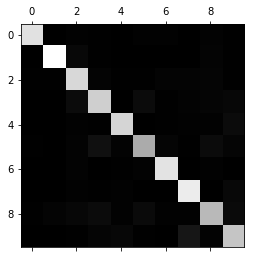

In [0]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx,cmap=plt.cm.gray)

Row : Actual classes

Column : Predicted classes

In [0]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums
norm_conf_mx

array([[9.36518656e-01, 1.68833361e-04, 1.19871687e-02, 5.06500084e-03,
        1.18183353e-03, 9.62350160e-03, 1.02988350e-02, 1.68833361e-03,
        1.55326693e-02, 7.93516799e-03],
       [4.44971818e-04, 9.33995847e-01, 2.93681400e-02, 4.74636606e-03,
        1.48323939e-03, 3.70809849e-03, 2.37318303e-03, 3.70809849e-03,
        1.58706615e-02, 4.30139425e-03],
       [4.69956361e-03, 6.88150386e-03, 8.92077878e-01, 2.04766700e-02,
        7.88855321e-03, 4.69956361e-03, 1.74555220e-02, 1.69519973e-02,
        2.38335012e-02, 5.03524673e-03],
       [1.46794976e-03, 3.09900506e-03, 4.66481814e-02, 8.30859566e-01,
        2.44658294e-03, 4.73006035e-02, 5.70869352e-03, 1.33746534e-02,
        2.03881912e-02, 2.87065732e-02],
       [1.02704553e-03, 3.59465936e-03, 1.21533721e-02, 5.99109894e-03,
        8.97124273e-01, 2.56761383e-03, 8.38753851e-03, 9.24340979e-03,
        1.12975009e-02, 4.86134885e-02],
       [8.30105147e-03, 2.76701716e-03, 1.43884892e-02, 7.37871241e-02,
   

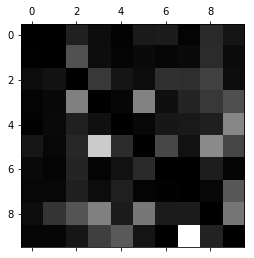

In [0]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

3을 5로 착각하여 5로 예측하는경우가 많음.

개선방법
1. 더 많은 3의 이미지를 트레이닝 시킴
2. 분류기에게 새로운 피쳐를 추가함(예: 닫힌 부분의 갯수로 숫자를 판별, 예로 8은 2개, 6은 1개, 5는 0개 등 )
3. 이미지를 프리프로세싱하여 몇 특징들을(닫힌부분 등) 더 부각되게 만듦

In [0]:
Y_train_pred.shape

(60000,)

In [0]:
import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

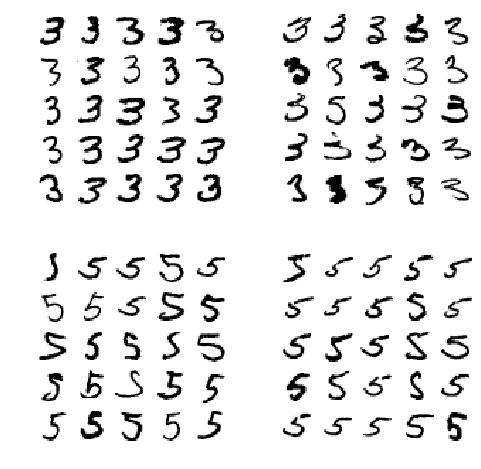

In [0]:
cl_a , cl_b = 3,5
X_aa = X_train[(Y_train ==cl_a) & (Y_train_pred == cl_a)]
X_ab = X_train[(Y_train ==cl_a) & (Y_train_pred == cl_b)]
X_ba = X_train[(Y_train ==cl_b) & (Y_train_pred == cl_a)]
X_bb = X_train[(Y_train ==cl_b) & (Y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25],images_per_row = 5)
plt.subplot(222);plot_digits(X_ab[:25],images_per_row = 5)
plt.subplot(223);plot_digits(X_ba[:25],images_per_row = 5)
plt.subplot(224);plot_digits(X_bb[:25],images_per_row = 5)
plt.show()

